# Financial Econometrics: Homework 2
#### Kryštof Veřtát, Tomáš Svoboda

## Problem 1

In [1]:
options(repr.plot.width = 16, repr.plot.height = 8)
options(xts_check_TZ = FALSE)
library(highfrequency)
library(rugarch)
library(repr)
library(xts)
library(fst)

Warning message:
"package 'highfrequency' was built under R version 4.3.3"
Warning message:
"package 'rugarch' was built under R version 4.3.3"
Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'fst' was built under R version 4.3.3"


### 1)

In [2]:
# Load data and tranform it in xts
BAC <- read.fst("HW_3_BAC_1min.fst")
MSFT <- read.fst("HW_3_MSFT_1min.fst")
XOM <- read.fst("HW_3_XOM_1min.fst")

BAC_xts <- xts(BAC$V1, order.by = BAC$index)
MSFT_xts <- xts(MSFT$V1, order.by = MSFT$index)
XOM_xts <- xts(XOM$V1, order.by = XOM$index)

Warning message:
"package 'fstcore' was built under R version 4.3.3"


### 2)

In [3]:
# Select only data from selected years and time
# Save the same the data with and without time stamp (some functions do not work if the data contain time stamp)
BAC_xts <- BAC_xts["2012/2016"]
BAC_xts <- BAC_xts["T09:30:00/T16:00:00" ]
BAC_no_time <- BAC_xts
index(BAC_no_time)<-as.Date(index(BAC_no_time))

MSFT_xts <- MSFT_xts["2012/2016"]
MSFT_xts <- MSFT_xts["T09:30:00/T16:00:00" ]
MSFT_no_time <- MSFT_xts
index(MSFT_no_time)<-as.Date(index(MSFT_no_time))

XOM_xts <- XOM_xts["2012/2016"]
XOM_xts <- XOM_xts["T09:30:00/T16:00:00" ]
XOM_no_time <- XOM_xts
index(XOM_no_time)<-as.Date(index(XOM_no_time))


### 3)

In [4]:
# Separate data by days and calculate returns
BAC_daily <- split(BAC_xts, f = "days")
BAC_returns <- lapply(BAC_daily, makeReturns)
BAC_returns <- do.call(rbind, BAC_returns)
BAC_RV_daily <- rCov(BAC_returns, makeReturns = F)
index(BAC_RV_daily)<-as.Date(index(BAC_RV_daily))

MSFT_daily <- split(MSFT_xts, f = "days")
MSFT_returns <- lapply(MSFT_daily, makeReturns)
MSFT_returns<- do.call(rbind, MSFT_returns)
MSFT_RV_daily <- rCov(MSFT_returns, makeReturns = F)
index(MSFT_RV_daily)<-as.Date(index(MSFT_RV_daily))

XOM_daily <- split(XOM_xts, f = "days")
XOM_returns <- lapply(XOM_daily, makeReturns)
XOM_returns<- do.call(rbind, XOM_returns)
XOM_RV_daily <- rCov(XOM_returns, makeReturns = F)
index(XOM_RV_daily)<-as.Date(index(XOM_RV_daily))

### 4)

In [5]:
# Calculate realized variance using rCov function
BAC_RV_returns <- rCov(BAC_returns, makeReturns = FALSE)
BAC_RV_prices <- rCov(BAC_xts, makeReturns = TRUE)
index(BAC_RV_returns)<-as.Date(index(BAC_RV_returns))

MSFT_RV_returns <- rCov(MSFT_returns, makeReturns = FALSE)
MSFT_RV_prices <- rCov(MSFT_xts, makeReturns = TRUE)
index(MSFT_RV_returns)<-as.Date(index(MSFT_RV_returns))

XOM_RV_returns <- rCov(XOM_returns, makeReturns = FALSE)
XOM_RV_prices <- rCov(XOM_xts, makeReturns = TRUE)
index(XOM_RV_returns)<-as.Date(index(XOM_RV_returns))

In [17]:
head(BAC_RV_prices)
head(MSFT_RV_prices)
head(XOM_RV_prices)


Warning message:
"object timezone (UTC) is different from system timezone ()
  NOTE: set 'options(xts_check_TZ = FALSE)'to disable this warning
    This note is displayed once per session"


                            [,1]
2012-01-03 16:00:00 0.0007787649
2012-01-04 16:00:00 0.0010187267
2012-01-05 16:00:00 0.0015620921
2012-01-06 16:00:00 0.0011918156
2012-01-09 16:00:00 0.0008431192
2012-01-10 16:00:00 0.0007357003

Warning message:
"object timezone (UTC) is different from system timezone ()"


                            [,1]
2012-01-03 16:00:00 9.927639e-05
2012-01-04 16:00:00 1.114057e-04
2012-01-05 16:00:00 1.098341e-04
2012-01-06 16:00:00 9.830867e-05
2012-01-09 16:00:00 1.218598e-04
2012-01-10 16:00:00 1.366224e-04

Warning message:
"object timezone (UTC) is different from system timezone ()"


                            [,1]
2012-01-03 16:00:00 6.315347e-05
2012-01-04 16:00:00 6.659626e-05
2012-01-05 16:00:00 8.473441e-05
2012-01-06 16:00:00 4.987180e-05
2012-01-09 16:00:00 3.610025e-05
2012-01-10 16:00:00 3.850767e-05

Realized Variance calculated from 1 minute prices and returns is the same.

### 5)

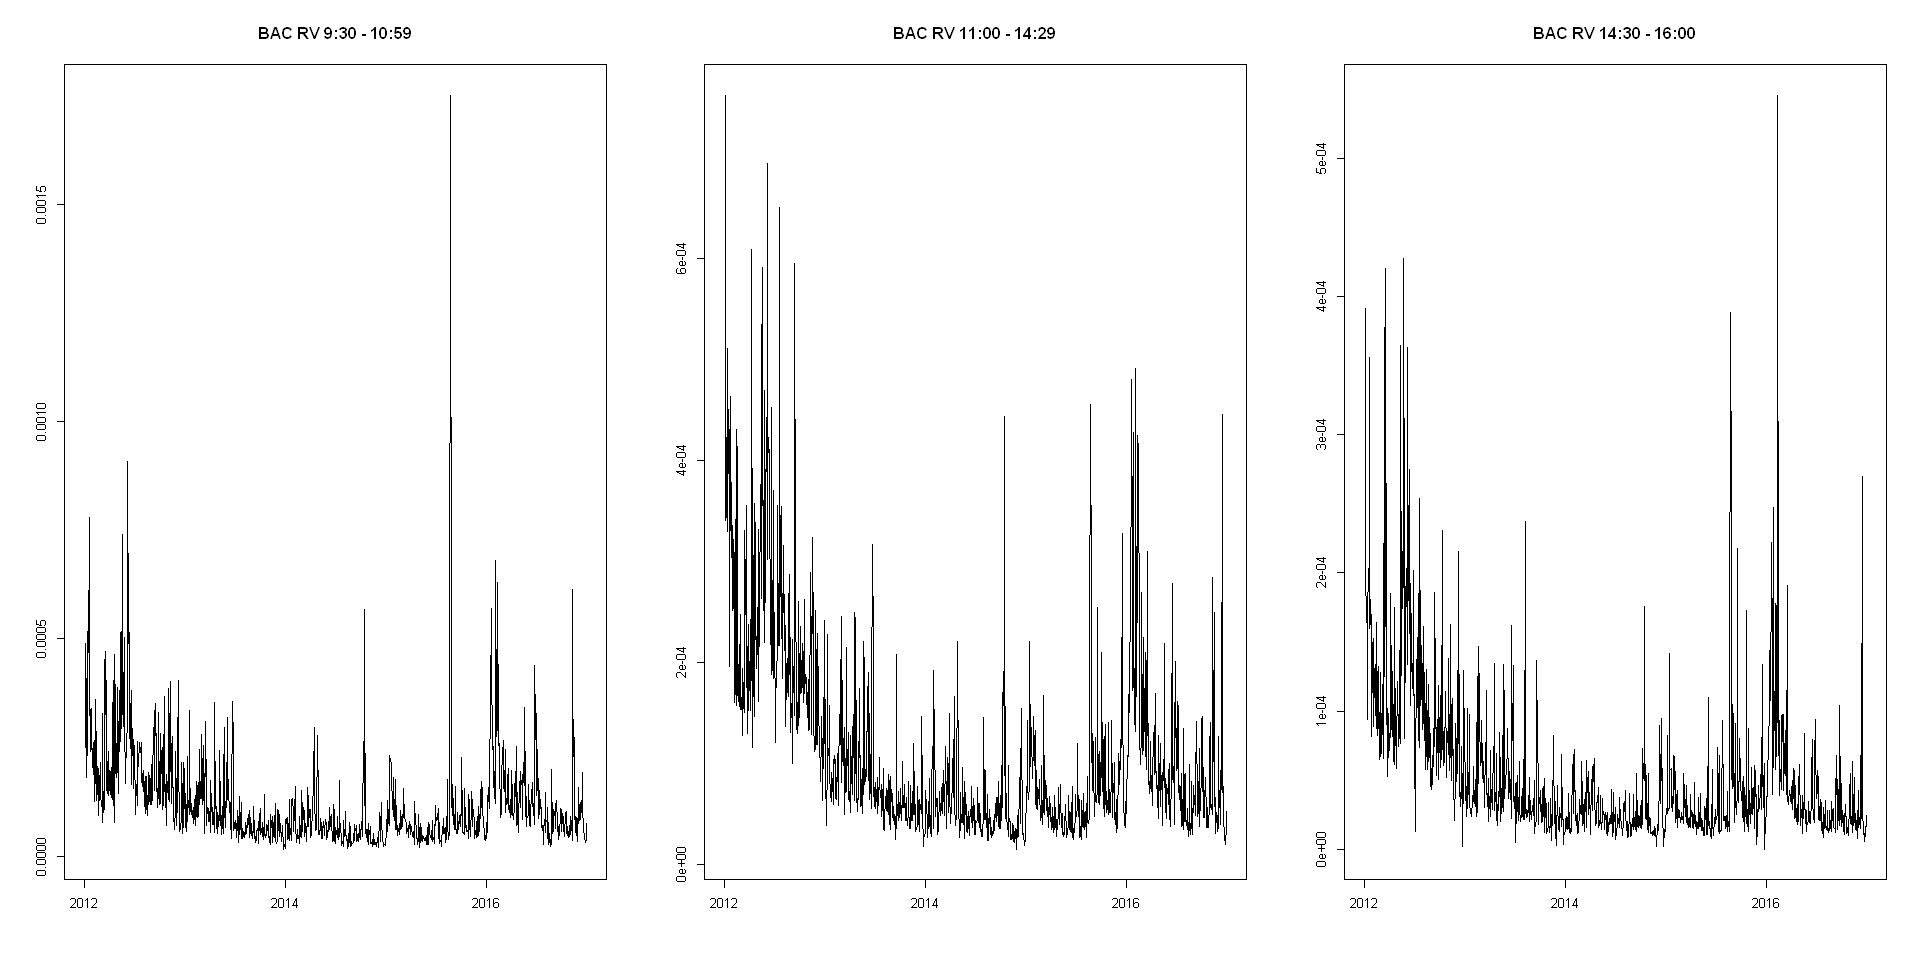

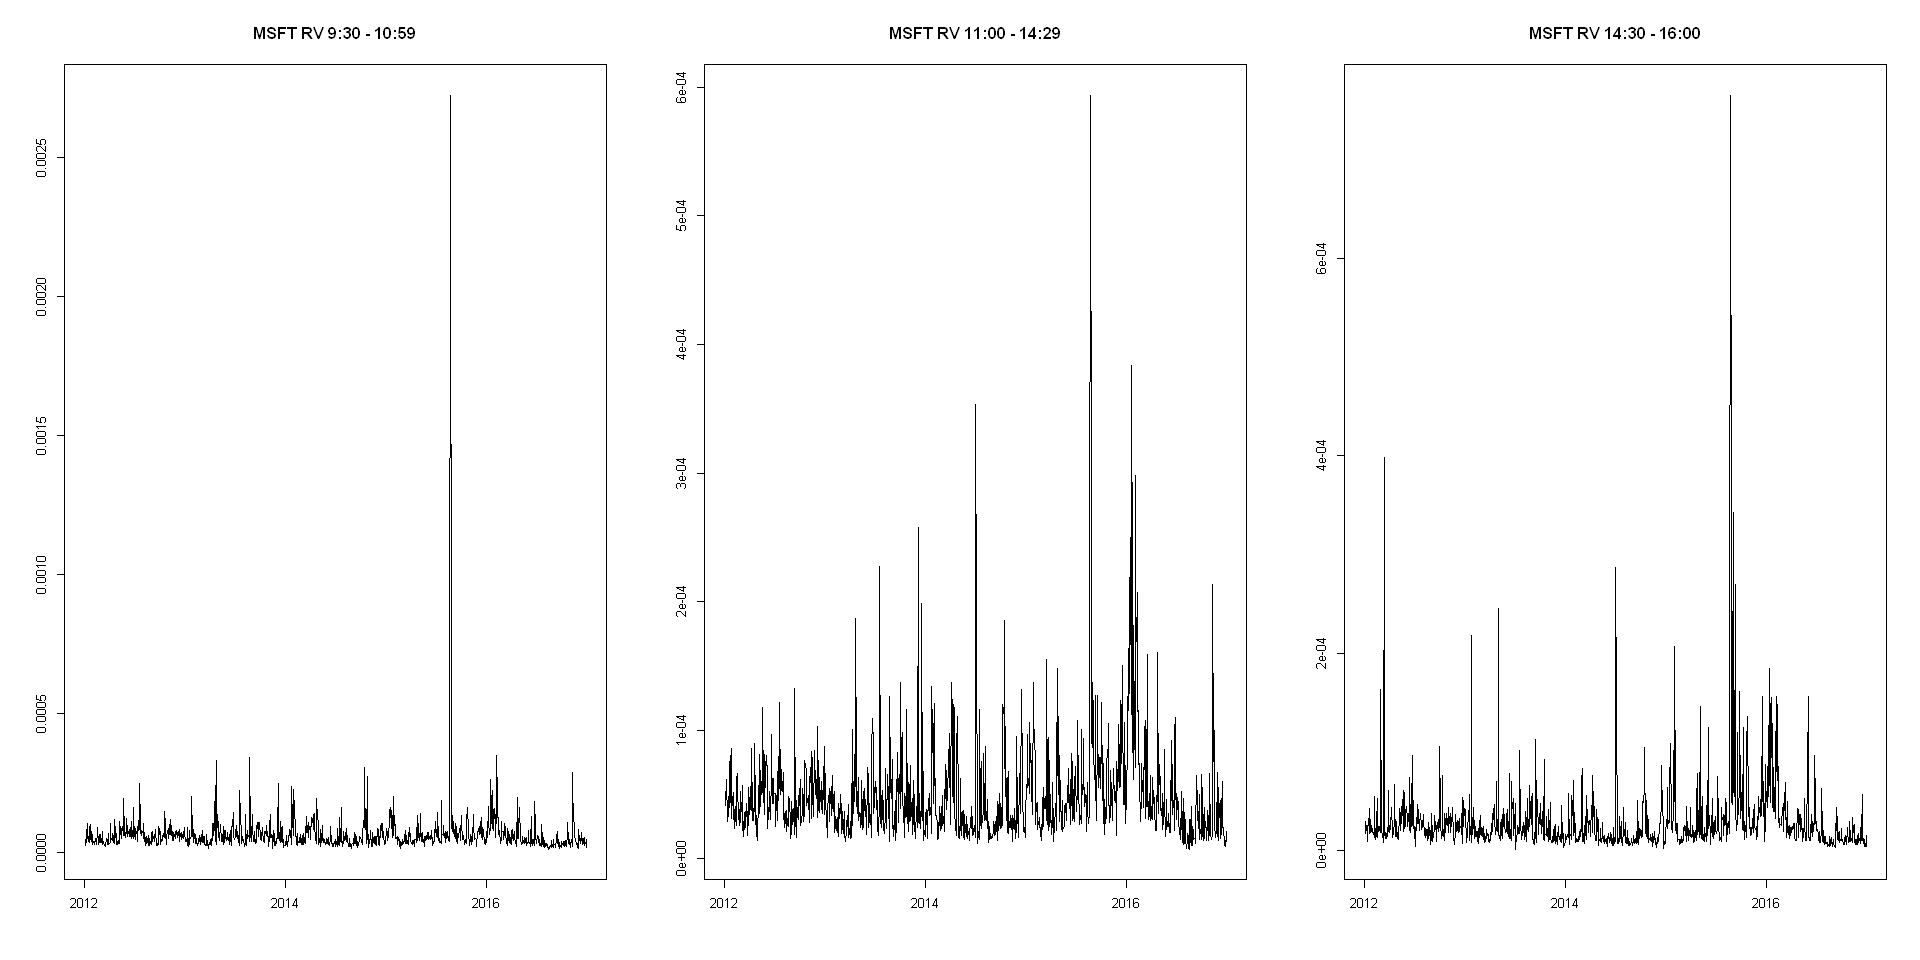

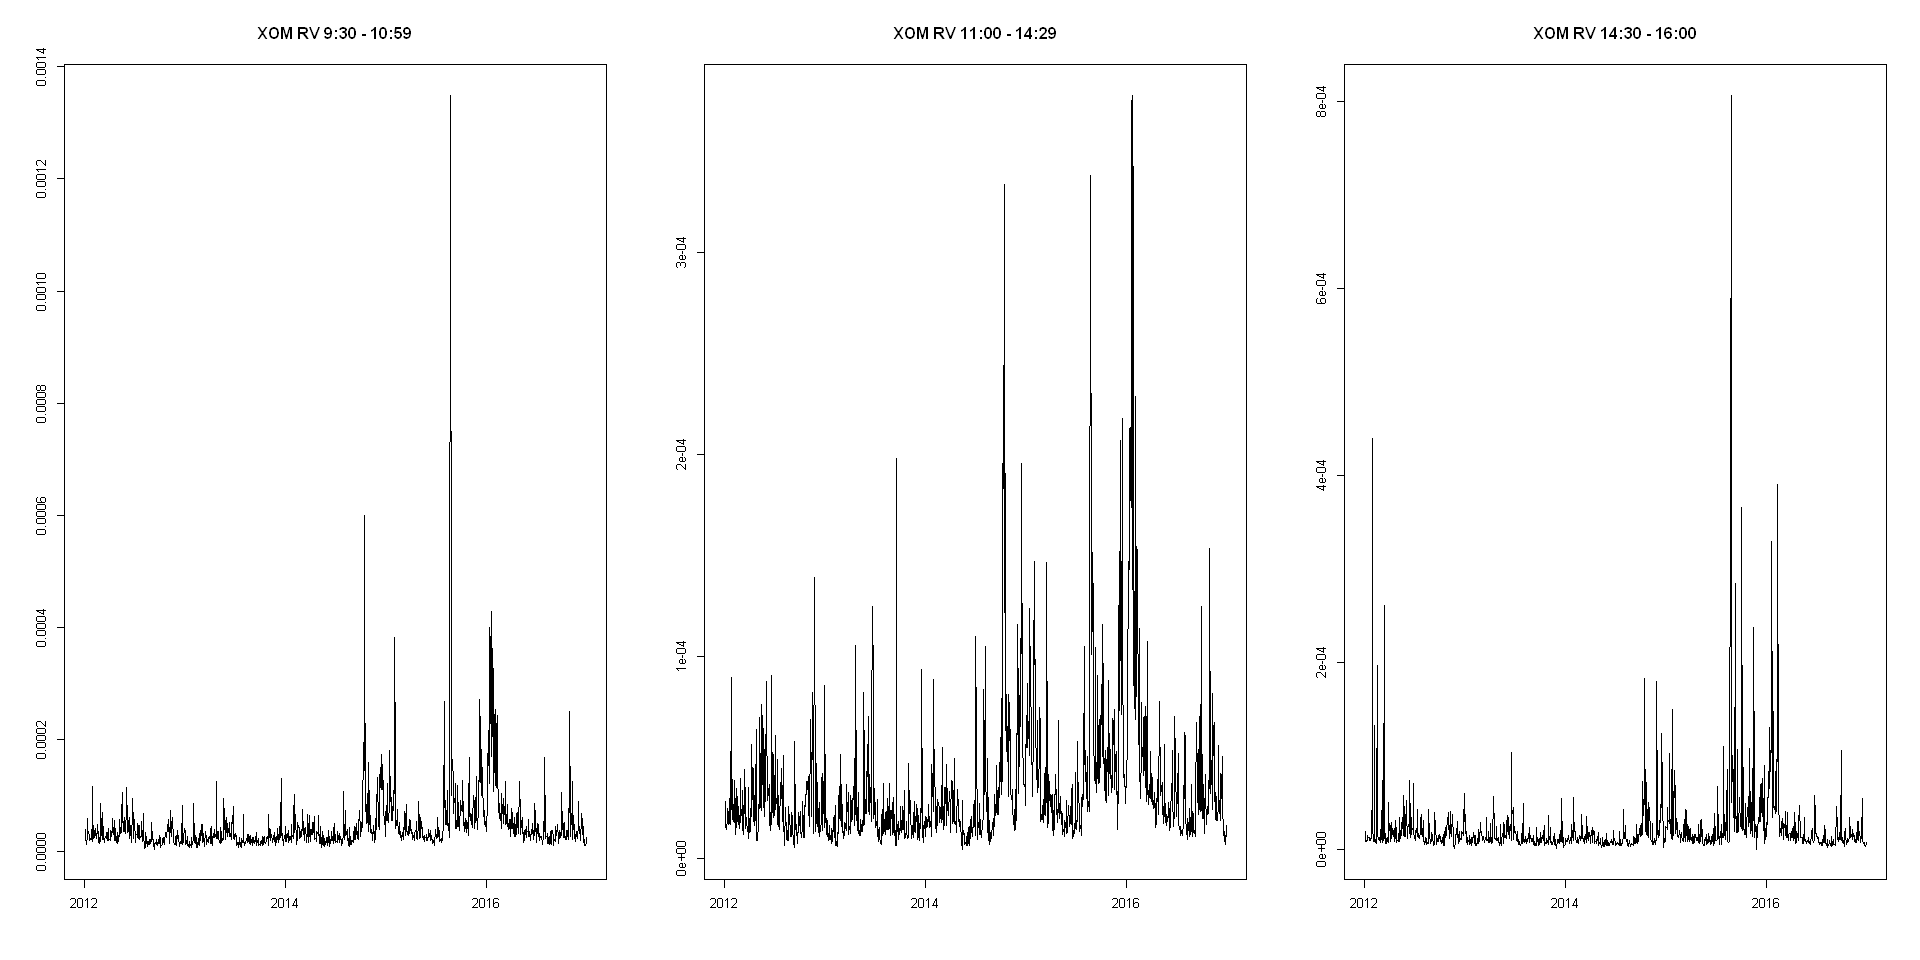

In [6]:
# Calculate realized variance from returns for intraday periods
# First calculate returns, subset it by time, then calculate RV and plot it

# BAC
par(mfrow=c(1, 3))
BAC_returns1 <- BAC_returns["T09:30:00/T10:59:00" ]
index(BAC_returns1)<-as.Date(index(BAC_returns1))
BAC_RV_returns1 <- rCov(BAC_returns1, makeReturns = F)
plot.zoo(BAC_RV_returns1, xlab = NA,ylab = NA, main = "BAC RV 9:30 - 10:59")

BAC_returns2 <- BAC_returns["T11:00:00/T14:29:00" ]
index(BAC_returns2)<-as.Date(index(BAC_returns2))
BAC_RV_returns2 <- rCov(BAC_returns2, makeReturns = F)
plot.zoo(BAC_RV_returns2, xlab = NA,ylab = NA, main = "BAC RV 11:00 - 14:29")

BAC_returns3 <- BAC_returns["T14:30:00/T16:00:00" ]
index(BAC_returns3)<-as.Date(index(BAC_returns3))
BAC_RV_returns3 <- rCov(BAC_returns3, makeReturns = F)
plot.zoo(BAC_RV_returns3, xlab = NA,ylab = NA, main = "BAC RV 14:30 - 16:00")

# MSFT
par(mfrow=c(1, 3))
MSFT_returns1 <- MSFT_returns["T09:30:00/T10:59:00" ]
index(MSFT_returns1)<-as.Date(index(MSFT_returns1))
MSFT_RV_returns1 <- rCov(MSFT_returns1, makeReturns = F)
plot.zoo(MSFT_RV_returns1, xlab = NA,ylab = NA, main = "MSFT RV 9:30 - 10:59")

MSFT_returns2 <- MSFT_returns["T11:00:00/T14:29:00" ]
index(MSFT_returns2)<-as.Date(index(MSFT_returns2))
MSFT_RV_returns2 <- rCov(MSFT_returns2, makeReturns = F)
plot.zoo(MSFT_RV_returns2, xlab = NA,ylab = NA, main = "MSFT RV 11:00 - 14:29")

MSFT_returns3 <- MSFT_returns["T14:30:00/T16:00:00" ]
index(MSFT_returns3)<-as.Date(index(MSFT_returns3))
MSFT_RV_returns3 <- rCov(MSFT_returns3, makeReturns = F)
plot.zoo(MSFT_RV_returns3, xlab = NA,ylab = NA, main = "MSFT RV 14:30 - 16:00")

# XOM
par(mfrow=c(1, 3))
XOM_returns1 <- XOM_returns["T09:30:00/T10:59:00" ]
index(XOM_returns1)<-as.Date(index(XOM_returns1))
XOM_RV_returns1 <- rCov(XOM_returns1, makeReturns = F)
plot.zoo(XOM_RV_returns1, xlab = NA,ylab = NA, main = "XOM RV 9:30 - 10:59")

XOM_returns2 <- XOM_returns["T11:00:00/T14:29:00" ]
index(XOM_returns2)<-as.Date(index(XOM_returns2))
XOM_RV_returns2 <- rCov(XOM_returns2, makeReturns = F)
plot.zoo(XOM_RV_returns2, xlab = NA,ylab = NA, main = "XOM RV 11:00 - 14:29")

XOM_returns3 <- XOM_returns["T14:30:00/T16:00:00" ]
index(XOM_returns3)<-as.Date(index(XOM_returns3))
XOM_RV_returns3 <- rCov(XOM_returns3, makeReturns = F)
plot.zoo(XOM_RV_returns3, xlab = NA,ylab = NA, main = "XOM RV 14:30 - 16:00")


### 6)

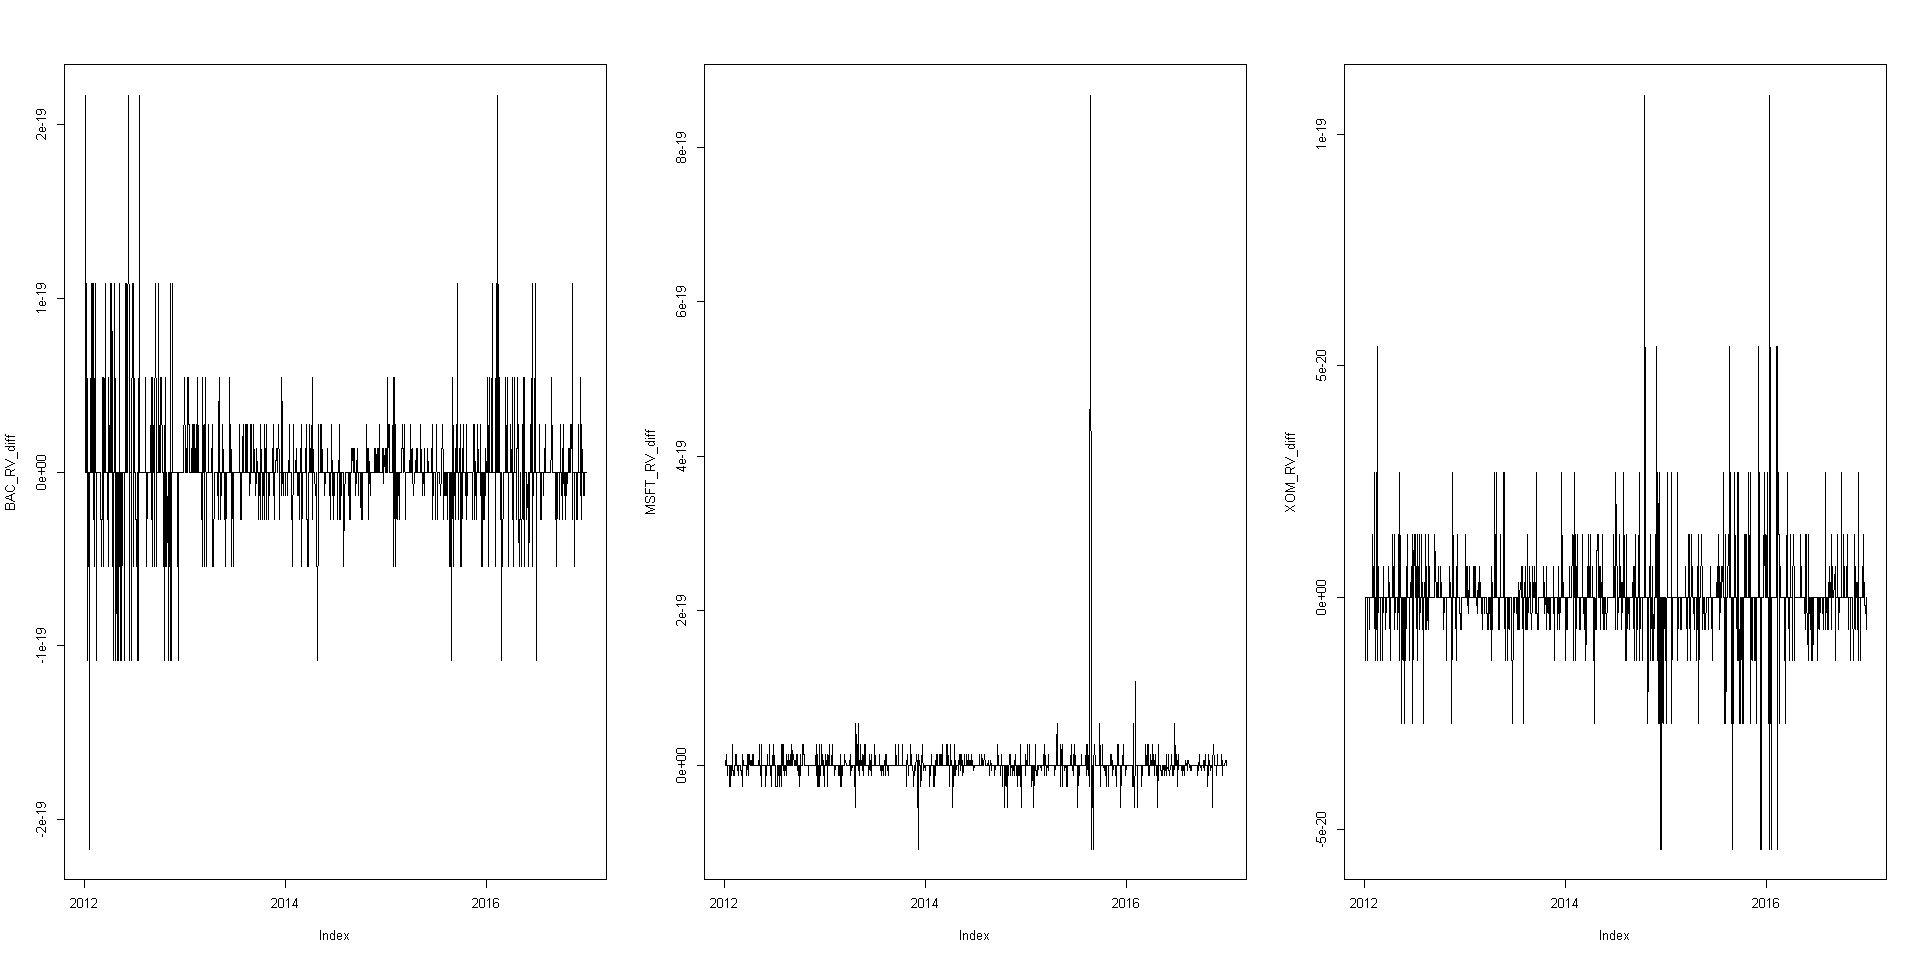

In [7]:
# Calculate daily RV from returns and intraday RV as the sum of RV from intraday periods from the previous part. Plot the difference between the two.
par(mfrow=c(1, 3))
# BAC3
BAC_RV_intraday <- BAC_RV_returns1 + BAC_RV_returns2 + BAC_RV_returns3
BAC_RV_diff <-   BAC_RV_daily - BAC_RV_intraday
plot.zoo(BAC_RV_diff)

# MSFT
MSFT_RV_intraday <- MSFT_RV_returns1 + MSFT_RV_returns2 + MSFT_RV_returns3
MSFT_RV_diff <-   MSFT_RV_daily - MSFT_RV_intraday
plot.zoo(MSFT_RV_diff)

# XOM
XOM_RV_intraday <- XOM_RV_returns1 + XOM_RV_returns2 + XOM_RV_returns3
XOM_RV_diff <-   XOM_RV_daily - XOM_RV_intraday
plot.zoo(XOM_RV_diff)

As we can see, the difference is greater in times of high realized variance for all stocks. 
Higher realized variance means also higher volatility, which can be linked for example to wider bid-ask spread and jumps.

### 7)

[1] 0.4238498

[1] 0.39157

[1] 0.1845802

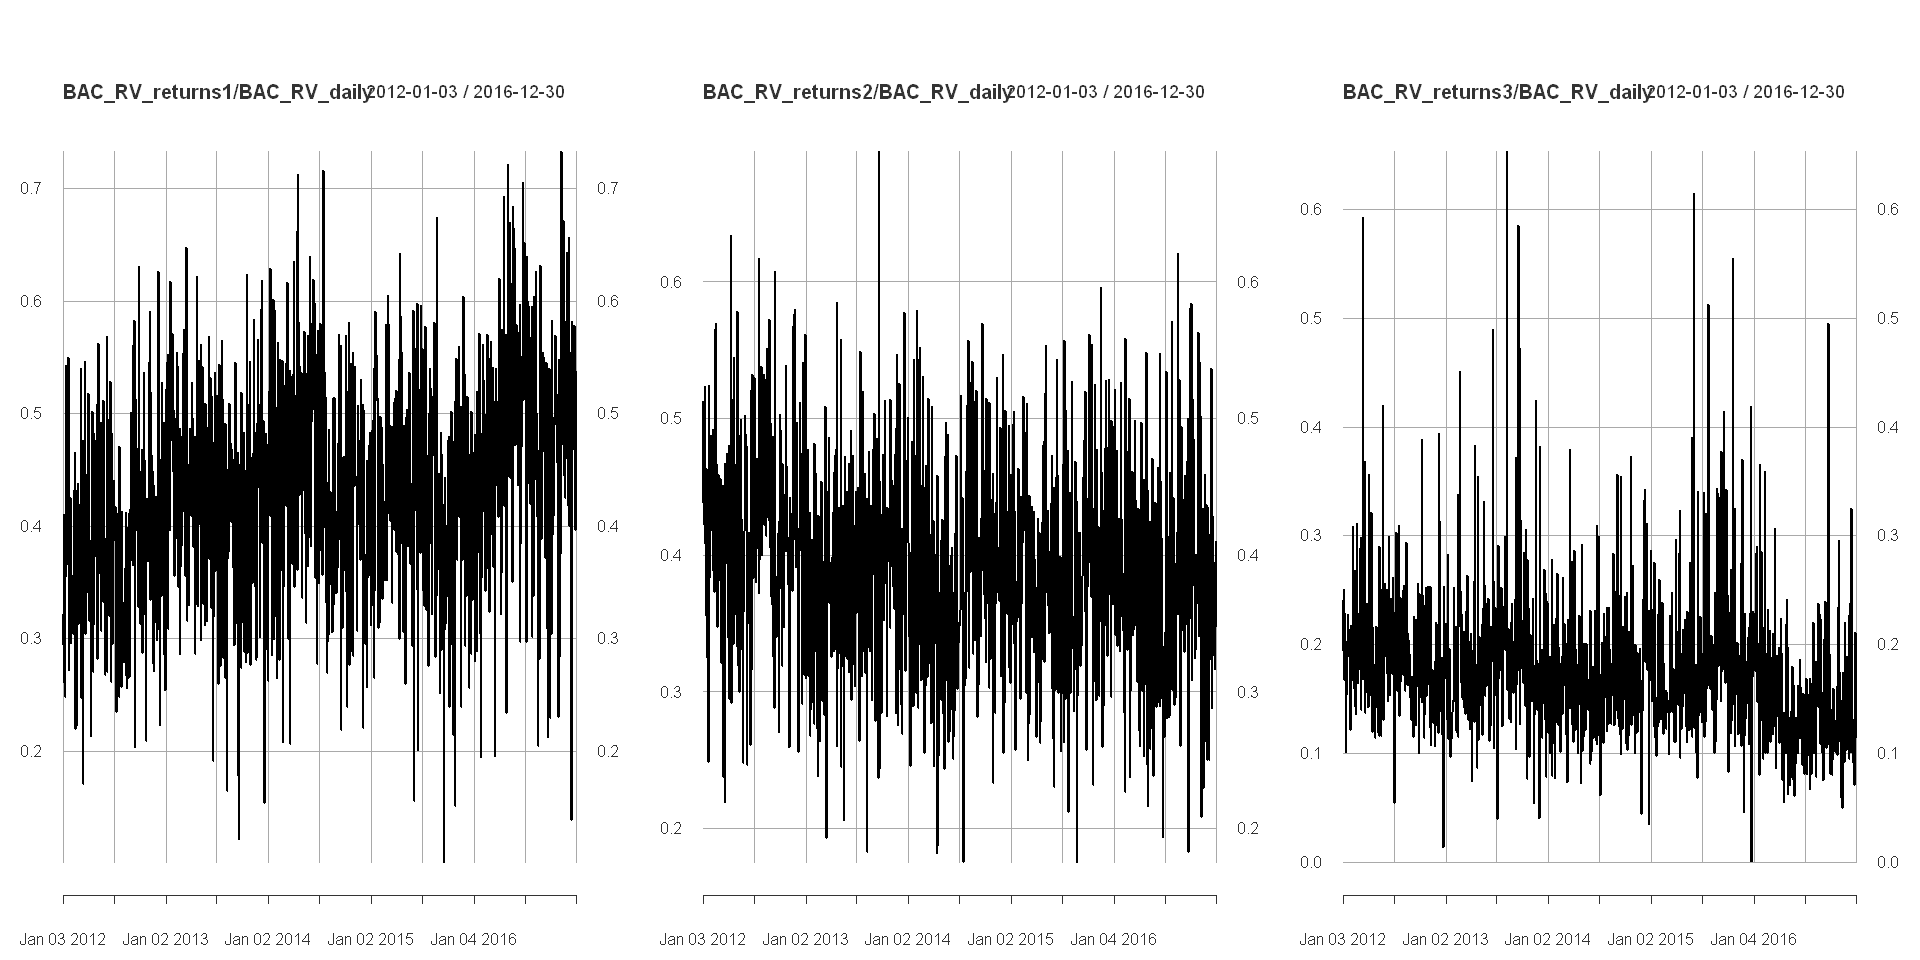

[1] 0.4435006

[1] 0.3513408

[1] 0.2051586

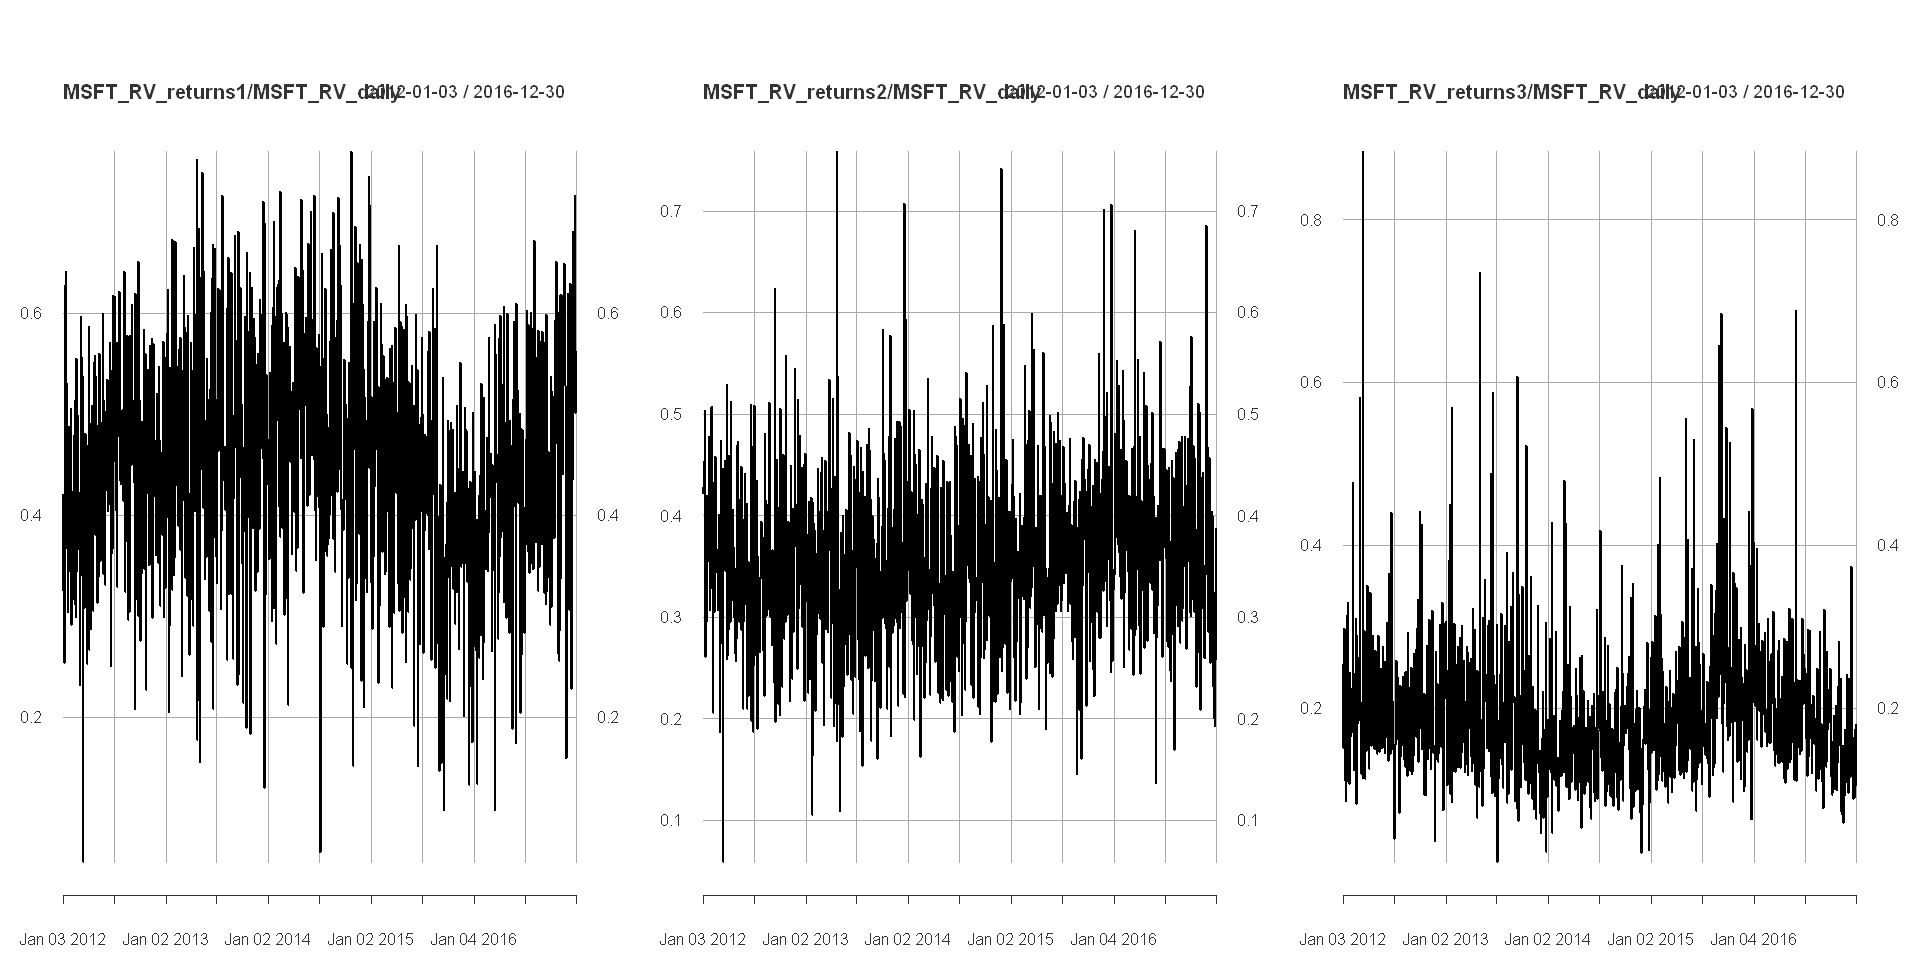

[1] 0.4449914

[1] 0.3463525

[1] 0.2086561

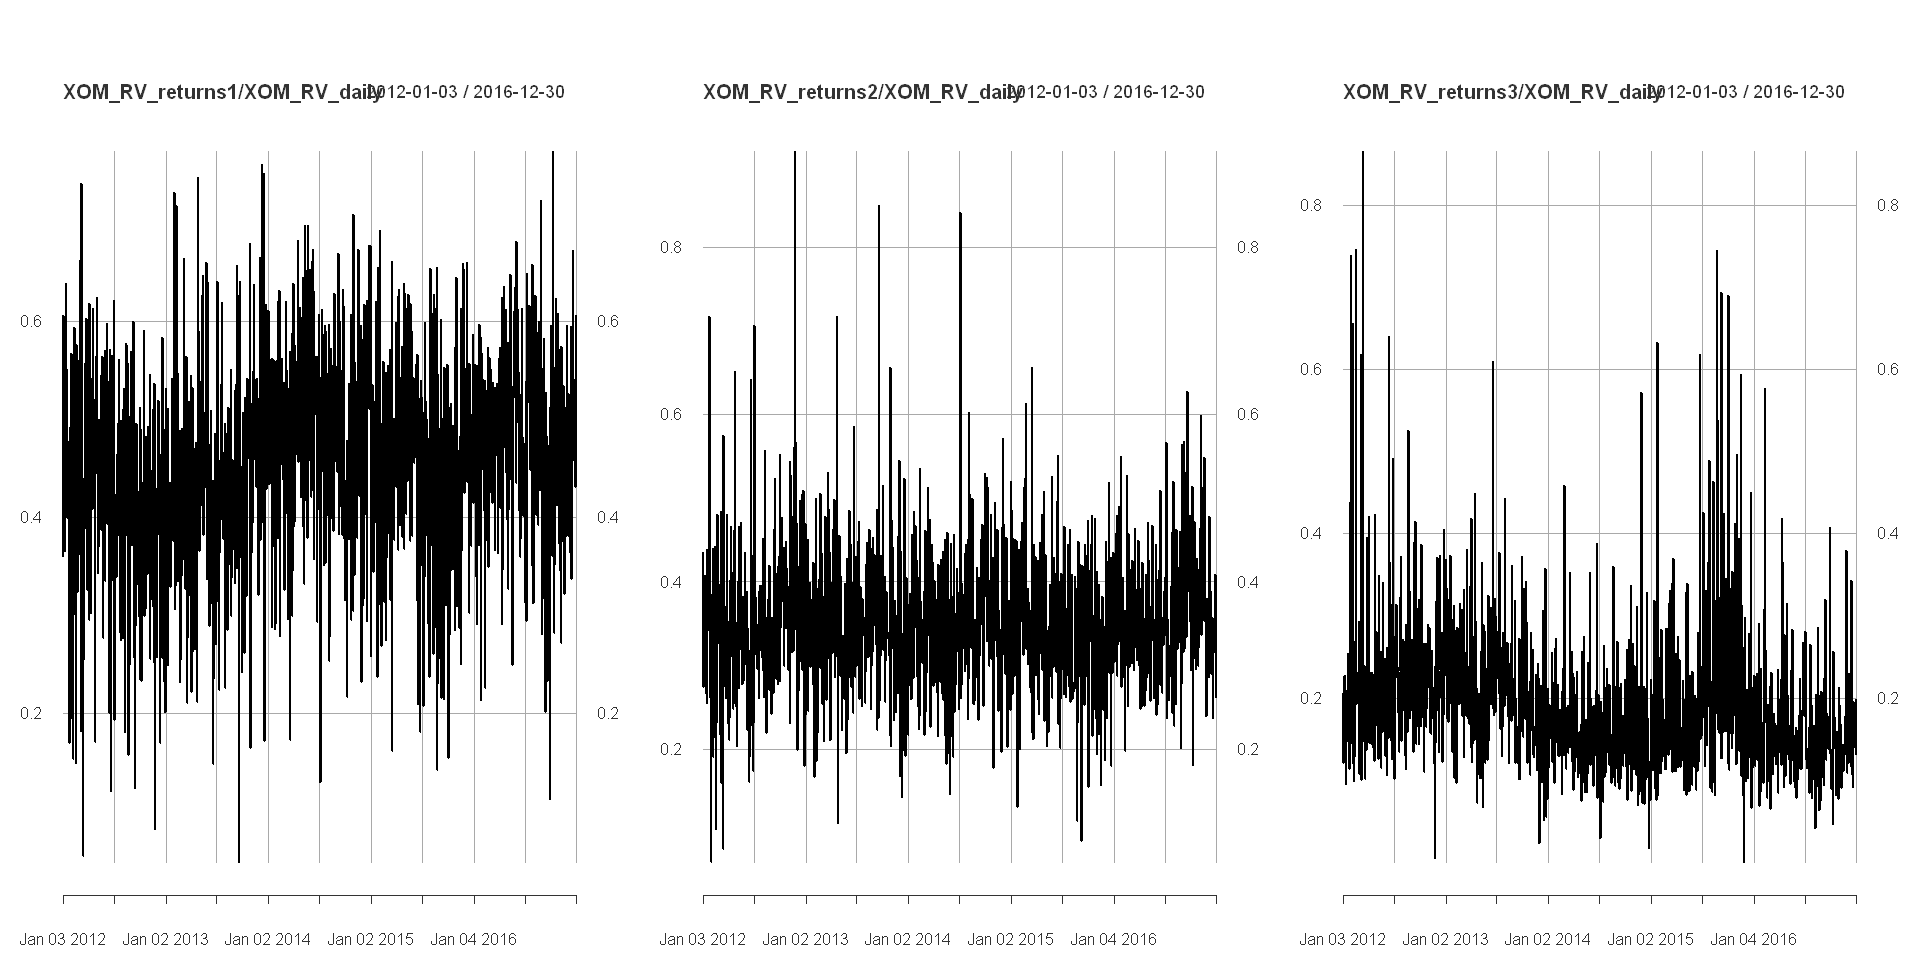

In [13]:
# Calculate and plot proportion of RV from intraday periods and daily RV for each stock
# BAC
par(mfrow=c(1, 3))
plot(BAC_RV_returns1/BAC_RV_daily)
plot(BAC_RV_returns2/BAC_RV_daily)
plot(BAC_RV_returns3/BAC_RV_daily)

sum(BAC_RV_returns1)/sum(BAC_RV_daily)
sum(BAC_RV_returns2)/sum(BAC_RV_daily)
sum(BAC_RV_returns3)/sum(BAC_RV_daily)

# MSFT
par(mfrow=c(1, 3))
plot(MSFT_RV_returns1/MSFT_RV_daily)
plot(MSFT_RV_returns2/MSFT_RV_daily)
plot(MSFT_RV_returns3/MSFT_RV_daily)

sum(MSFT_RV_returns1)/sum(MSFT_RV_daily)
sum(MSFT_RV_returns2)/sum(MSFT_RV_daily)
sum(MSFT_RV_returns3)/sum(MSFT_RV_daily)

# XOM
par(mfrow=c(1, 3))
plot(XOM_RV_returns1/XOM_RV_daily)
plot(XOM_RV_returns2/XOM_RV_daily)
plot(XOM_RV_returns3/XOM_RV_daily)

sum(XOM_RV_returns1)/sum(XOM_RV_daily)
sum(XOM_RV_returns2)/sum(XOM_RV_daily)
sum(XOM_RV_returns3)/sum(XOM_RV_daily)

From all stocks, we can see, that the share of the RV for each intraday period is different and it is the highest for first period and the lowest for the third one.
So, we know that trading hours have significant impact on RV. RV is the highest after opening and then gradually falls, but we cannot confirm that beacause our intervals are to long. For example, lunch time may have an impact. 

### 8)

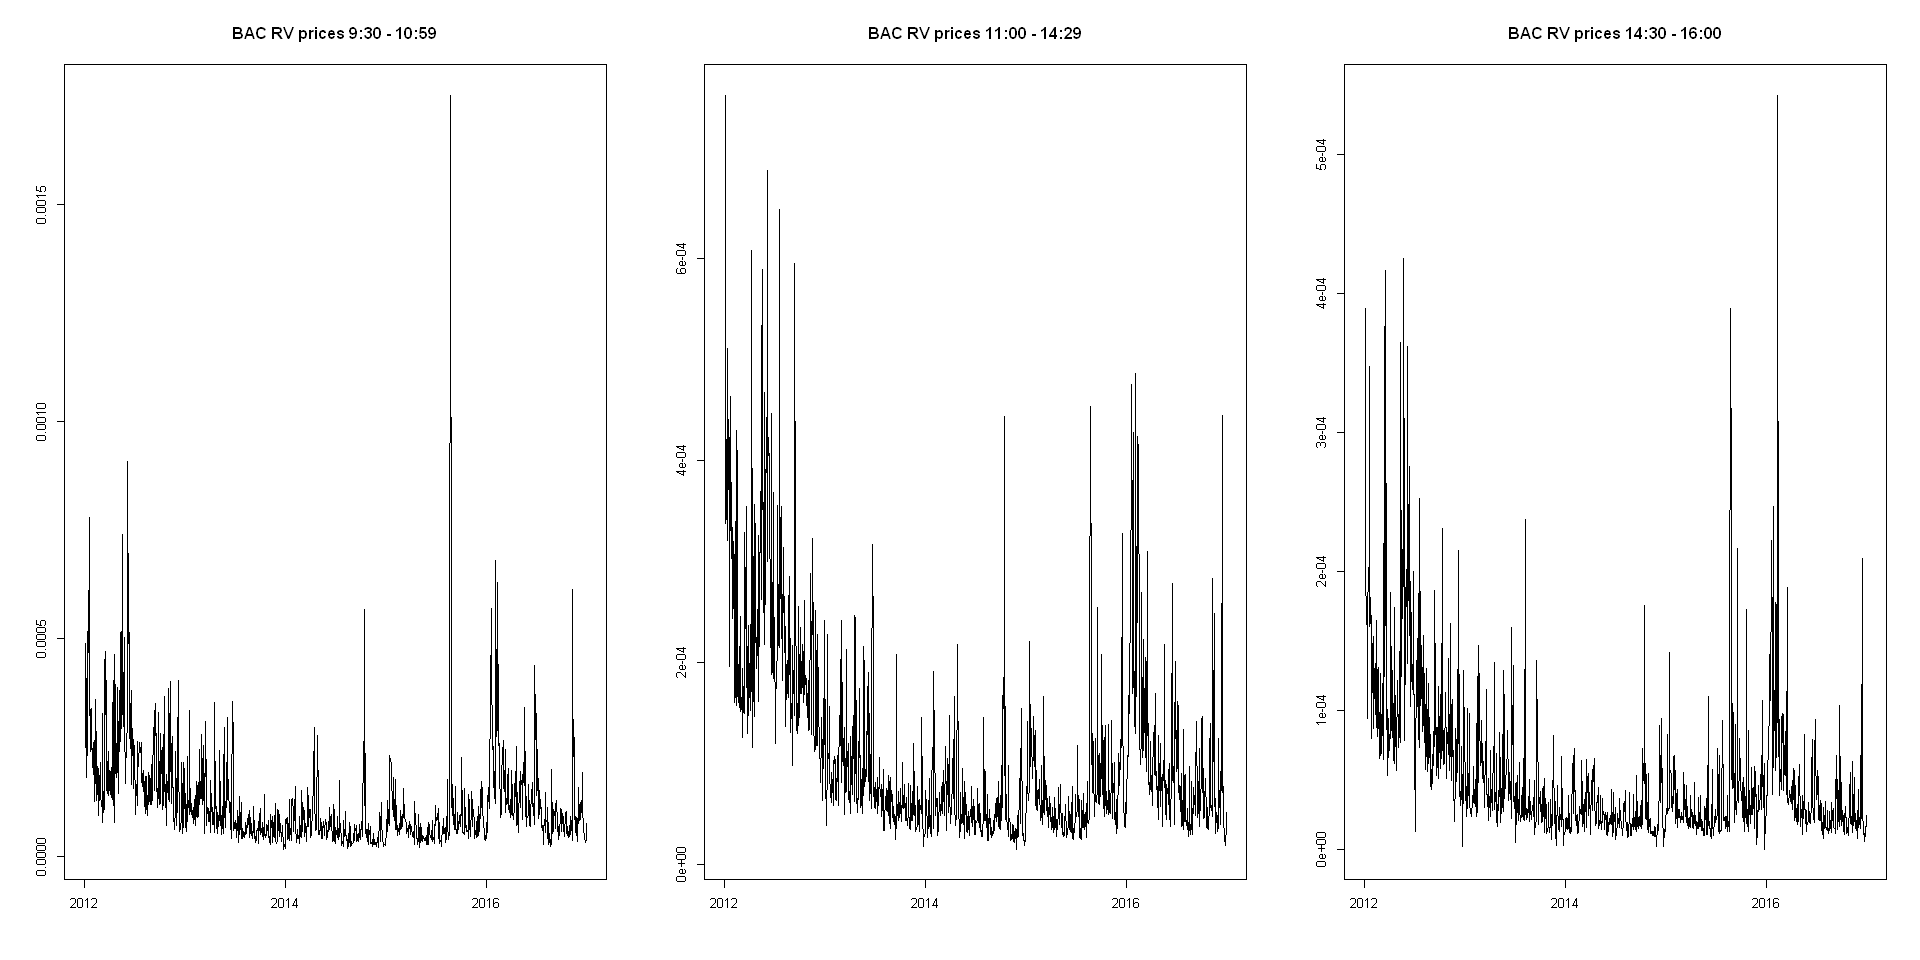

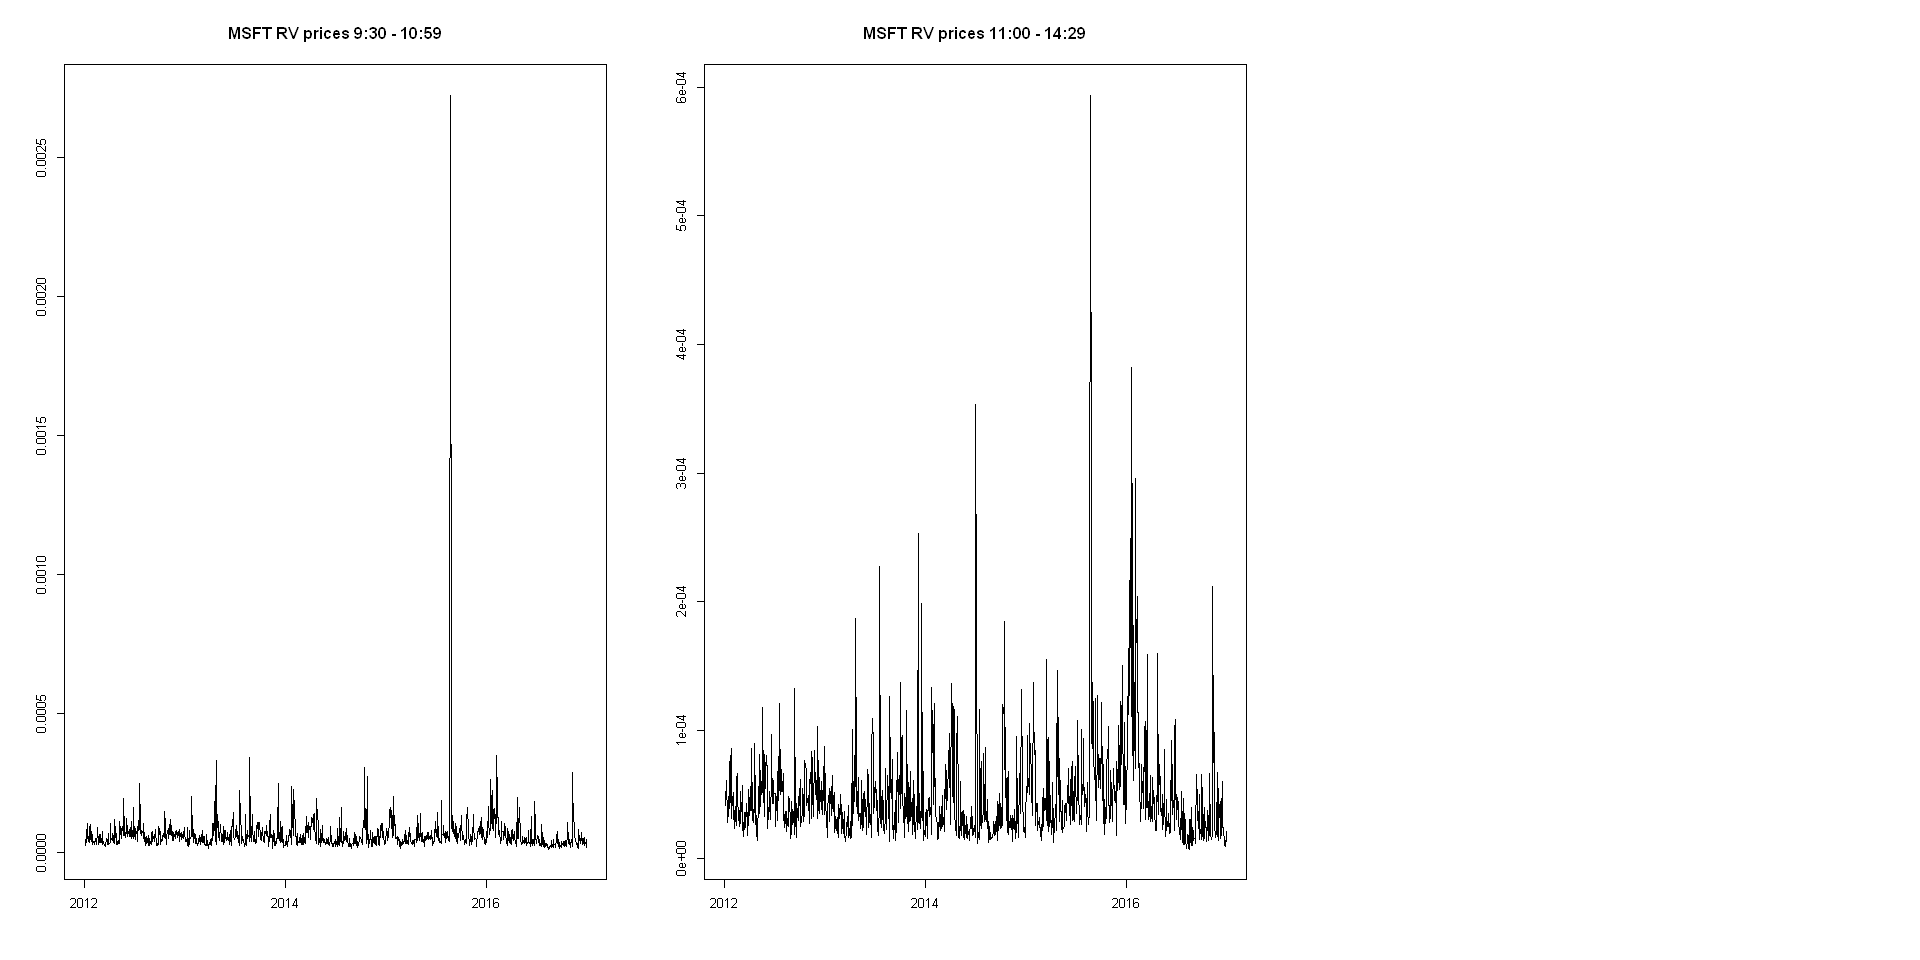

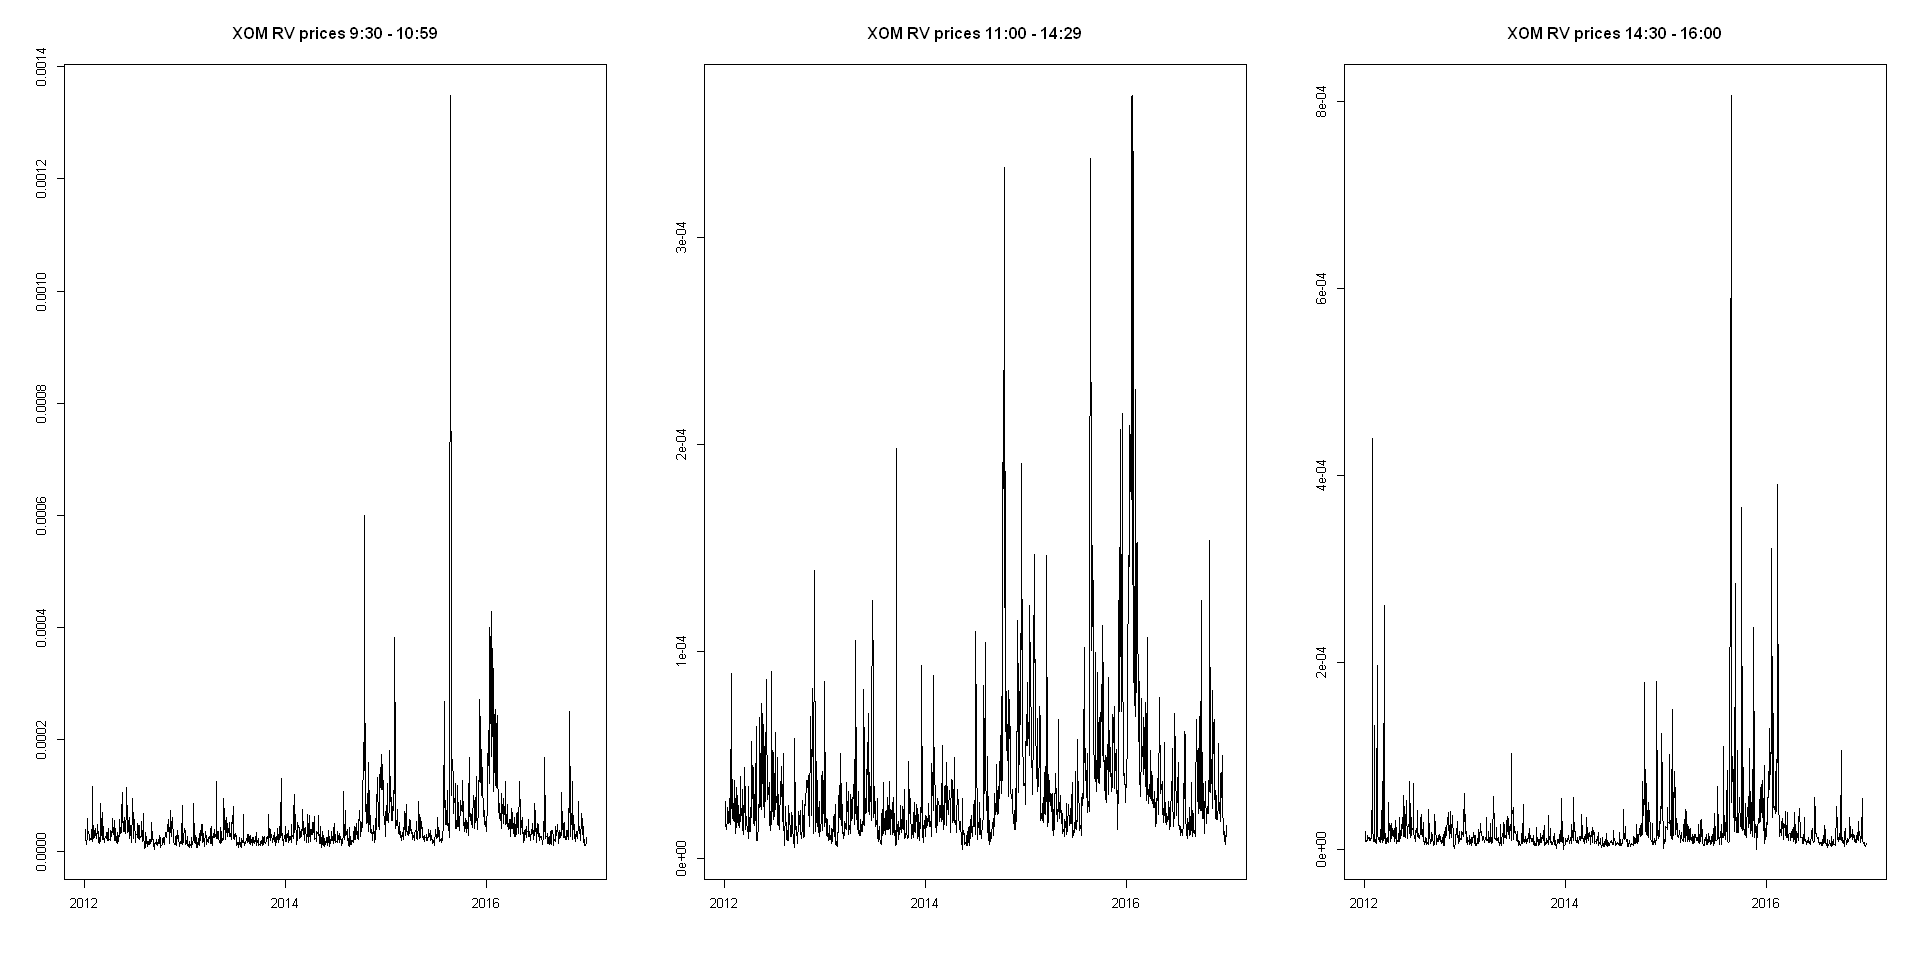

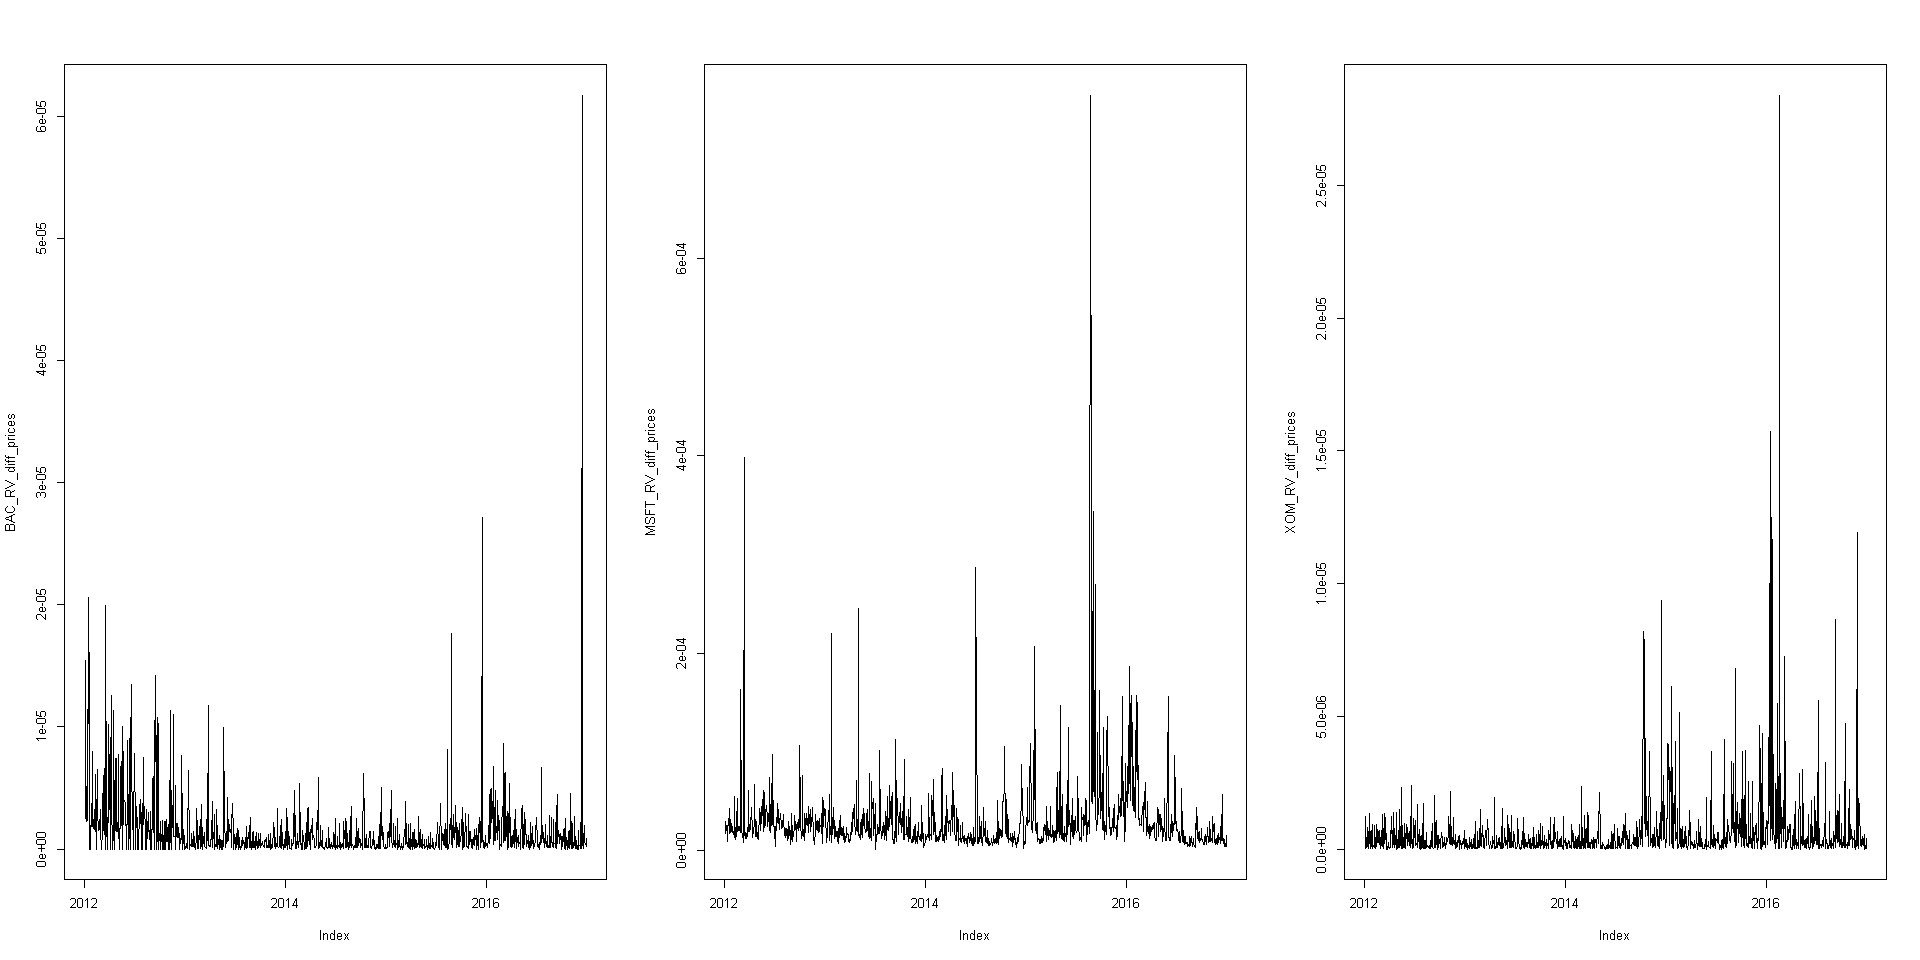

[1] 0.4238498

[1] 0.3888213

[1] 0.1825794

[1] 0.4435006

[1] 0.3486882

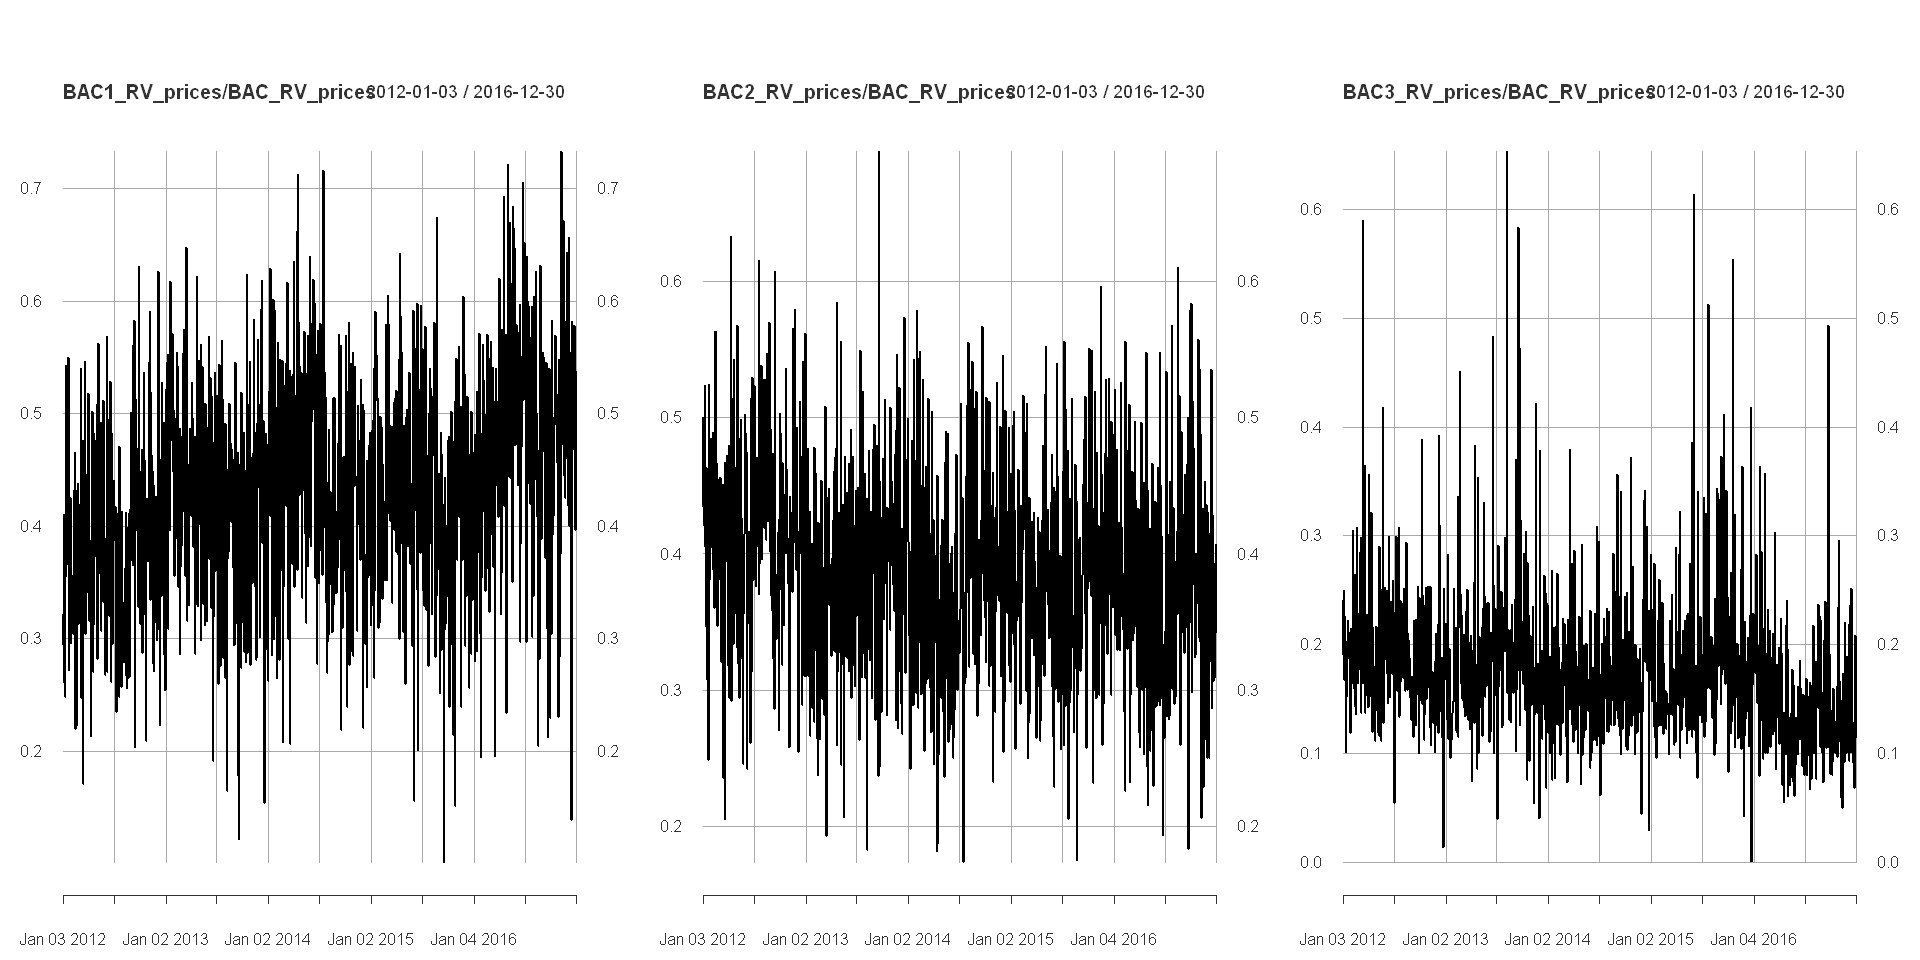

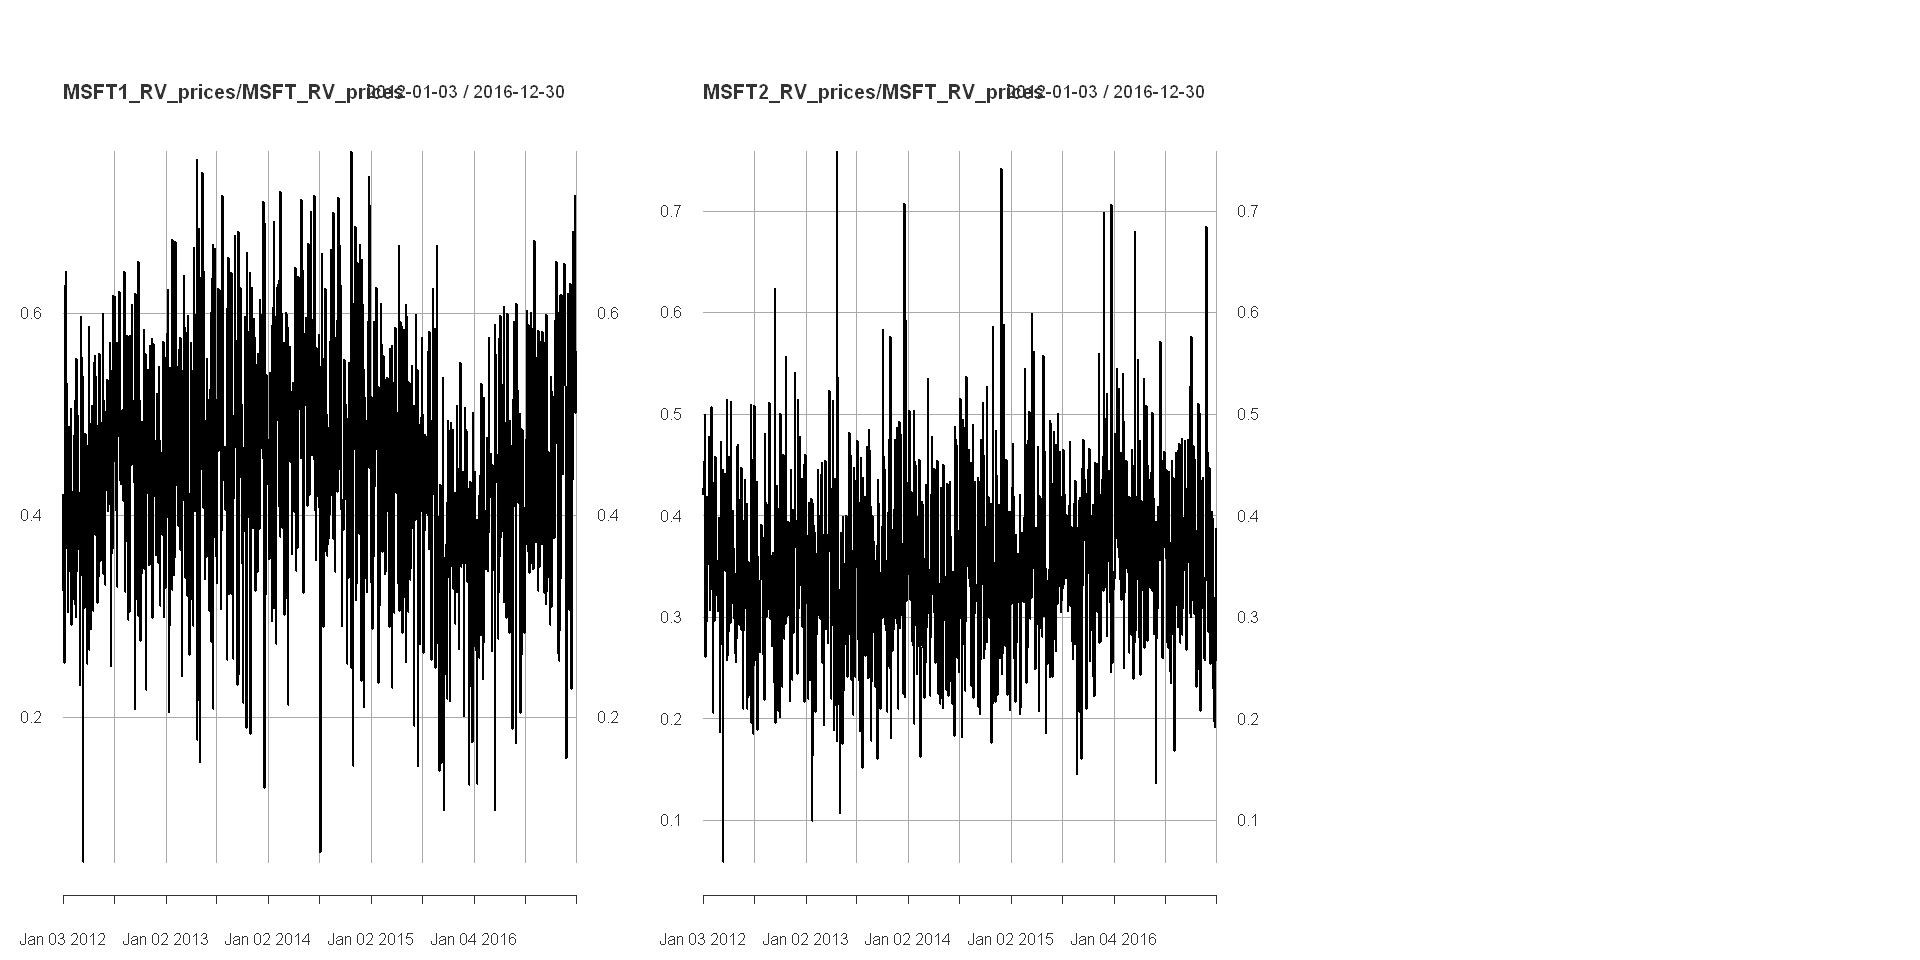

[1] 0.4449914

[1] 0.3427829

[1] 0.2066883

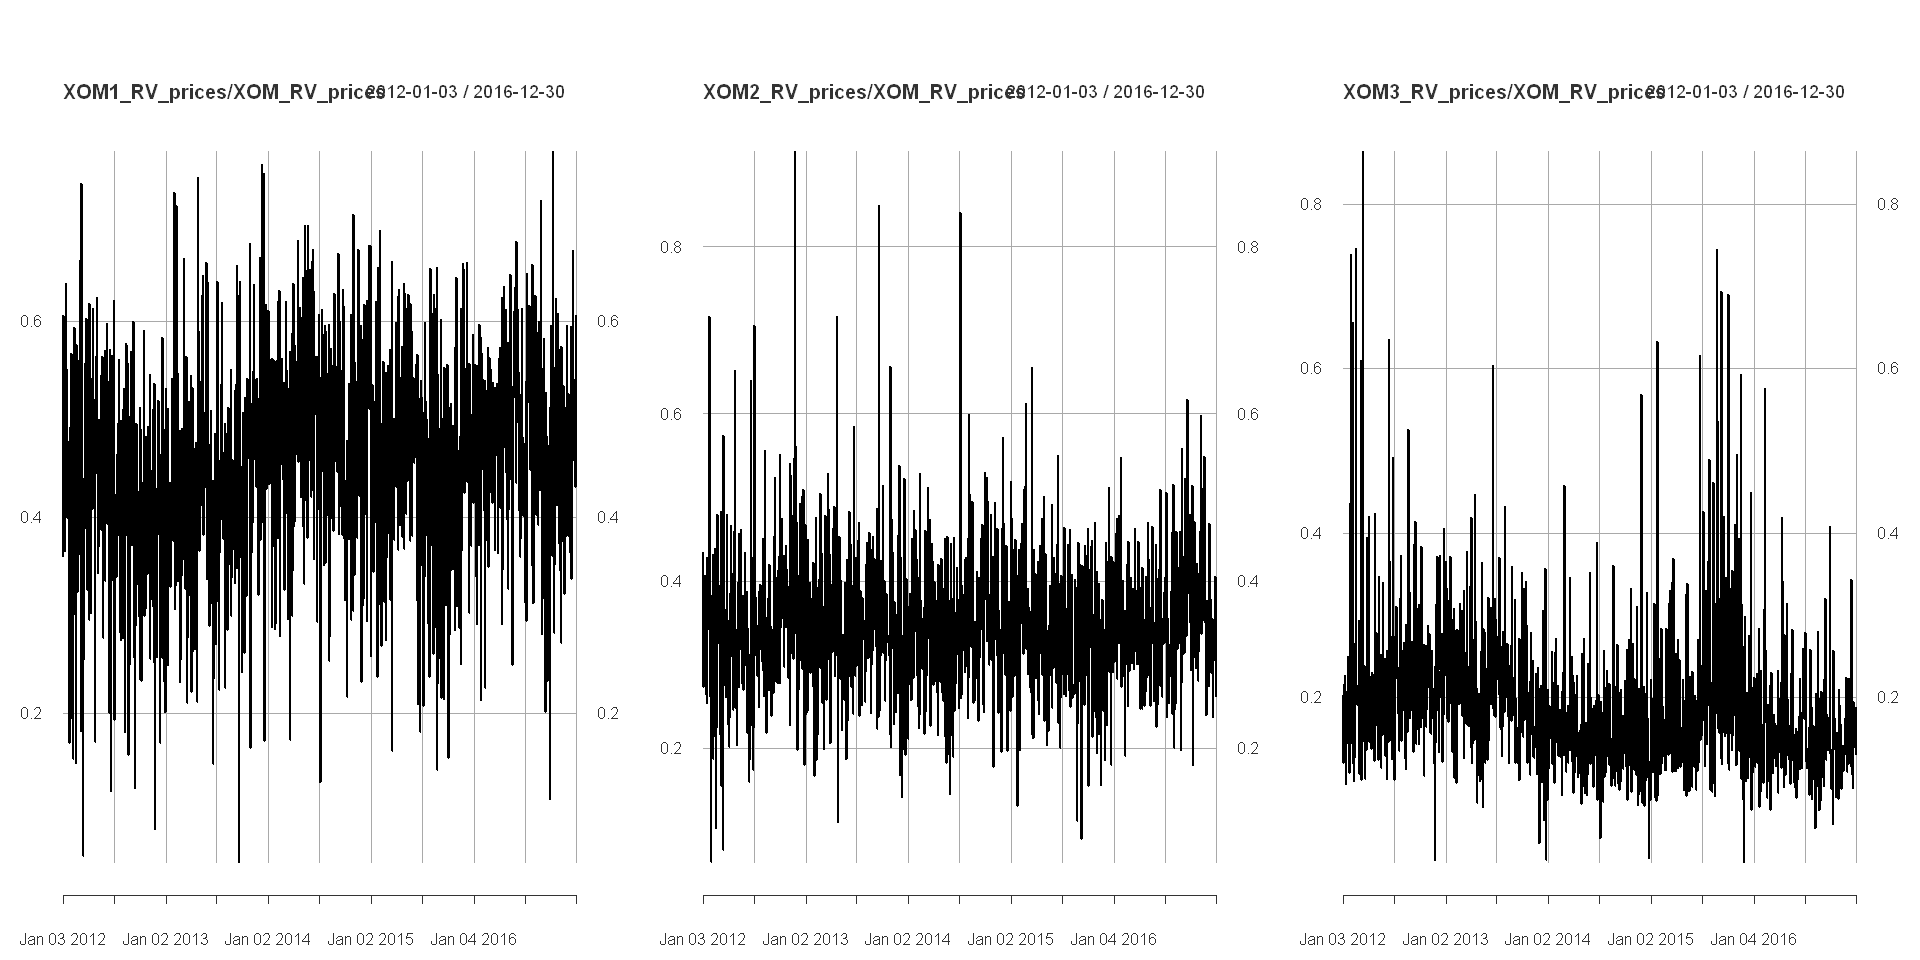

In [51]:
# Repeat part 5-7 using prices instead of returns
# Mostly we apply rCov function with argument makeReturns = TRUE on prices, instead of calculating returns setting argument makeReturns = FALSE

# 8.5
# Calculate intraday RV
# BAC
par(mfrow=c(1, 3))
BAC1 <- BAC_xts["T09:30:00/T10:59:00" ]
index(BAC1)<-as.Date(index(BAC1))
BAC1_RV_prices <- rCov(BAC1, makeReturns = T)
plot.zoo(BAC1_RV_prices, xlab = NA,ylab = NA, main = "BAC RV prices 9:30 - 10:59")

BAC2 <- BAC_xts["T11:00:00/T14:29:00" ]
index(BAC2)<-as.Date(index(BAC2))
BAC2_RV_prices <- rCov(BAC2, makeReturns = T)
plot.zoo(BAC2_RV_prices, xlab = NA,ylab = NA, main = "BAC RV prices 11:00 - 14:29")

BAC3 <- BAC_xts["T14:30:00/T16:00:00" ]
index(BAC3)<-as.Date(index(BAC3))
BAC3_RV_prices <- rCov(BAC3, makeReturns = T)
plot.zoo(BAC3_RV_prices, xlab = NA,ylab = NA, main = "BAC RV prices 14:30 - 16:00")

# MSFT
par(mfrow=c(1, 3))
MSFT1 <- MSFT_xts["T09:30:00/T10:59:00" ]
index(MSFT1)<-as.Date(index(MSFT1))
MSFT1_RV_prices <- rCov(MSFT1, makeReturns = T)
plot.zoo(MSFT1_RV_prices, xlab = NA,ylab = NA, main = "MSFT RV prices 9:30 - 10:59")

MSFT2 <- MSFT_xts["T11:00:00/T14:29:00" ]
index(MSFT2)<-as.Date(index(MSFT2))
MSFT2_RV_prices <- rCov(MSFT2, makeReturns = T)
plot.zoo(MSFT2_RV_prices, xlab = NA,ylab = NA, main = "MSFT RV prices 11:00 - 14:29")

MSFT3 <- MSFT_xts["T14:30:00/T16:00:00"]
index(MSFT3)<-as.Date(index(MSFT3))
#MSFT3_RV_prices <- rCov(MSFT3, makeReturns = T)
#plot.zoo(MSFT3_RV_prices, xlab = NA,ylab = NA, main = "MSFT RV prices 14:30 - 16:00")

# XOM
par(mfrow=c(1, 3))
XOM1 <- XOM_xts["T09:30:00/T10:59:00" ]
index(XOM1)<-as.Date(index(XOM1))
XOM1_RV_prices <- rCov(XOM1, makeReturns = T)
plot.zoo(XOM1_RV_prices, xlab = NA,ylab = NA, main = "XOM RV prices 9:30 - 10:59")

XOM2 <- XOM_xts["T11:00:00/T14:29:00" ]
index(XOM2)<-as.Date(index(XOM2))
XOM2_RV_prices <- rCov(XOM2, makeReturns = T)
plot.zoo(XOM2_RV_prices, xlab = NA,ylab = NA, main = "XOM RV prices 11:00 - 14:29")

XOM3 <- XOM_xts["T14:30:00/T16:00:00" ]
index(XOM3)<-as.Date(index(XOM3))
XOM3_RV_prices <- rCov(XOM3, makeReturns = T)
plot.zoo(XOM3_RV_prices, xlab = NA,ylab = NA, main = "XOM RV prices 14:30 - 16:00")

# 8.6
# Plot the difference between sum of intraday RV and daily RV
par(mfrow=c(1, 3))
index(BAC_RV_prices) <- as.Date(index(BAC_RV_prices))
BAC_RV_intraday_prices <- BAC1_RV_prices + BAC2_RV_prices + BAC3_RV_prices
BAC_RV_diff_prices <-   BAC_RV_prices - BAC_RV_intraday_prices
plot.zoo(BAC_RV_diff_prices)

index(MSFT_RV_prices) <- as.Date(index(MSFT_RV_prices))
MSFT_RV_intraday_prices <- MSFT1_RV_prices + MSFT2_RV_prices #+ MSFT3_RV_prices
MSFT_RV_diff_prices <-   MSFT_RV_prices - MSFT_RV_intraday_prices
plot.zoo(MSFT_RV_diff_prices)

index(XOM_RV_prices) <- as.Date(index(XOM_RV_prices))
XOM_RV_intraday_prices <- XOM1_RV_prices + XOM2_RV_prices + XOM3_RV_prices
XOM_RV_diff_prices <-   XOM_RV_prices - XOM_RV_intraday_prices
plot.zoo(XOM_RV_diff_prices)

# 8.7
# PLot and calculate proportion of intraday RV in daily R.Version
# BAC
par(mfrow=c(1, 3))
plot(BAC1_RV_prices/BAC_RV_prices)
plot(BAC2_RV_prices/BAC_RV_prices)
plot(BAC3_RV_prices/BAC_RV_prices)

sum(BAC1_RV_prices)/sum(BAC_RV_prices)
sum(BAC2_RV_prices)/sum(BAC_RV_prices)
sum(BAC3_RV_prices)/sum(BAC_RV_prices)

#MSFT
par(mfrow=c(1, 3))
plot(MSFT1_RV_prices/MSFT_RV_prices)
plot(MSFT2_RV_prices/MSFT_RV_prices)
#plot(MSFT3_RV_prices/MSFT_RV_prices)

sum(MSFT1_RV_prices)/sum(MSFT_RV_prices)
sum(MSFT2_RV_prices)/sum(MSFT_RV_prices)
#sum(MSFT3_RV_prices)/sum(MSFT_RV_prices)

#XOM
par(mfrow=c(1, 3))
plot(XOM1_RV_prices/XOM_RV_prices)
plot(XOM2_RV_prices/XOM_RV_prices)
plot(XOM3_RV_prices/XOM_RV_prices)

sum(XOM1_RV_prices)/sum(XOM_RV_prices)
sum(XOM2_RV_prices)/sum(XOM_RV_prices)
sum(XOM3_RV_prices)/sum(XOM_RV_prices)

While the difference calculated using returns is both positive and negative and very small, the difference calculated from prices has much higher magnitude.
Again it is higher when RV is higher.

### 9)

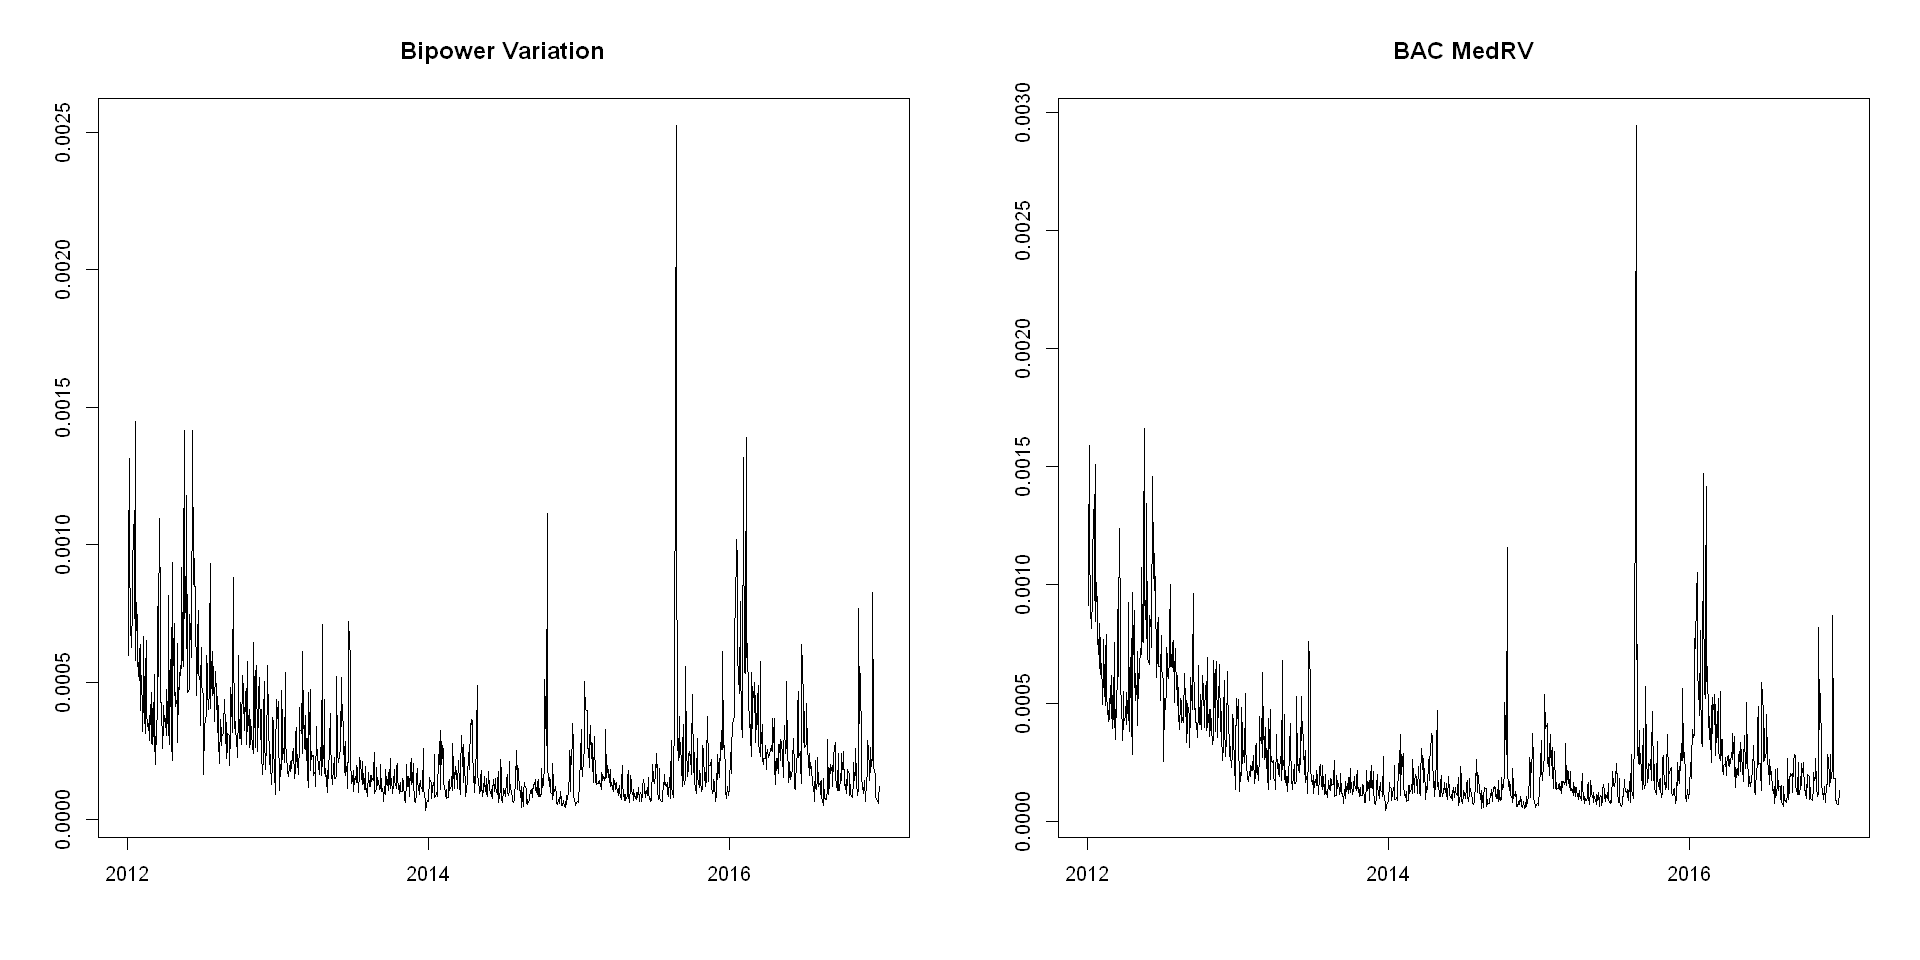

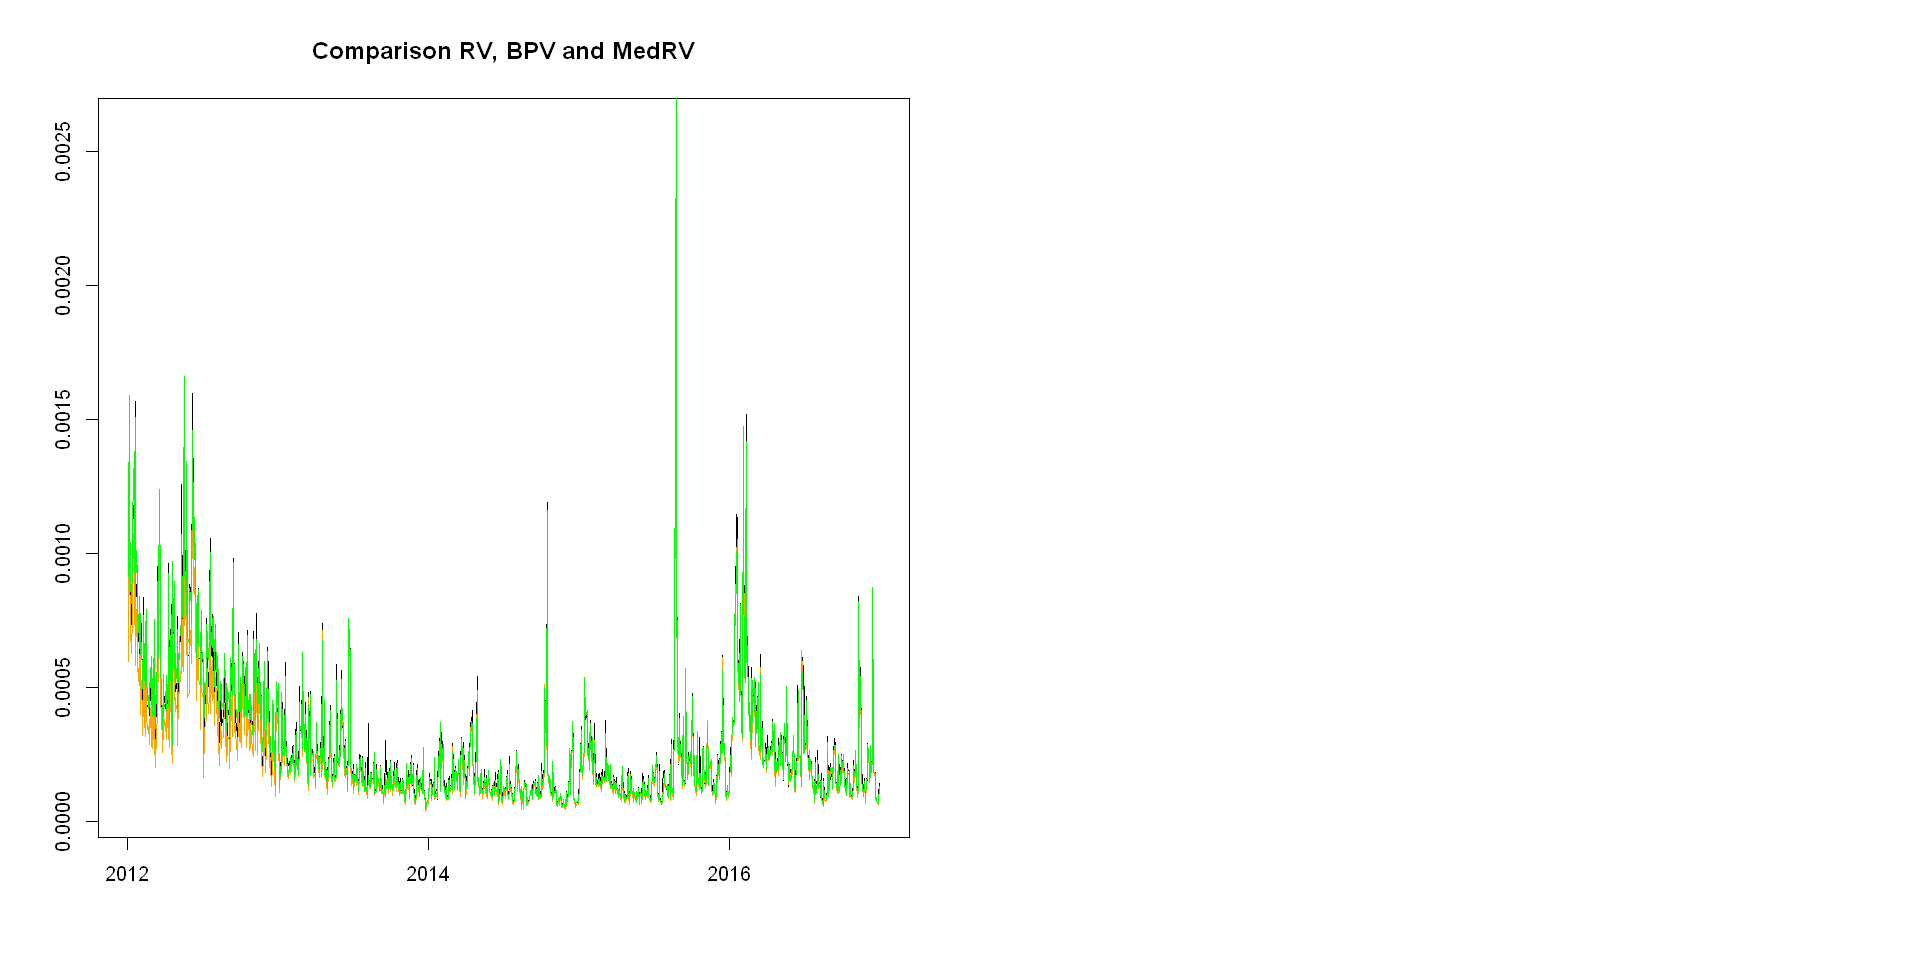

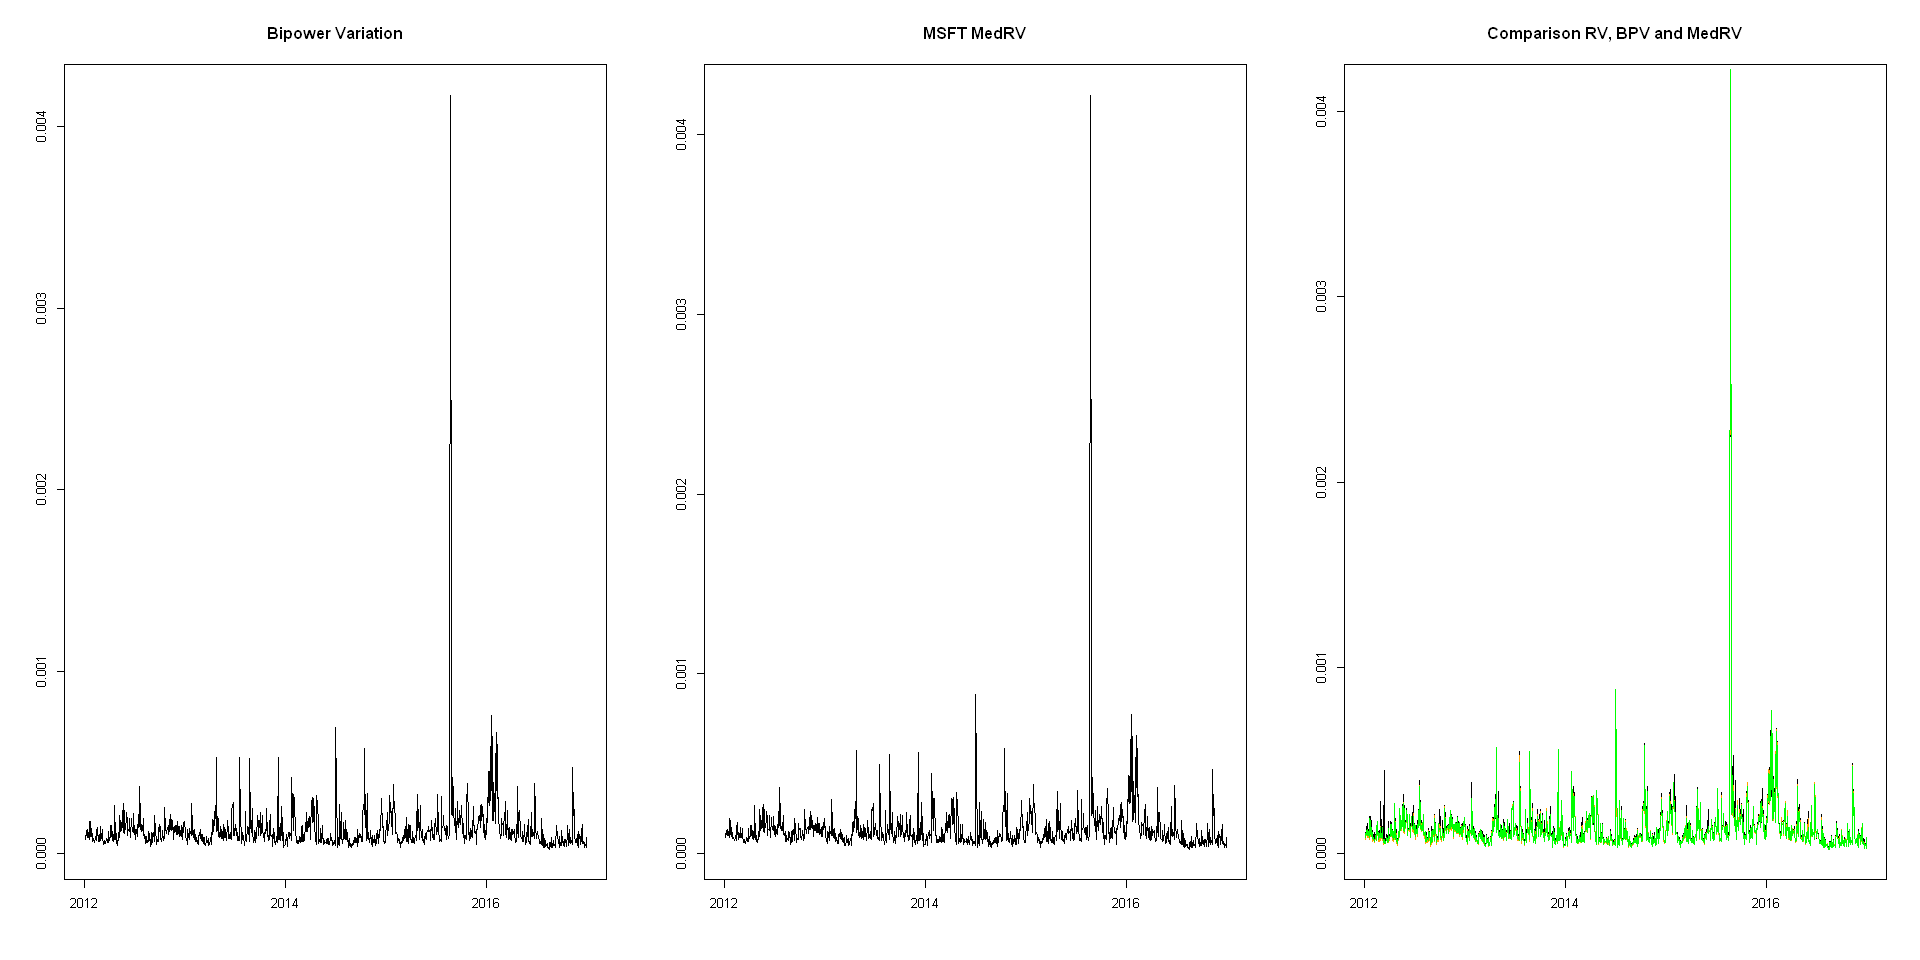

                       ztest     lower    upper      p.value
2012-01-03 16:00:00 6.424369 -1.959964 1.959964 1.324172e-10
2012-01-04 16:00:00 1.814386 -1.959964 1.959964 6.961827e-02
2012-01-05 16:00:00 4.184533 -1.959964 1.959964 2.857527e-05
2012-01-06 16:00:00 4.059917 -1.959964 1.959964 4.909007e-05
2012-01-09 16:00:00 3.738418 -1.959964 1.959964 1.851816e-04
2012-01-10 16:00:00 3.668771 -1.959964 1.959964 2.437191e-04
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

                       ztest     lower    upper      p.value
2012-01-03 16:00:00 6.855655 -1.959964 1.959964 7.098654e-12
2012-01-04 16:00:00 2.281651 -1.959964 1.959964 2.250995e-02
2012-01-05 16:00:00 7.751206 -1.959964 1.959964 9.102388e-15
2012-01-06 16:00:00 5.524549 -1.959964 1.959964 3.303334e-08
2012-01-09 16:00:00 2.400956 -1.959964 1.959964 1.635229e-02
2012-01-10 16:00:00 2.597942 -1.959964 1.959964 9.378429e-03
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

                        ztest     lower    upper      p.value
2012-01-03 16:00:00 0.5563091 -1.959964 1.959964 5.779996e-01
2012-01-04 16:00:00 5.7929288 -1.959964 1.959964 6.916943e-09
2012-01-05 16:00:00 1.0568992 -1.959964 1.959964 2.905576e-01
2012-01-06 16:00:00 1.7064755 -1.959964 1.959964 8.791959e-02
2012-01-09 16:00:00 6.4570382 -1.959964 1.959964 1.067720e-10
2012-01-10 16:00:00 5.3429098 -1.959964 1.959964 9.146630e-08
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

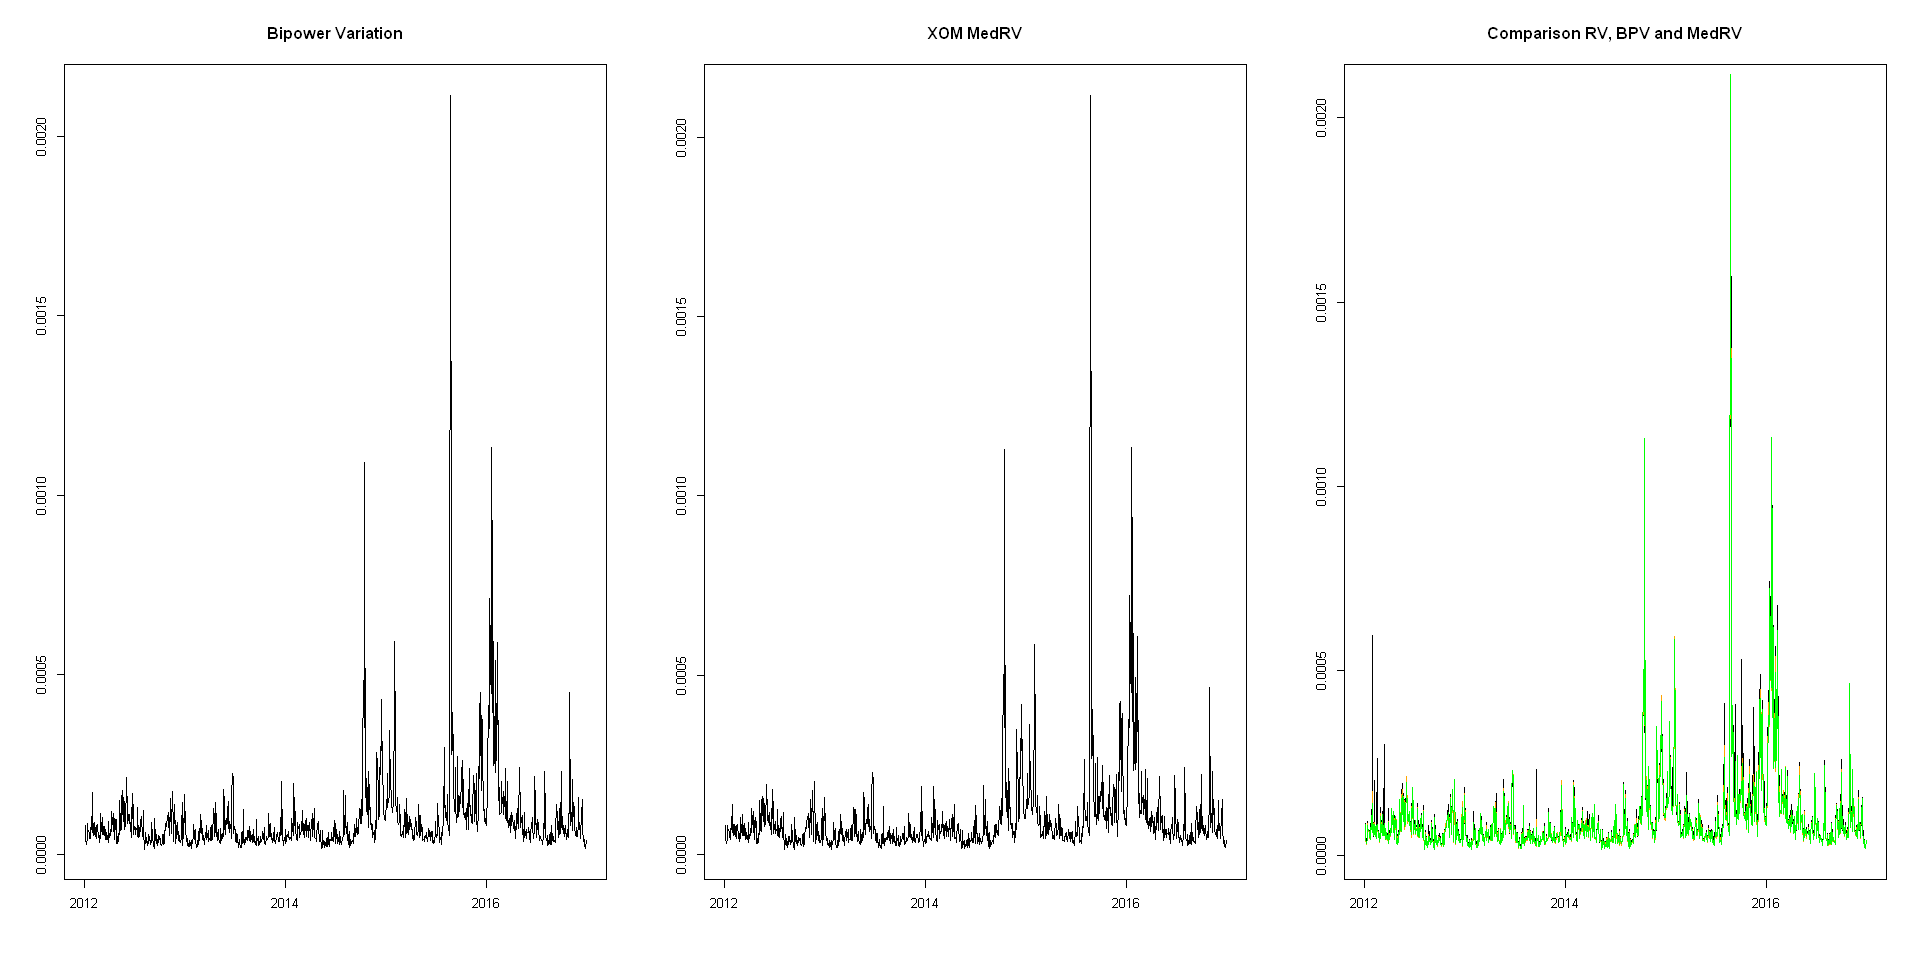

In [53]:
# Calculate Bipower variation and Median Realized Variation. Then test for jumps in each period
# Compare graphically realized variation, bipower variation and MedRV

#BAC
# BIPOWER VARIATION
par(mfrow=c(1, 3))
BAC_BPV<-rBPCov(BAC_no_time, makeReturns = T)

plot.zoo(BAC_BPV,xlab=NA,ylab=NA, main="BAC Bipower Variation")
BAC_BP_jumps<- BNSjumpTest(BAC_xts,IVestimator = "BV",IQestimator = "TP", makeReturns = T)
# MedRV estimator
BAC_MedRV<-rMedRVar(BAC_no_time, makeReturns = T)
plot.zoo(BAC_MedRV, xlab=NA, ylab=NA,main="BAC MedRV")
BAC_MedRV_jumps<- BNSjumpTest(BAC_xts,IVestimator = "rMedRVar",IQestimator = "TP", makeReturns = T)

plot.zoo(BAC_RV_returns, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(zoo(BAC_BPV),col="orange")
lines(zoo(BAC_MedRV),col="green")

# MSFT
# BIPOWER VARIATION
par(mfrow=c(1, 3))
MSFT_BPV<-rBPCov(MSFT_no_time, makeReturns = T)
plot.zoo(MSFT_BPV,xlab=NA,ylab=NA, main="MSFT Bipower Variation")
MSFT_BP_jumps<- BNSjumpTest(MSFT_xts,IVestimator = "BV",IQestimator = "TP", makeReturns = T)
# MedRV estimator
MSFT_MedRV<-rMedRVar(MSFT_no_time, makeReturns = T)
plot.zoo(MSFT_MedRV, xlab=NA, ylab=NA,main="MSFT MedRV")
MSFT_MedRV_jumps<- BNSjumpTest(MSFT_xts,IVestimator = "rMedRVar",IQestimator = "TP", makeReturns = T)

plot.zoo(MSFT_RV_returns, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(zoo(MSFT_BPV),col="orange")
lines(zoo(MSFT_MedRV),col="green")

# XOM
# BIPOWER VARIATION
par(mfrow=c(1, 3))
XOM_BPV<-rBPCov(XOM_no_time, makeReturns = T)
plot.zoo(XOM_BPV,xlab=NA,ylab=NA, main="XOM Bipower Variation")
XOM_BP_jumps<- BNSjumpTest(XOM_xts,IVestimator = "BV",IQestimator = "TP", makeReturns = T)
# MedRV estimator
XOM_MedRV<-rMedRVar(XOM_no_time, makeReturns = T)
plot.zoo(XOM_MedRV, xlab=NA, ylab=NA,main="XOM MedRV")
XOM_MedRV_jumps<- BNSjumpTest(XOM_xts,IVestimator = "rMedRVar",IQestimator = "TP", makeReturns = T)

plot.zoo(XOM_RV_returns, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(zoo(XOM_BPV),col="orange")
lines(zoo(XOM_MedRV),col="green")

# Jumps
head(BAC_BP_jumps)
head(MSFT_BP_jumps)
head(XOM_BP_jumps)


### 10)

## Problem 2

### 1) & 2)

In [8]:
# Convert 1-minute to 5-minute interval
BAC_xts5 <- to.minutes5(BAC_xts, OHLC=FALSE)
MSFT_xts5 <- to.minutes5(MSFT_xts, OHLC=FALSE)
XOM_xts5 <- to.minutes5(XOM_xts, OHLC=FALSE)

In [55]:
# BAC
BAC_no_time5 <- BAC_xts5
index(BAC_no_time5)<-as.Date(index(BAC_no_time5))

# MSFT
MSFT_no_time5 <- MSFT_xts5
index(MSFT_no_time5)<-as.Date(index(MSFT_no_time5))

# XOM
XOM_no_time5 <- XOM_xts5
index(XOM_no_time5)<-as.Date(index(XOM_no_time5))

In [9]:
head(XOM_xts5)

                       [,1]
2012-01-03 09:34:00 69.3393
2012-01-03 09:39:00 69.5246
2012-01-03 09:44:00 69.3957
2012-01-03 09:49:00 69.2991
2012-01-03 09:54:00 69.4924
2012-01-03 09:59:00 69.3957

### 3)

In [9]:
# Separate data by days and calculate returns
BAC_daily5 <- split(BAC_xts5, f = "days")
BAC_returns5 <- lapply(BAC_daily5, makeReturns)
BAC_returns5 <- do.call(rbind, BAC_returns5)


MSFT_daily5 <- split(MSFT_xts5, f = "days")
MSFT_returns5 <- lapply(MSFT_daily5, makeReturns)
MSFT_returns5 <- do.call(rbind, MSFT_returns5)


XOM_daily5 <- split(XOM_xts5, f = "days")
XOM_returns5 <- lapply(XOM_daily5, makeReturns)
XOM_returns5 <- do.call(rbind, XOM_returns5)


In [11]:
head(BAC_returns5)

                            [,1]
2012-01-03 09:34:00  0.000000000
2012-01-03 09:39:00  0.001731538
2012-01-03 09:44:00  0.000000000
2012-01-03 09:49:00  0.000000000
2012-01-03 09:54:00 -0.001731538
2012-01-03 09:59:00  0.000000000

### 4)

In [12]:
# BAC
BAC_RV_returns5 <- rCov(BAC_returns5, makeReturns = FALSE)
index(BAC_RV_returns5) <-as.Date(index(BAC_RV_returns5))
BAC_RV_prices5 <- rCov(BAC_xts5, makeReturns = TRUE)

# MSFT
MSFT_RV_returns5 <- rCov(MSFT_returns5, makeReturns = FALSE)
index(MSFT_RV_returns5)<-as.Date(index(MSFT_RV_returns5))
MSFT_RV_prices5 <- rCov(MSFT_xts5, makeReturns = TRUE)

# XOM
XOM_RV_returns5 <- rCov(XOM_returns5, makeReturns = FALSE)
index(XOM_RV_returns5)<-as.Date(index(XOM_RV_returns5))
XOM_RV_prices5 <- rCov(XOM_xts5, makeReturns = TRUE)

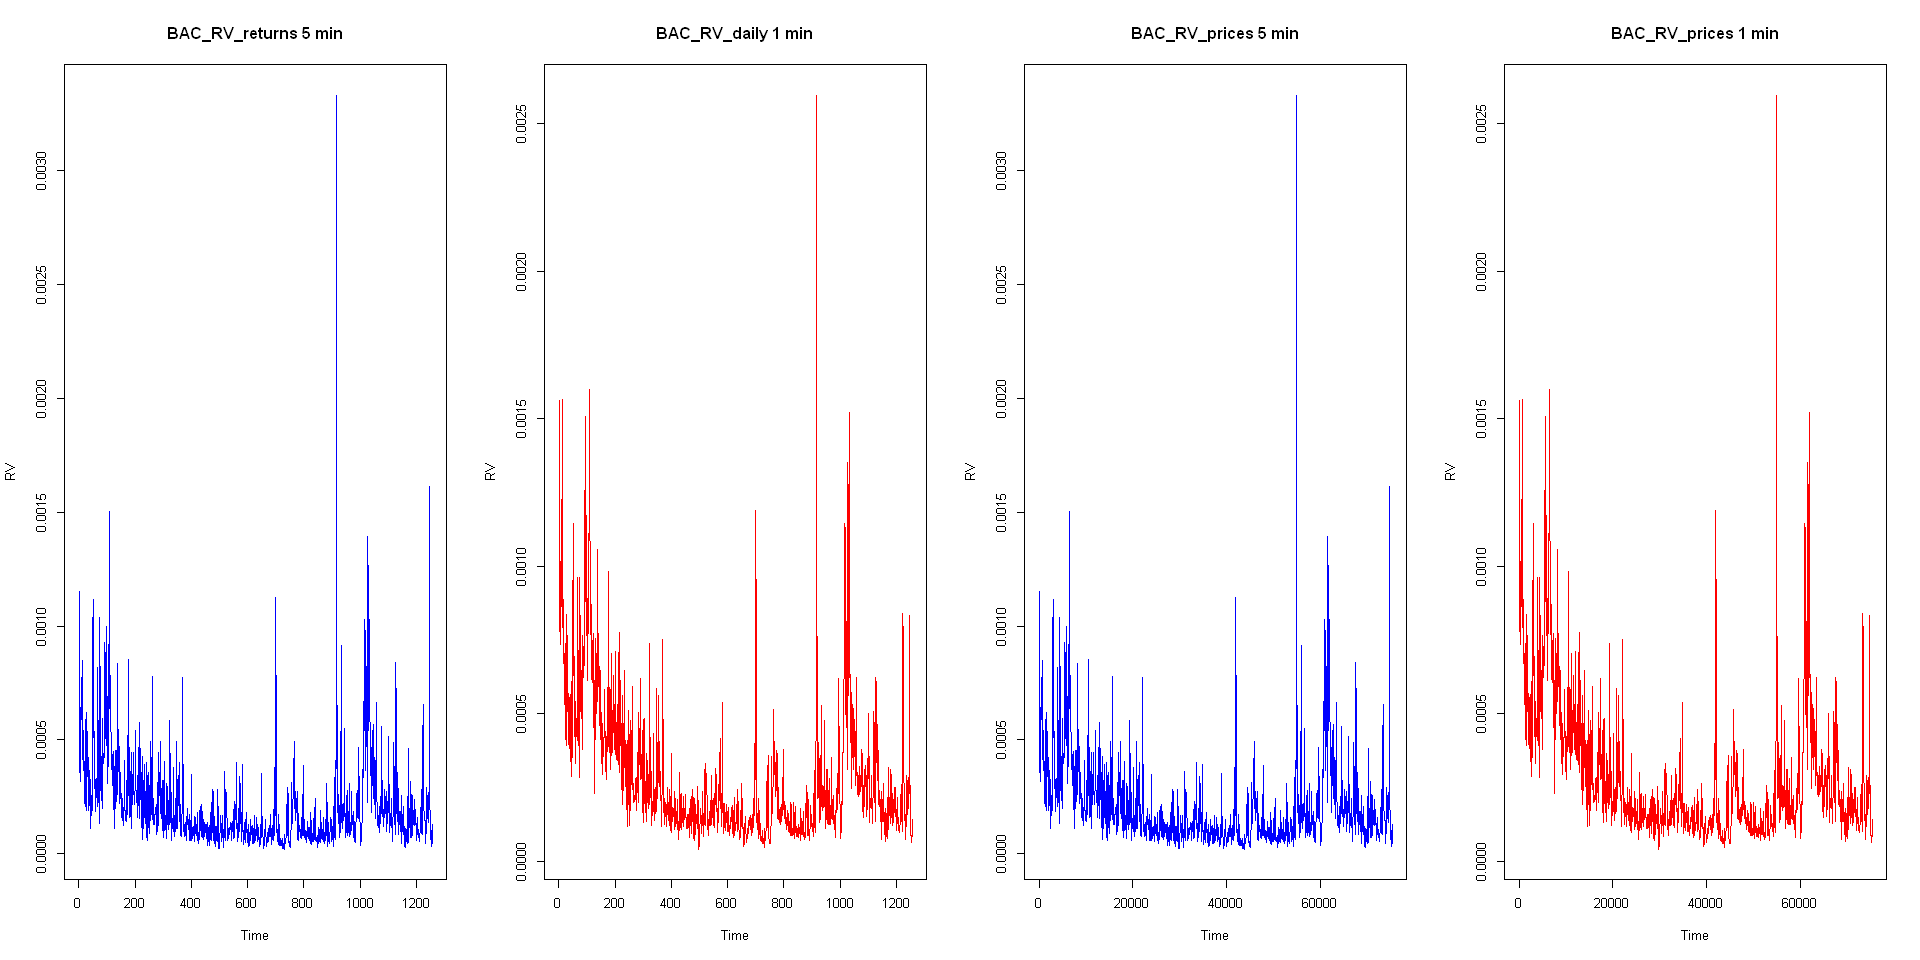

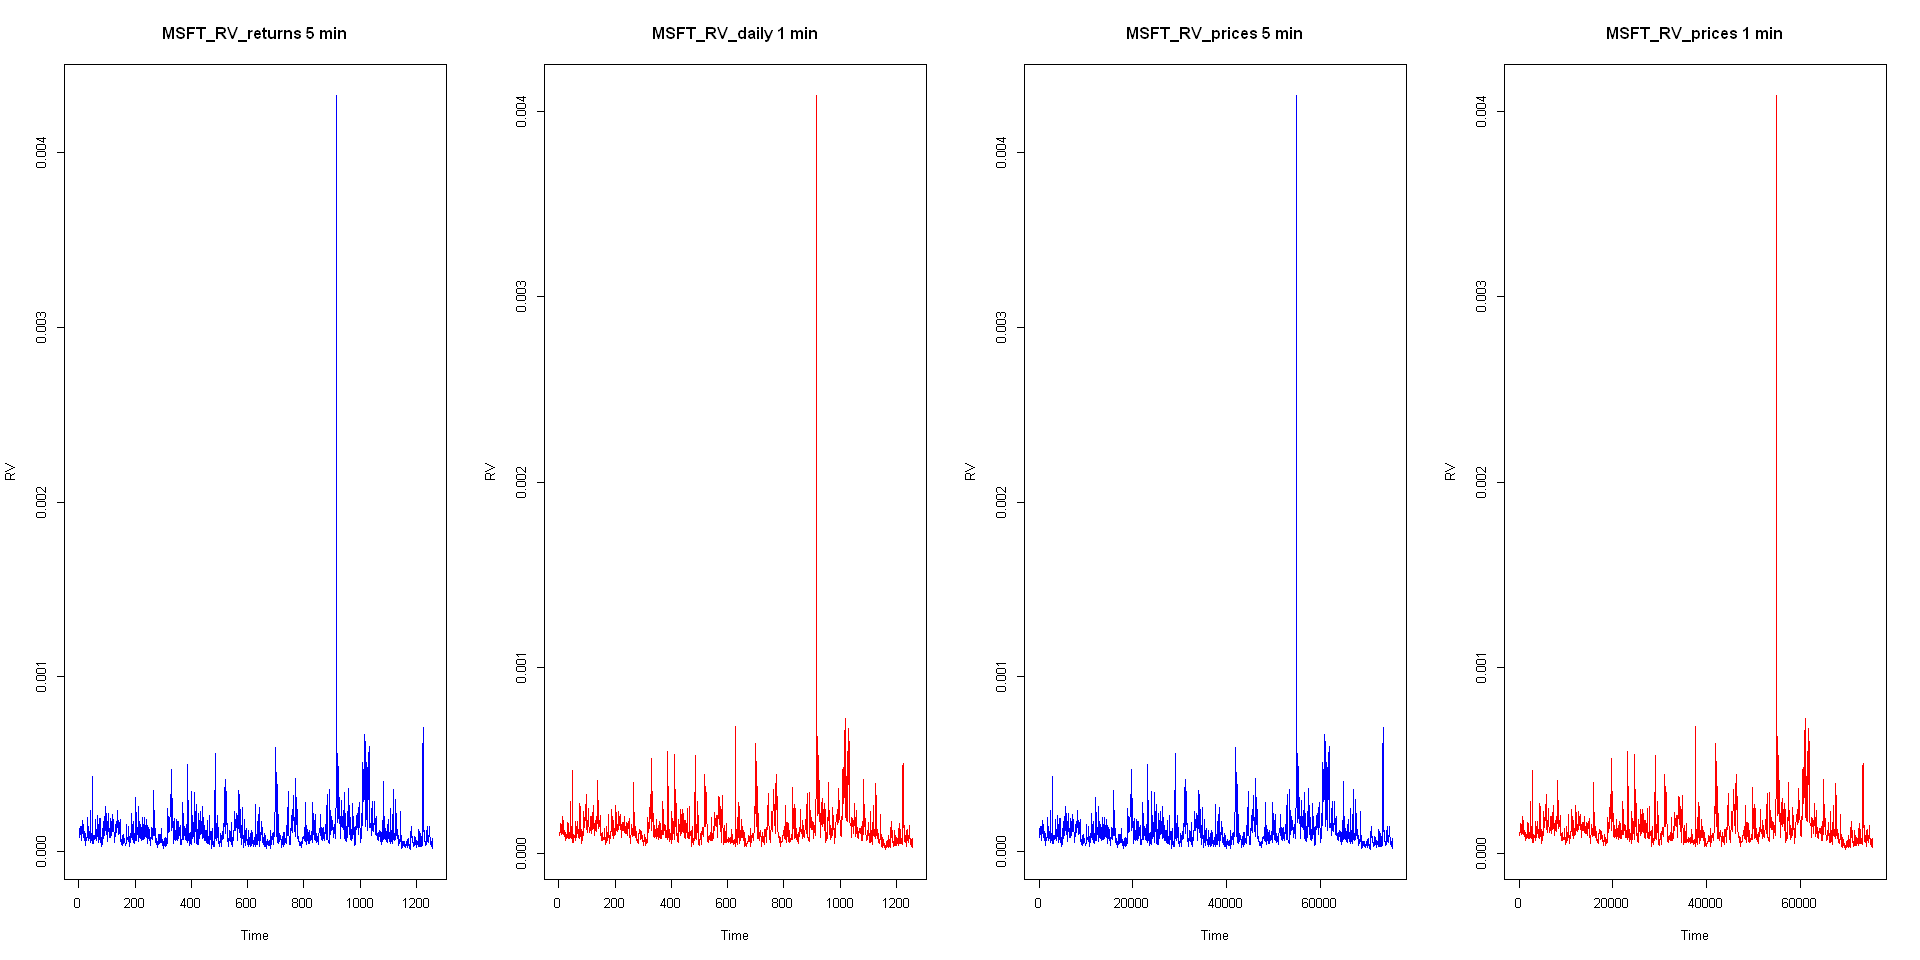

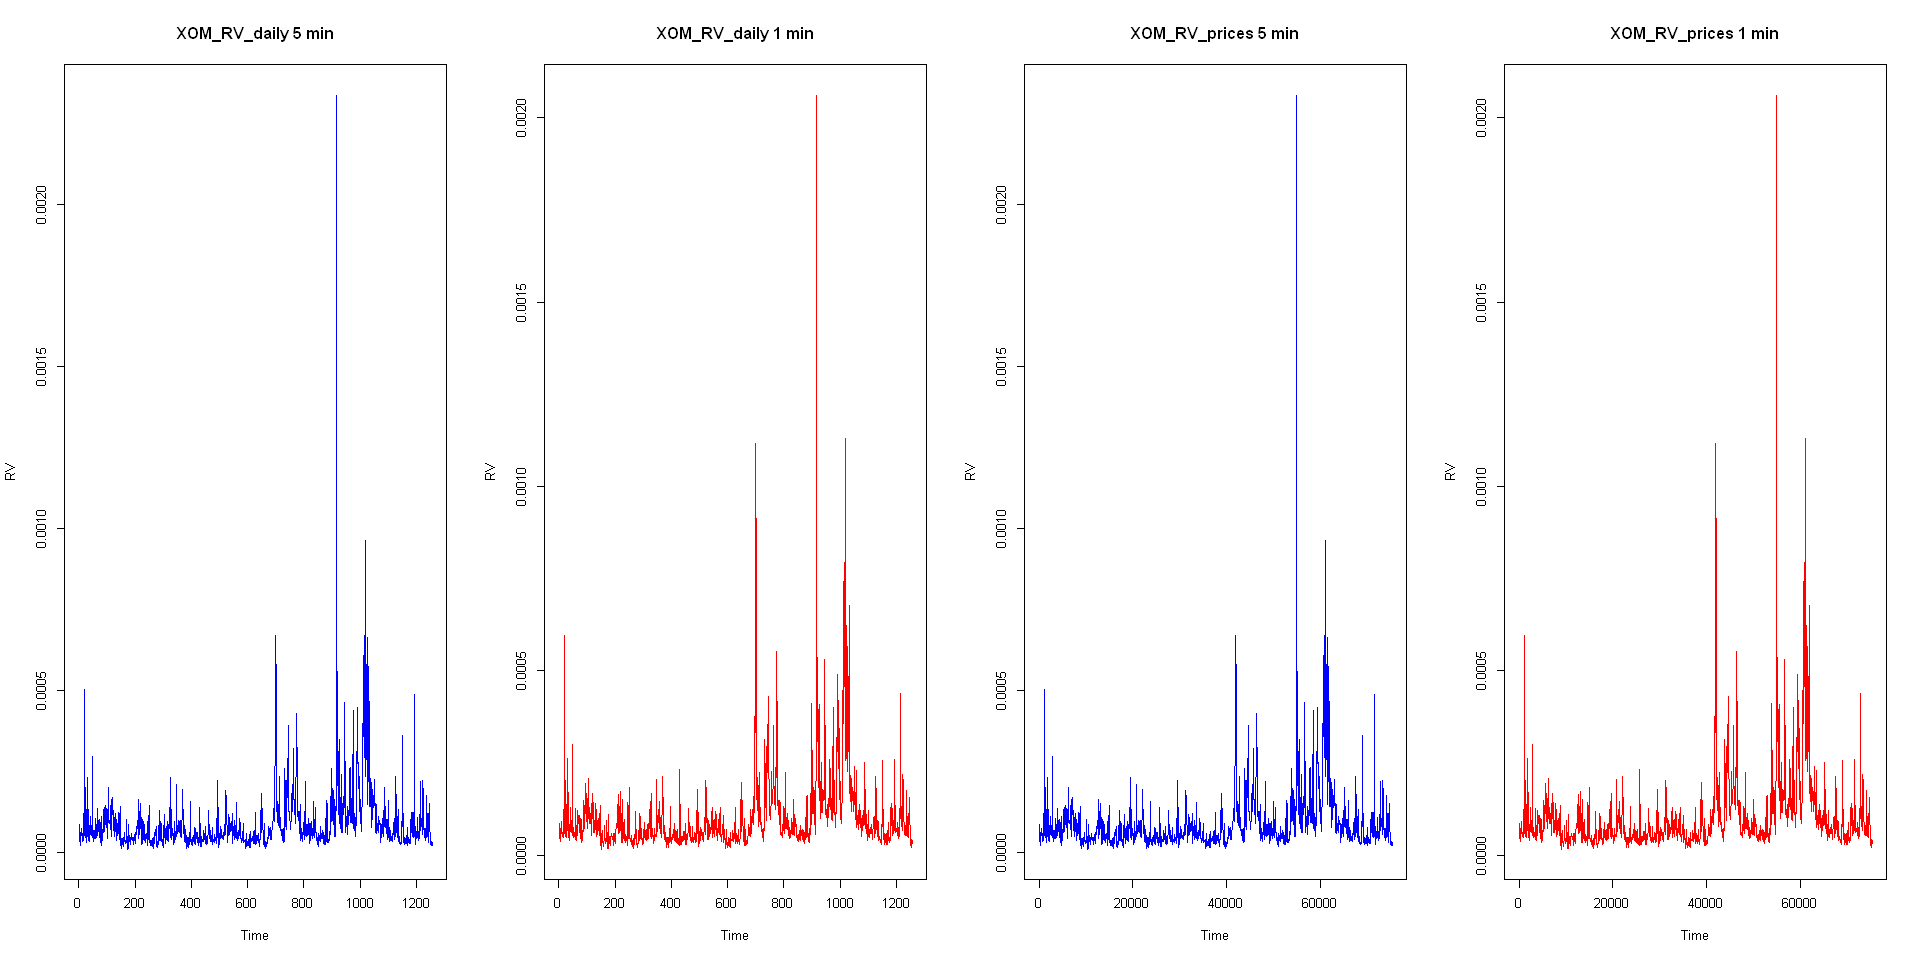

In [13]:
# BAC
par(mfrow=c(1, 4))
plot.ts(BAC_RV_returns5, col = "blue", main = "BAC_RV_returns 5 min", ylab = "RV")
plot.ts(BAC_RV_daily, col = "red", main = "BAC_RV_daily 1 min", ylab = "RV")
plot.ts(BAC_RV_prices5, col = "blue", main = "BAC_RV_prices 5 min", ylab = "RV")
plot.ts(BAC_RV_prices, col = "red", main = "BAC_RV_prices 1 min", ylab = "RV")

# MSFT
par(mfrow=c(1, 4))
plot.ts(MSFT_RV_returns5, col = "blue", main = "MSFT_RV_returns 5 min", ylab = "RV")
plot.ts(MSFT_RV_daily, col = "red", main = "MSFT_RV_daily 1 min", ylab = "RV")
plot.ts(MSFT_RV_prices5, col = "blue", main = "MSFT_RV_prices 5 min", ylab = "RV")
plot.ts(MSFT_RV_prices, col = "red", main = "MSFT_RV_prices 1 min", ylab = "RV")

# XOM
par(mfrow=c(1, 4))
plot.ts(XOM_RV_returns5, col = "blue", main = "XOM_RV_daily 5 min", ylab = "RV")
plot.ts(XOM_RV_daily, col = "red", main = "XOM_RV_daily 1 min", ylab = "RV")
plot.ts(XOM_RV_prices5, col = "blue", main = "XOM_RV_prices 5 min", ylab = "RV")
plot.ts(XOM_RV_prices, col = "red", main = "XOM_RV_prices 1 min", ylab = "RV")

### 5) 

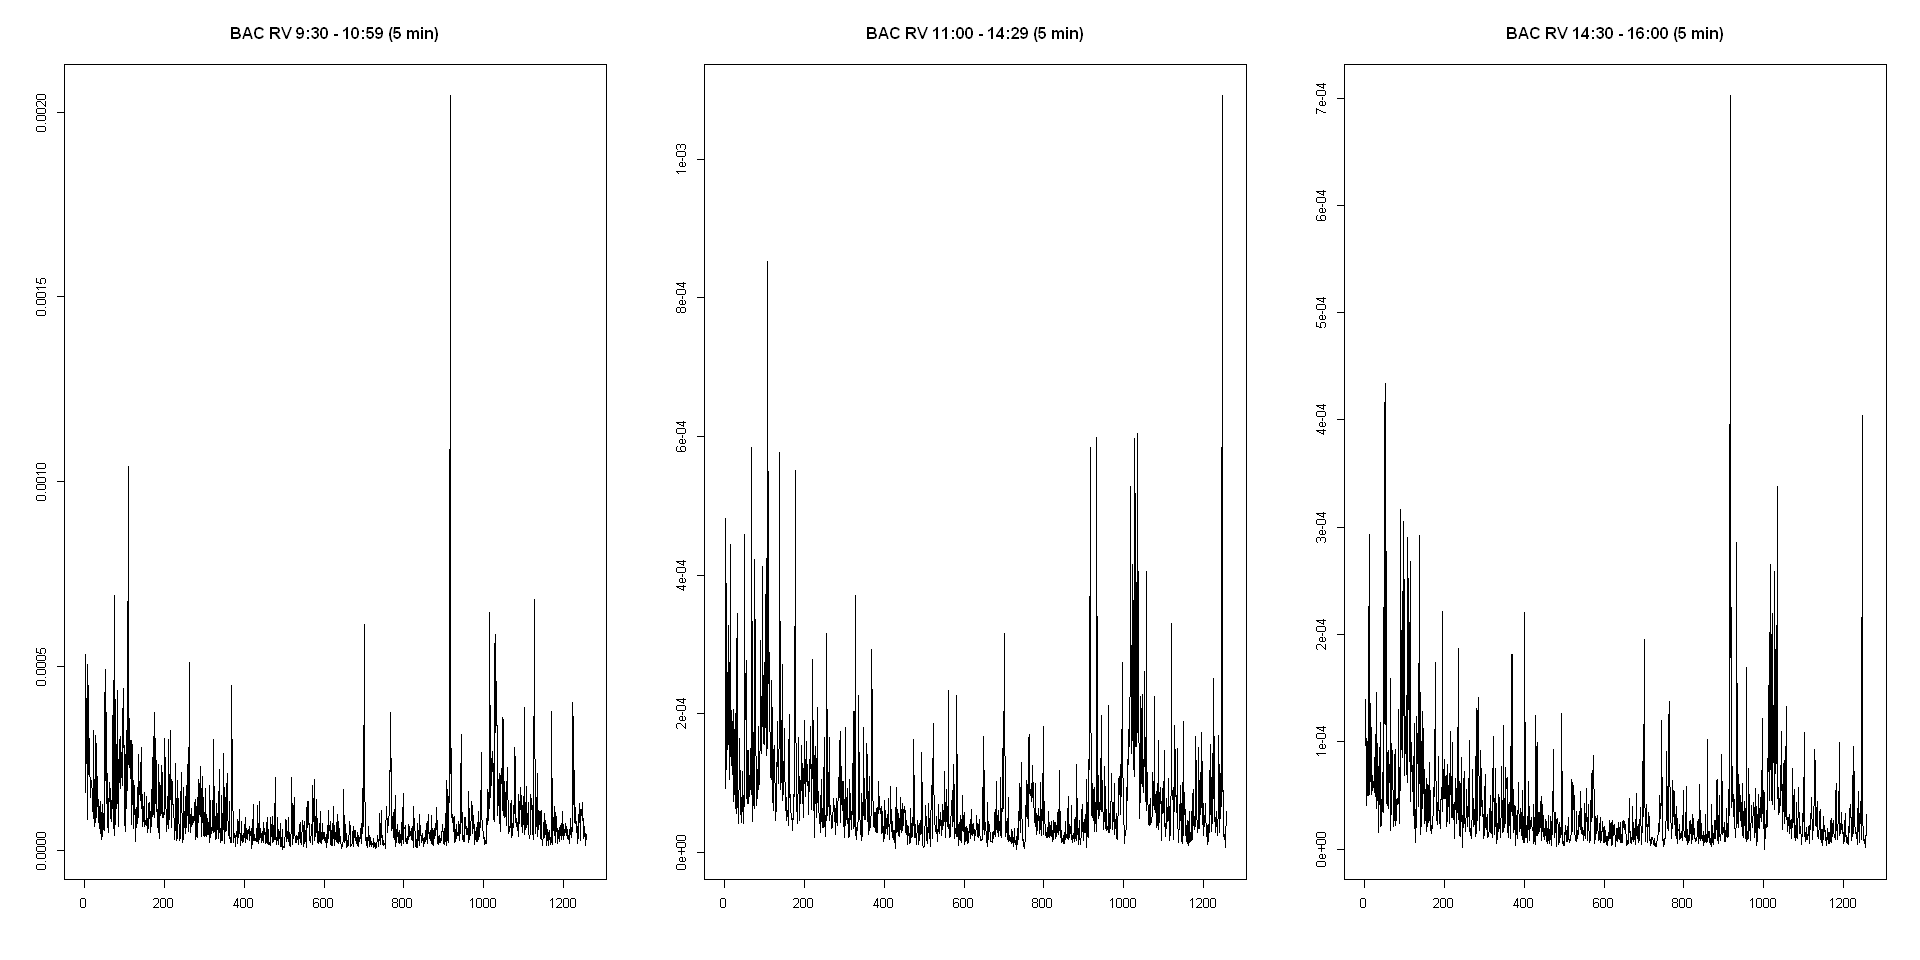

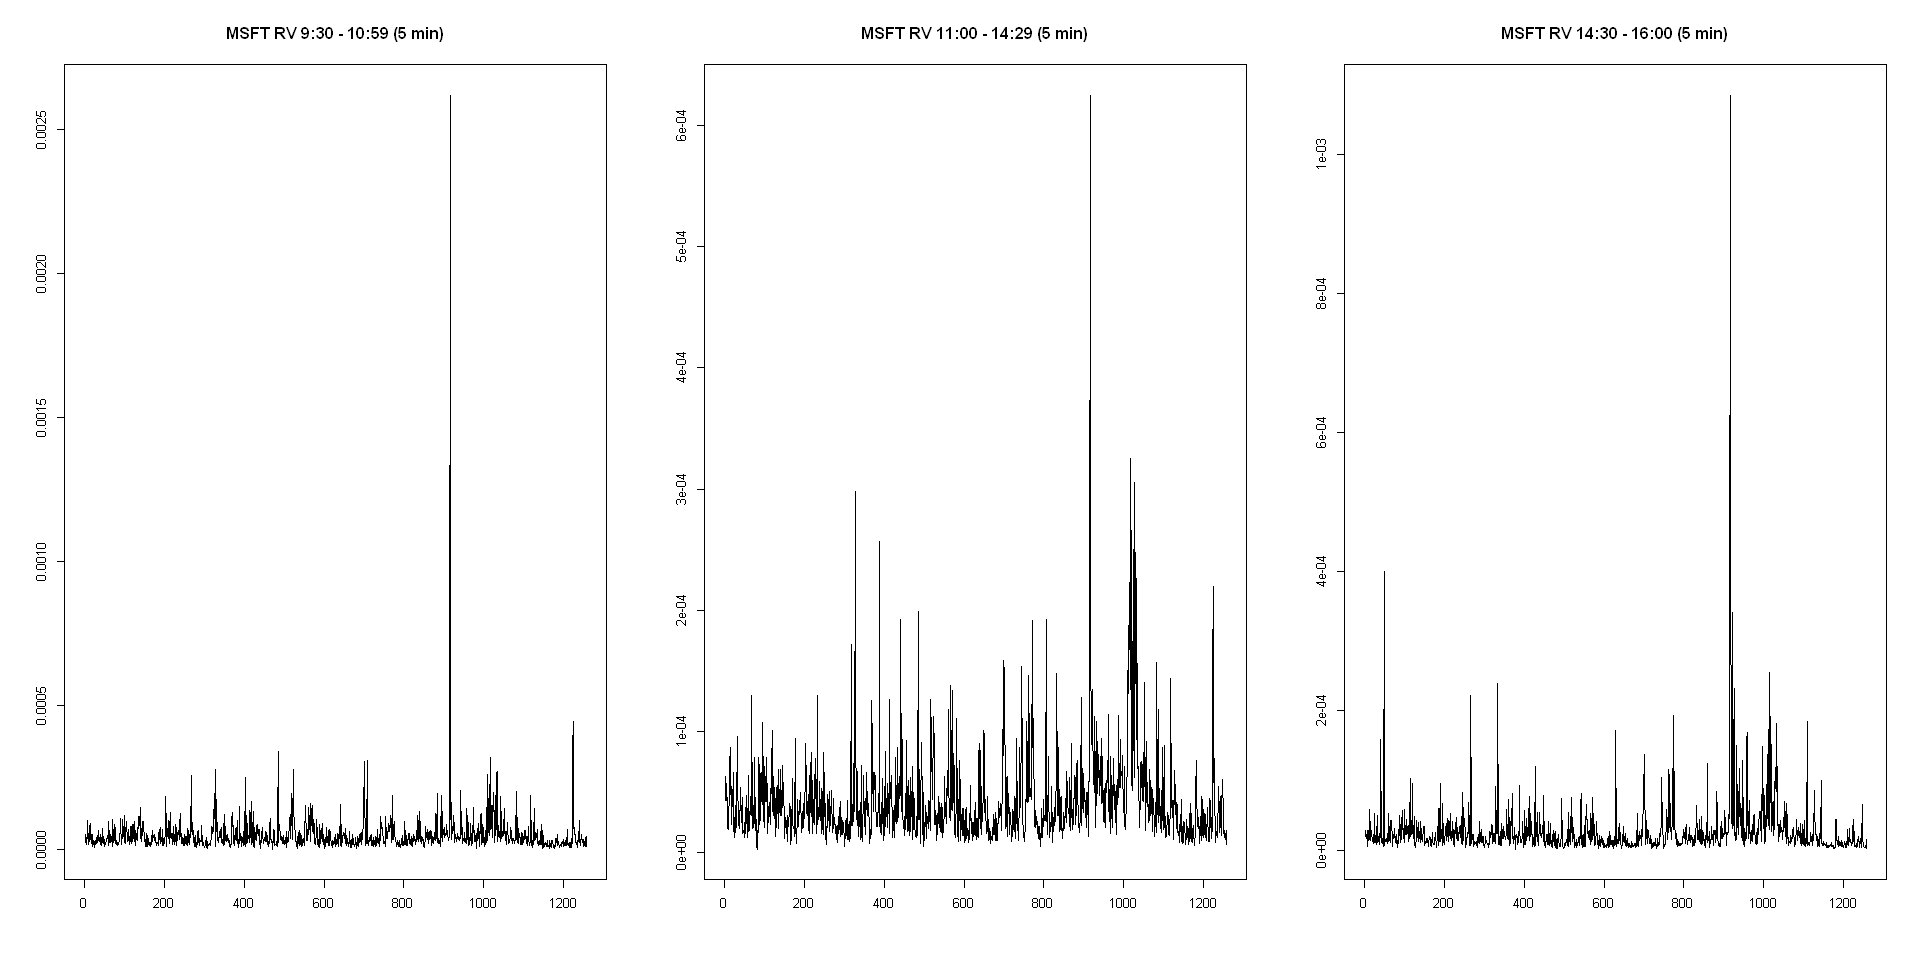

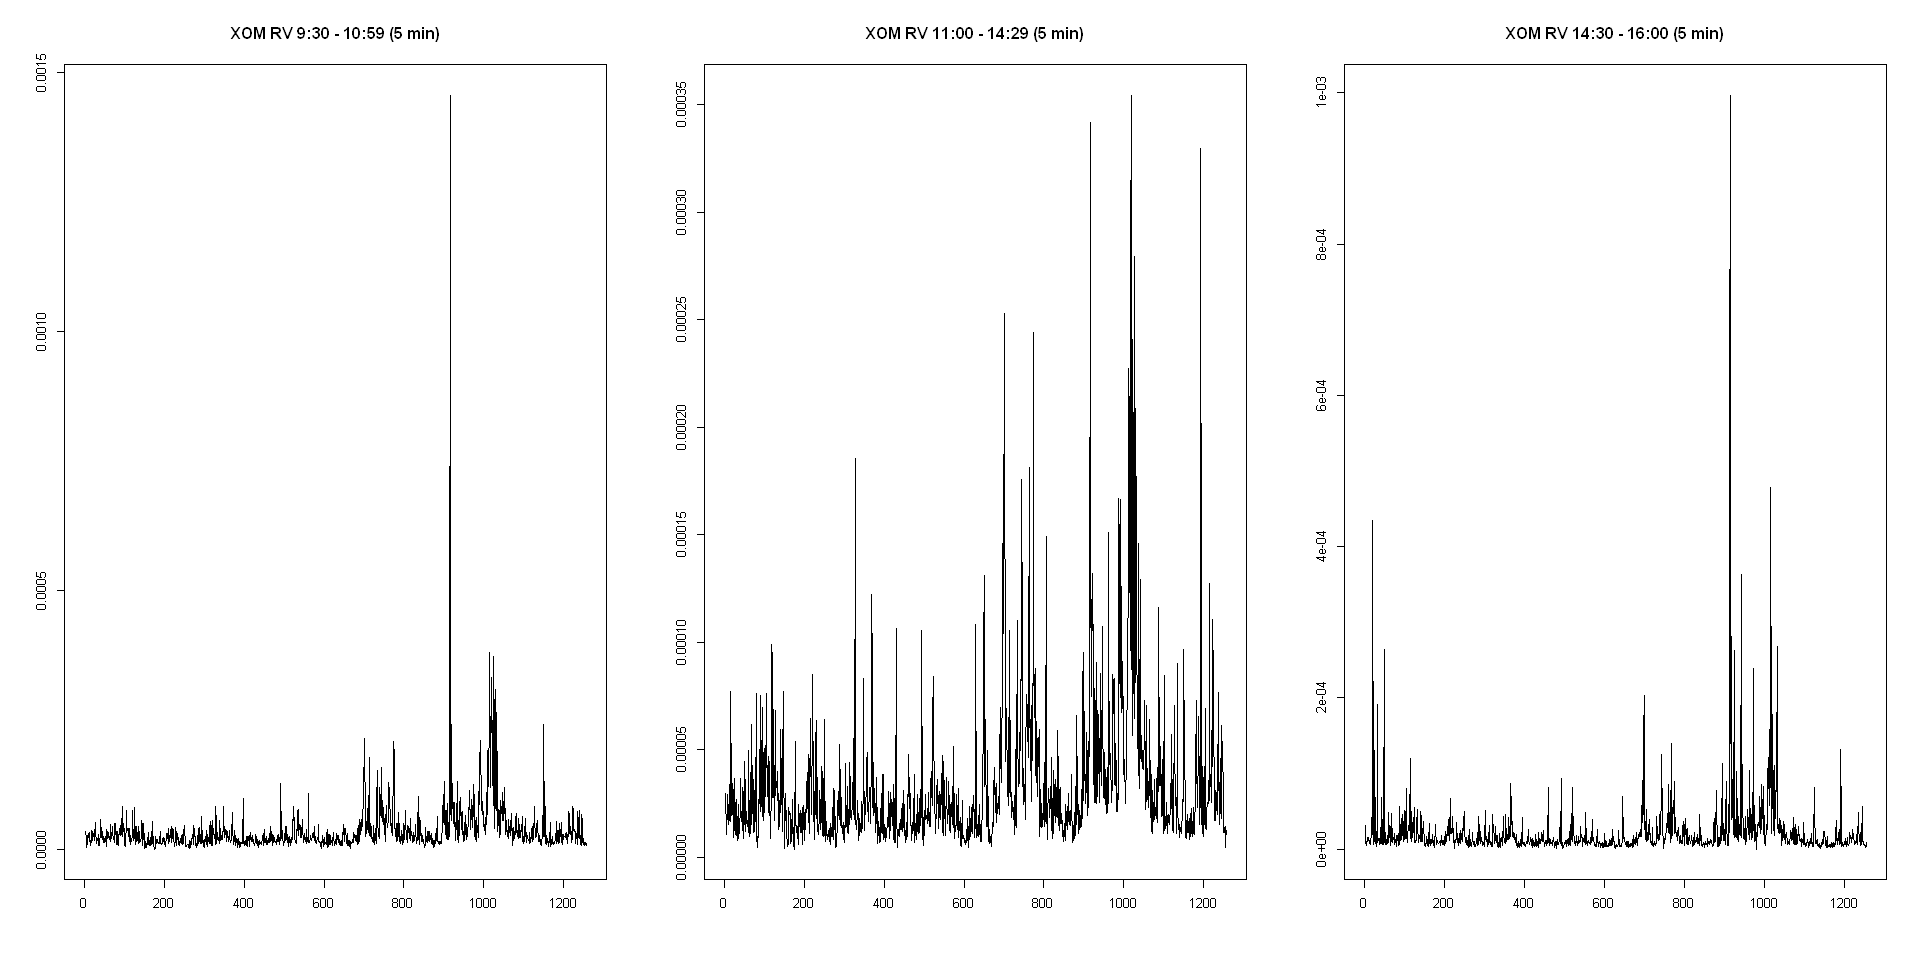

In [14]:
# Calculate realized variance from returns for intraday periods
# First calculate returns, subset it by time, then calculate RV and plot it

# BAC
par(mfrow=c(1, 3))
BAC_returns15 <- BAC_returns5["T09:30:00/T10:59:00"]
index(BAC_returns15)<-as.Date(index(BAC_returns15))
BAC_RV_returns15 <- rCov(BAC_returns15, makeReturns = F)
plot.ts(BAC_RV_returns15, xlab = NA,ylab = NA, main = "BAC RV 9:30 - 10:59 (5 min)")

BAC_returns25 <- BAC_returns5["T11:00:00/T14:29:00" ]
index(BAC_returns25)<-as.Date(index(BAC_returns25))
BAC_RV_returns25 <- rCov(BAC_returns25, makeReturns = F)
plot.ts(BAC_RV_returns25, xlab = NA,ylab = NA, main = "BAC RV 11:00 - 14:29 (5 min)")

BAC_returns35 <- BAC_returns5["T14:30:00/T16:00:00" ]
index(BAC_returns35)<-as.Date(index(BAC_returns35))
BAC_RV_returns35 <- rCov(BAC_returns35, makeReturns = F)
plot.ts(BAC_RV_returns35, xlab = NA,ylab = NA, main = "BAC RV 14:30 - 16:00 (5 min)")

# MSFT
par(mfrow=c(1, 3))
MSFT_returns15 <- MSFT_returns5["T09:30:00/T10:59:00" ]
index(MSFT_returns15)<-as.Date(index(MSFT_returns15))
MSFT_RV_returns15 <- rCov(MSFT_returns15, makeReturns = F)
plot.ts(MSFT_RV_returns15, xlab = NA,ylab = NA, main = "MSFT RV 9:30 - 10:59 (5 min)")

MSFT_returns25 <- MSFT_returns5["T11:00:00/T14:29:00" ]
index(MSFT_returns25)<-as.Date(index(MSFT_returns25))
MSFT_RV_returns25 <- rCov(MSFT_returns25, makeReturns = F)
plot.ts(MSFT_RV_returns25, xlab = NA,ylab = NA, main = "MSFT RV 11:00 - 14:29 (5 min)")

MSFT_returns35 <- MSFT_returns5["T14:30:00/T16:00:00" ]
index(MSFT_returns35)<-as.Date(index(MSFT_returns35))
MSFT_RV_returns35 <- rCov(MSFT_returns35, makeReturns = F)
plot.ts(MSFT_RV_returns35, xlab = NA,ylab = NA, main = "MSFT RV 14:30 - 16:00 (5 min)")

# XOM
par(mfrow=c(1, 3))
XOM_returns15 <- XOM_returns5["T09:30:00/T10:59:00" ]
index(XOM_returns15)<-as.Date(index(XOM_returns15))
XOM_RV_returns15 <- rCov(XOM_returns15, makeReturns = F)
plot.ts(XOM_RV_returns15, xlab = NA,ylab = NA, main = "XOM RV 9:30 - 10:59 (5 min)")

XOM_returns25 <- XOM_returns5["T11:00:00/T14:29:00" ]
index(XOM_returns25)<-as.Date(index(XOM_returns25))
XOM_RV_returns25 <- rCov(XOM_returns25, makeReturns = F)
plot.ts(XOM_RV_returns25, xlab = NA,ylab = NA, main = "XOM RV 11:00 - 14:29 (5 min)")

XOM_returns35 <- XOM_returns5["T14:30:00/T16:00:00" ]
index(XOM_returns35)<-as.Date(index(XOM_returns35))
XOM_RV_returns35 <- rCov(XOM_returns35, makeReturns = F)
plot.ts(XOM_RV_returns35, xlab = NA,ylab = NA, main = "XOM RV 14:30 - 16:00 (5 min)")

### 6)

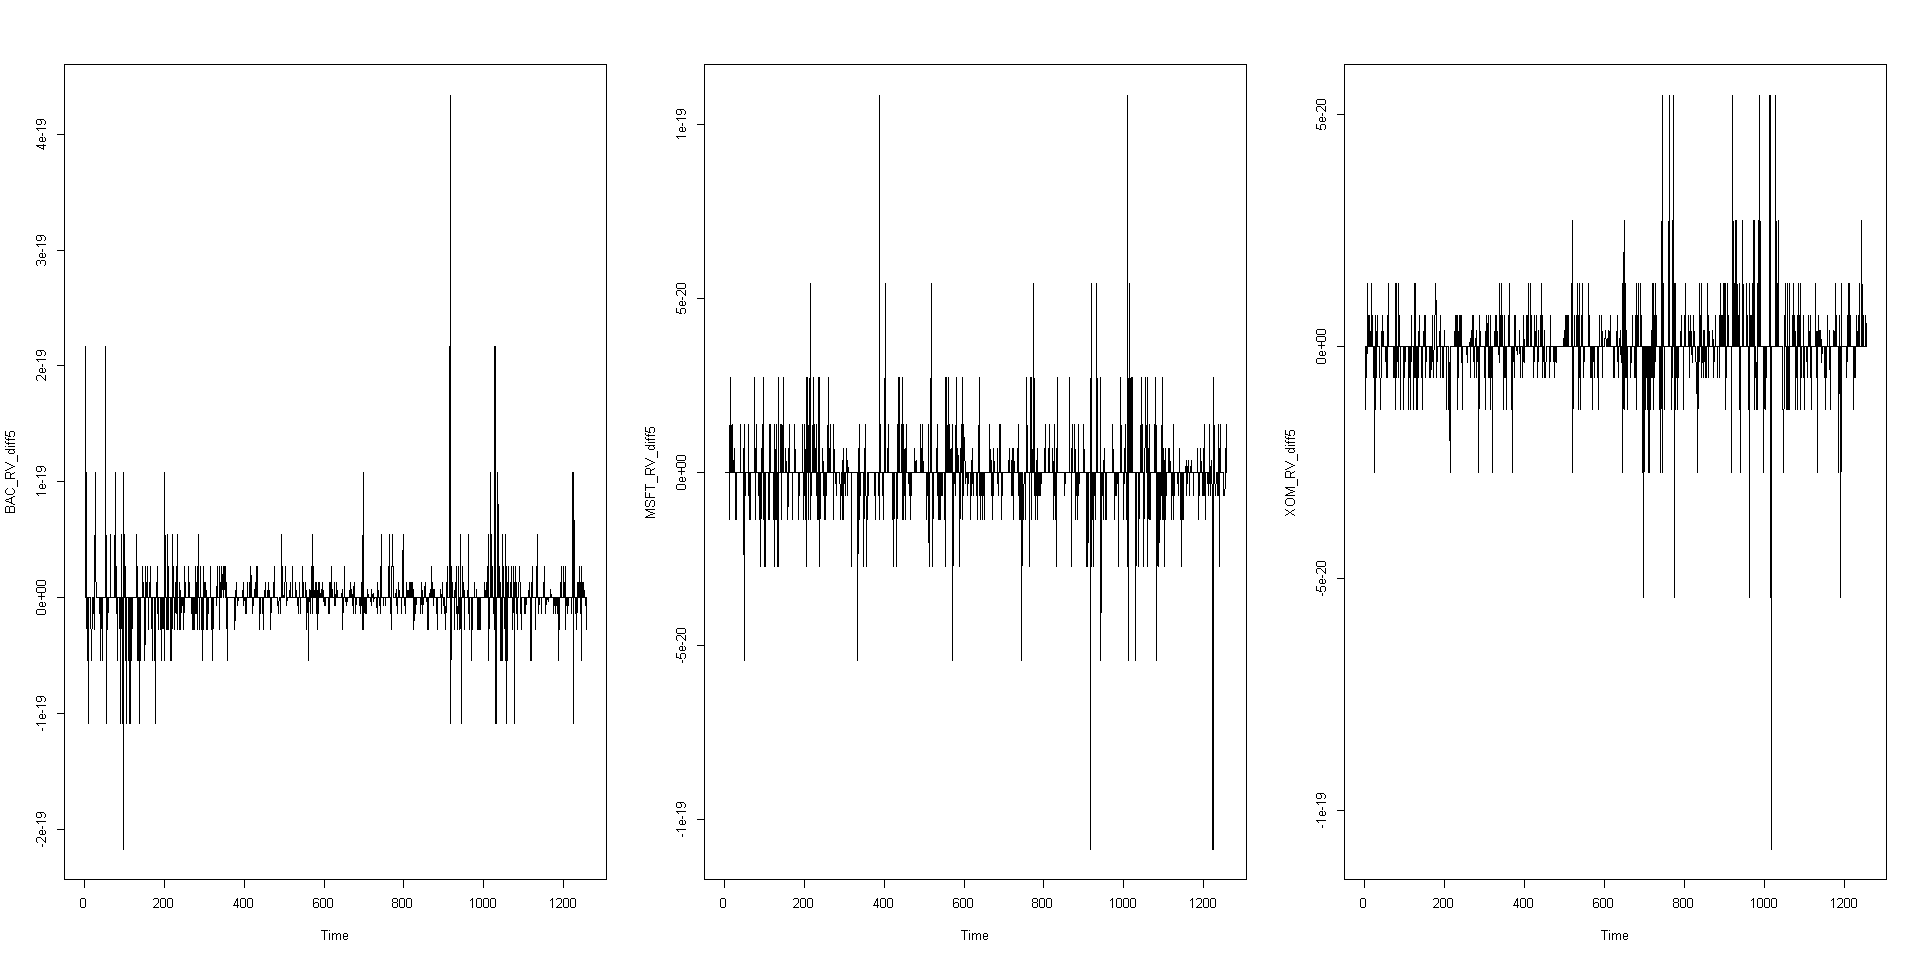

In [15]:
# Calculate daily RV from returns and intraday RV as the sum of RV from intraday periods from the previous part. Plot the difference between the two.
par(mfrow=c(1, 3))

# BAC3
BAC_RV_intraday5 <- BAC_RV_returns15 + BAC_RV_returns25 + BAC_RV_returns35
BAC_RV_diff5 <-   BAC_RV_returns5 - BAC_RV_intraday5
plot.ts(BAC_RV_diff5)

# MSFT
MSFT_RV_intraday5 <- MSFT_RV_returns15 + MSFT_RV_returns25 + MSFT_RV_returns35
MSFT_RV_diff5 <-   MSFT_RV_returns5 - MSFT_RV_intraday5
plot.ts(MSFT_RV_diff5)

# XOM
XOM_RV_intraday5 <- XOM_RV_returns15 + XOM_RV_returns25 + XOM_RV_returns35
XOM_RV_diff5 <-   XOM_RV_returns5 - XOM_RV_intraday5
plot.ts(XOM_RV_diff5)

### 7)

BAC: 
9:30-10:59:  0.4349919 
11:00-14:29:  0.3778947 
14:30-16:00:  0.1871134 


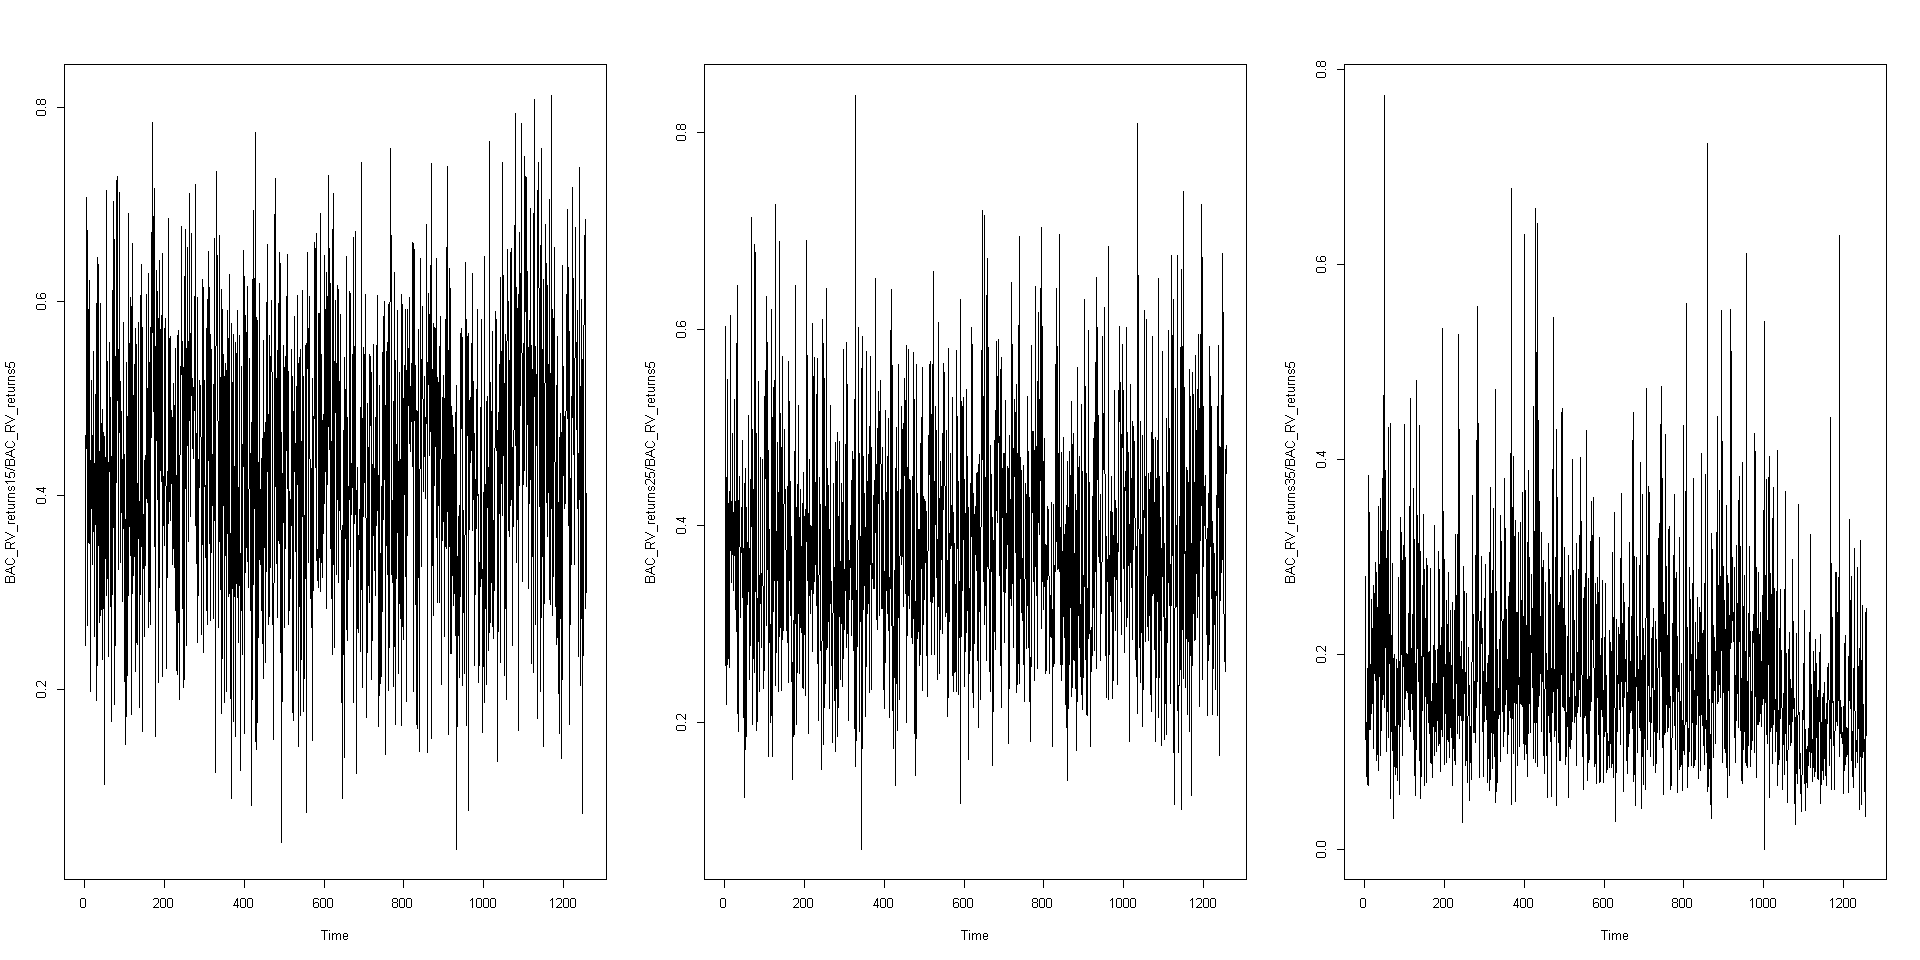

MSFT: 
9:30-10:59:  0.4217206 
11:00-14:29:  0.3577398 
14:30-16:00:  0.2205396 


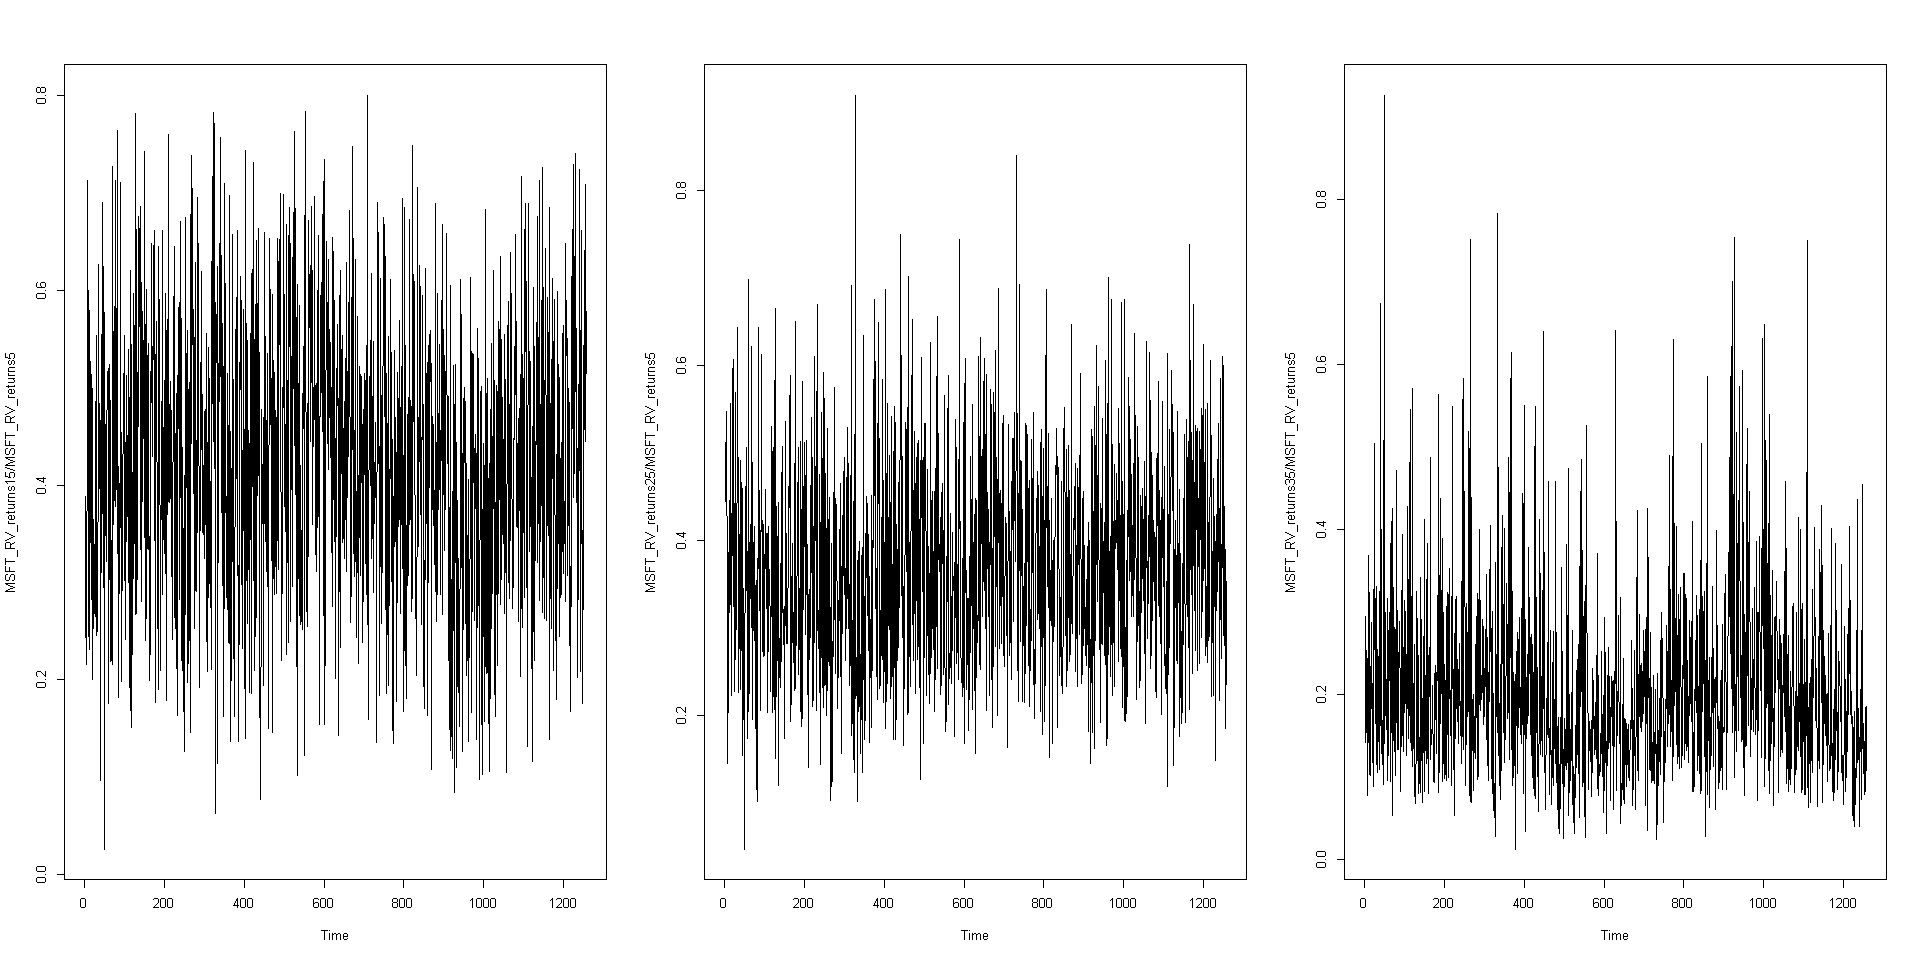

XOM: 
9:30-10:59:  0.3992246 
11:00-14:29:  0.3689391 
14:30-16:00:  0.2318363 


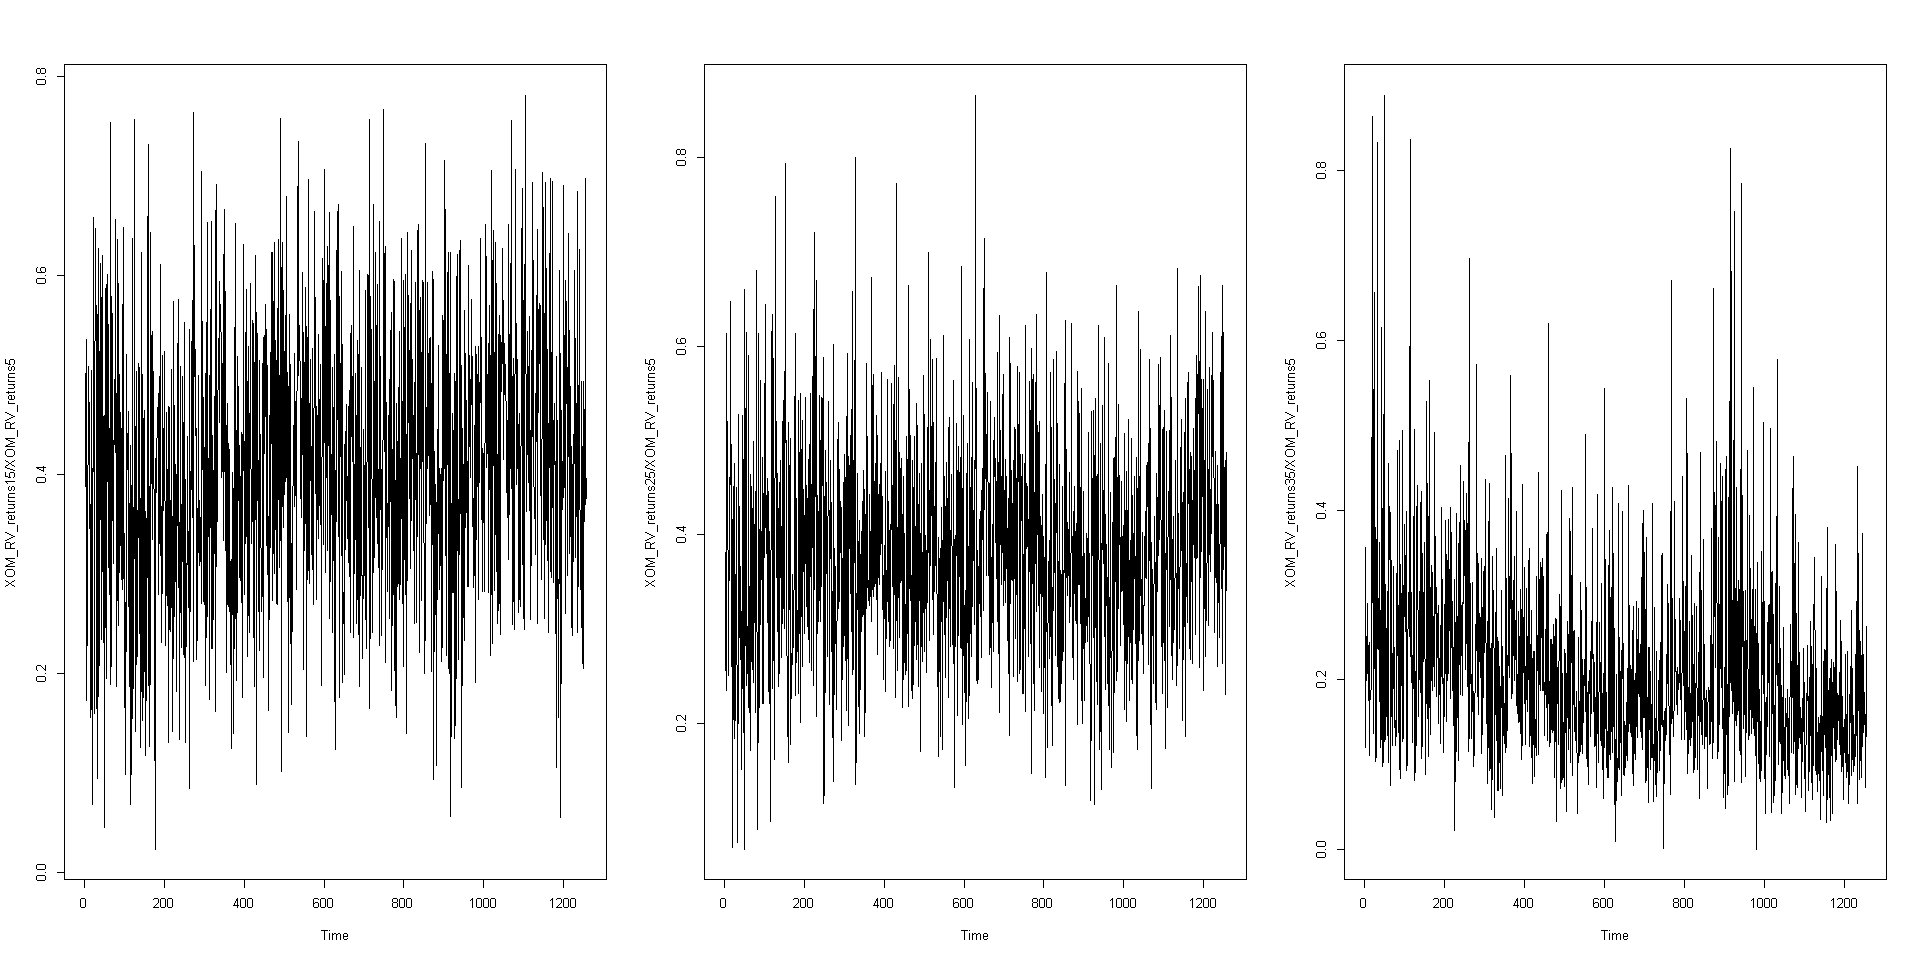

In [16]:
# Calculate and plot proportion of RV from intraday periods and daily RV for each stock

# BAC
par(mfrow=c(1, 3))
plot.ts(BAC_RV_returns15/BAC_RV_returns5)
plot.ts(BAC_RV_returns25/BAC_RV_returns5)
plot.ts(BAC_RV_returns35/BAC_RV_returns5)

cat("BAC:", "\n")
cat("9:30-10:59: ", sum(BAC_RV_returns15)/sum(BAC_RV_returns5), "\n")
cat("11:00-14:29: ", sum(BAC_RV_returns25)/sum(BAC_RV_returns5), "\n")
cat("14:30-16:00: ", sum(BAC_RV_returns35)/sum(BAC_RV_returns5), "\n")

# MSFT
par(mfrow=c(1, 3))
plot.ts(MSFT_RV_returns15/MSFT_RV_returns5)
plot.ts(MSFT_RV_returns25/MSFT_RV_returns5)
plot.ts(MSFT_RV_returns35/MSFT_RV_returns5)

cat("MSFT:", "\n")
cat("9:30-10:59: ", sum(MSFT_RV_returns15)/sum(MSFT_RV_returns5), "\n")
cat("11:00-14:29: ", sum(MSFT_RV_returns25)/sum(MSFT_RV_returns5), "\n")
cat("14:30-16:00: ", sum(MSFT_RV_returns35)/sum(MSFT_RV_returns5), "\n")

# XOM
par(mfrow=c(1, 3))
plot.ts(XOM_RV_returns15/XOM_RV_returns5)
plot.ts(XOM_RV_returns25/XOM_RV_returns5)
plot.ts(XOM_RV_returns35/XOM_RV_returns5)

cat("XOM:", "\n")
cat("9:30-10:59: ", sum(XOM_RV_returns15)/sum(XOM_RV_returns5), "\n")
cat("11:00-14:29: ", sum(XOM_RV_returns25)/sum(XOM_RV_returns5), "\n")
cat("14:30-16:00: ", sum(XOM_RV_returns35)/sum(XOM_RV_returns5), "\n")

### 8)

[1] "Part 8.5"


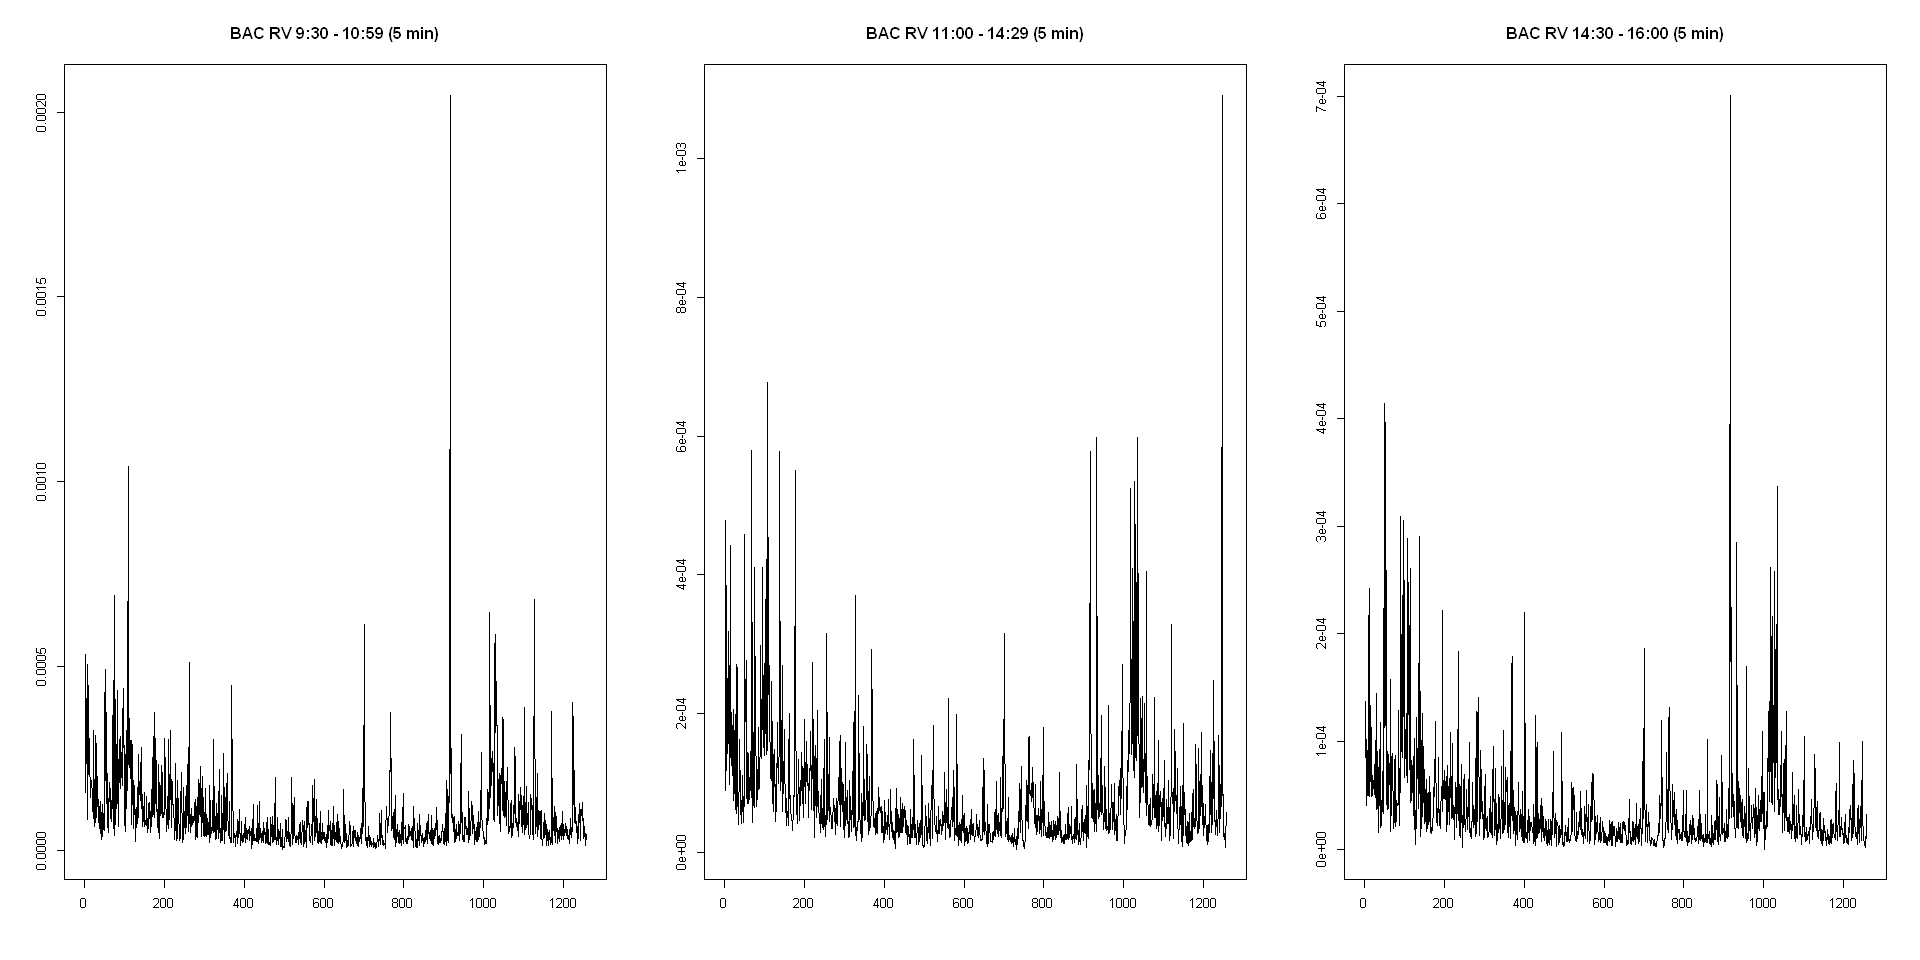

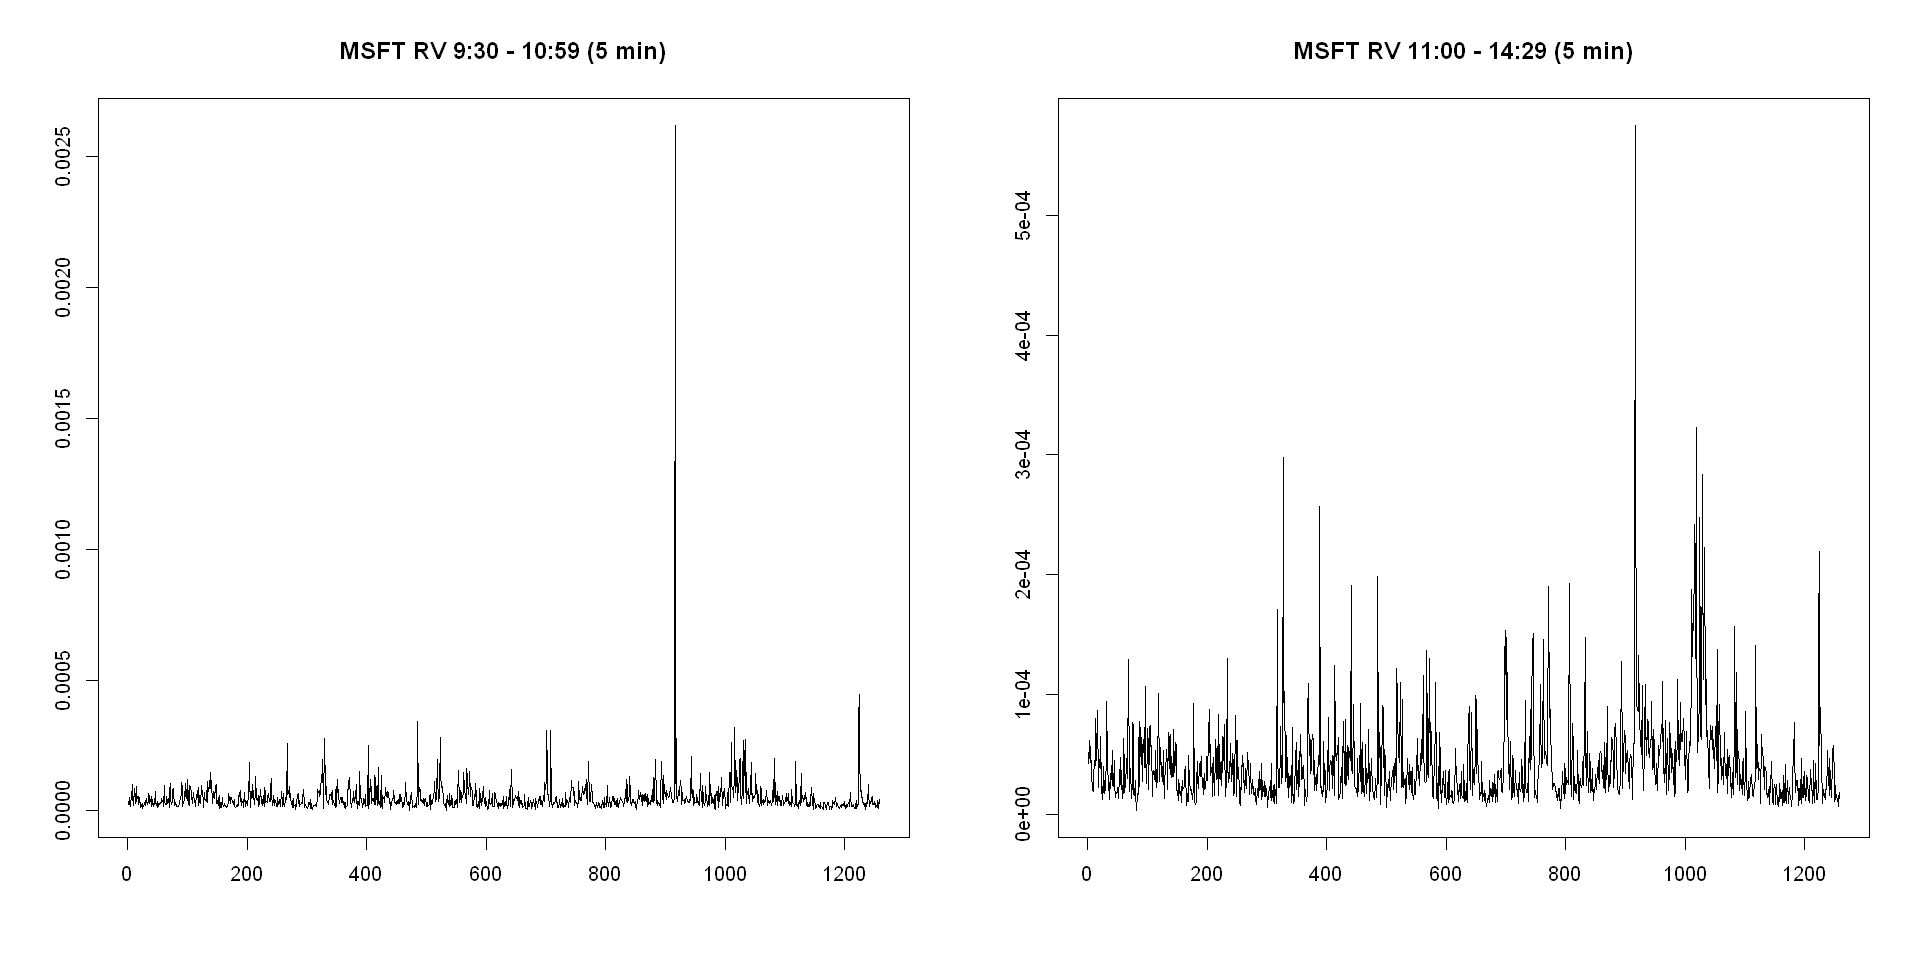

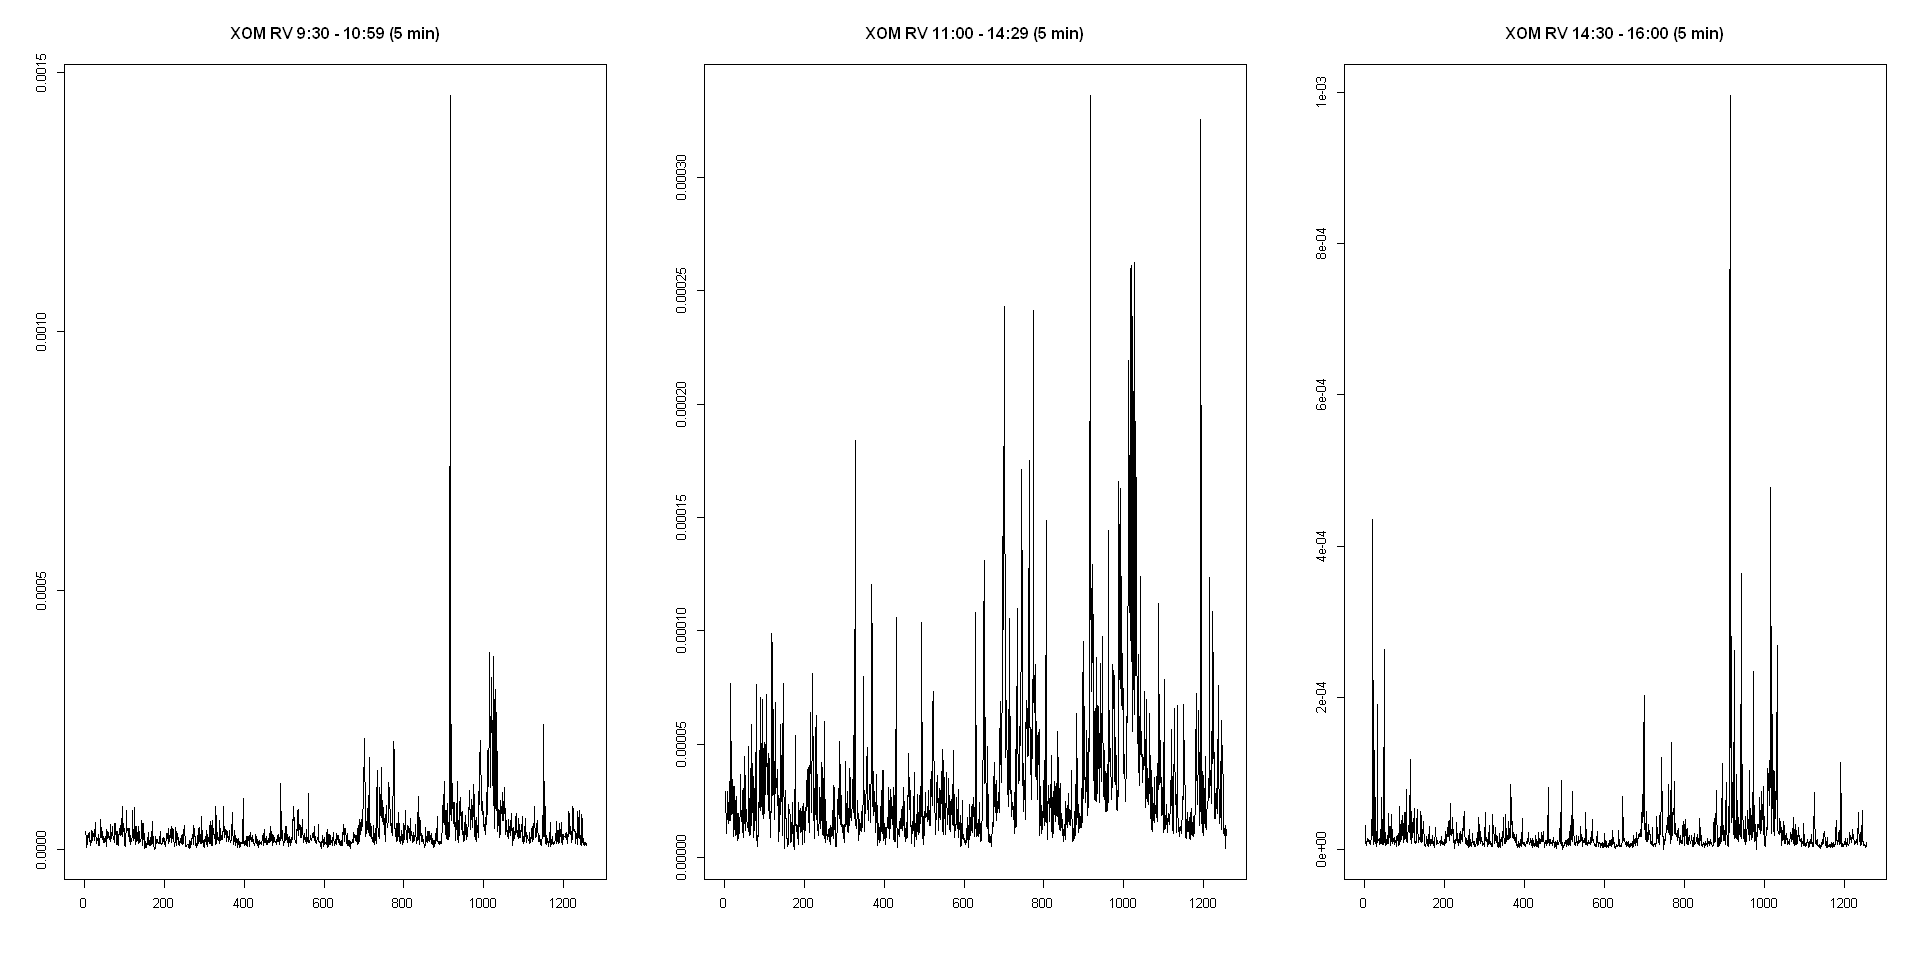

[1] "Part 8.6"


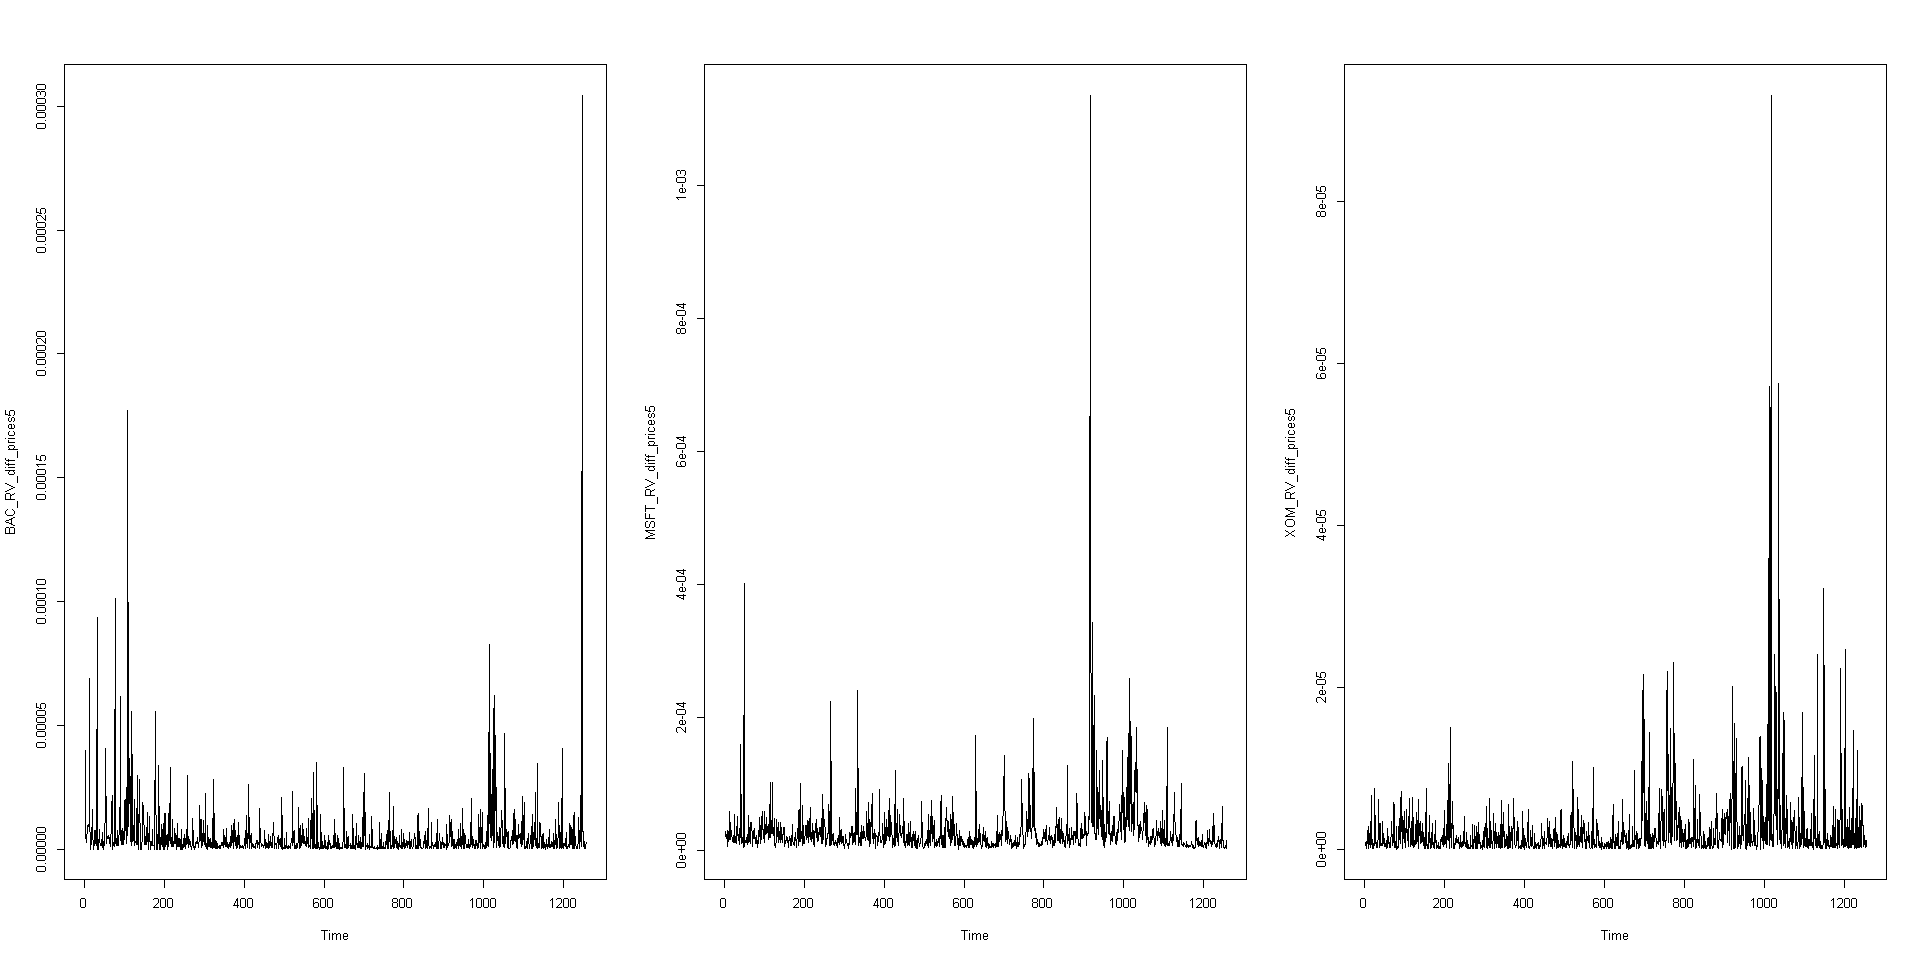

BAC: 
9:30-10:59:  0.4349919 
11:00-14:29:  0.3643206 
14:30-16:00:  0.1776025 
[1] "Part 8.7"
MSFT: 
9:30-10:59:  0.4217206 
11:00-14:29:  0.3447049 


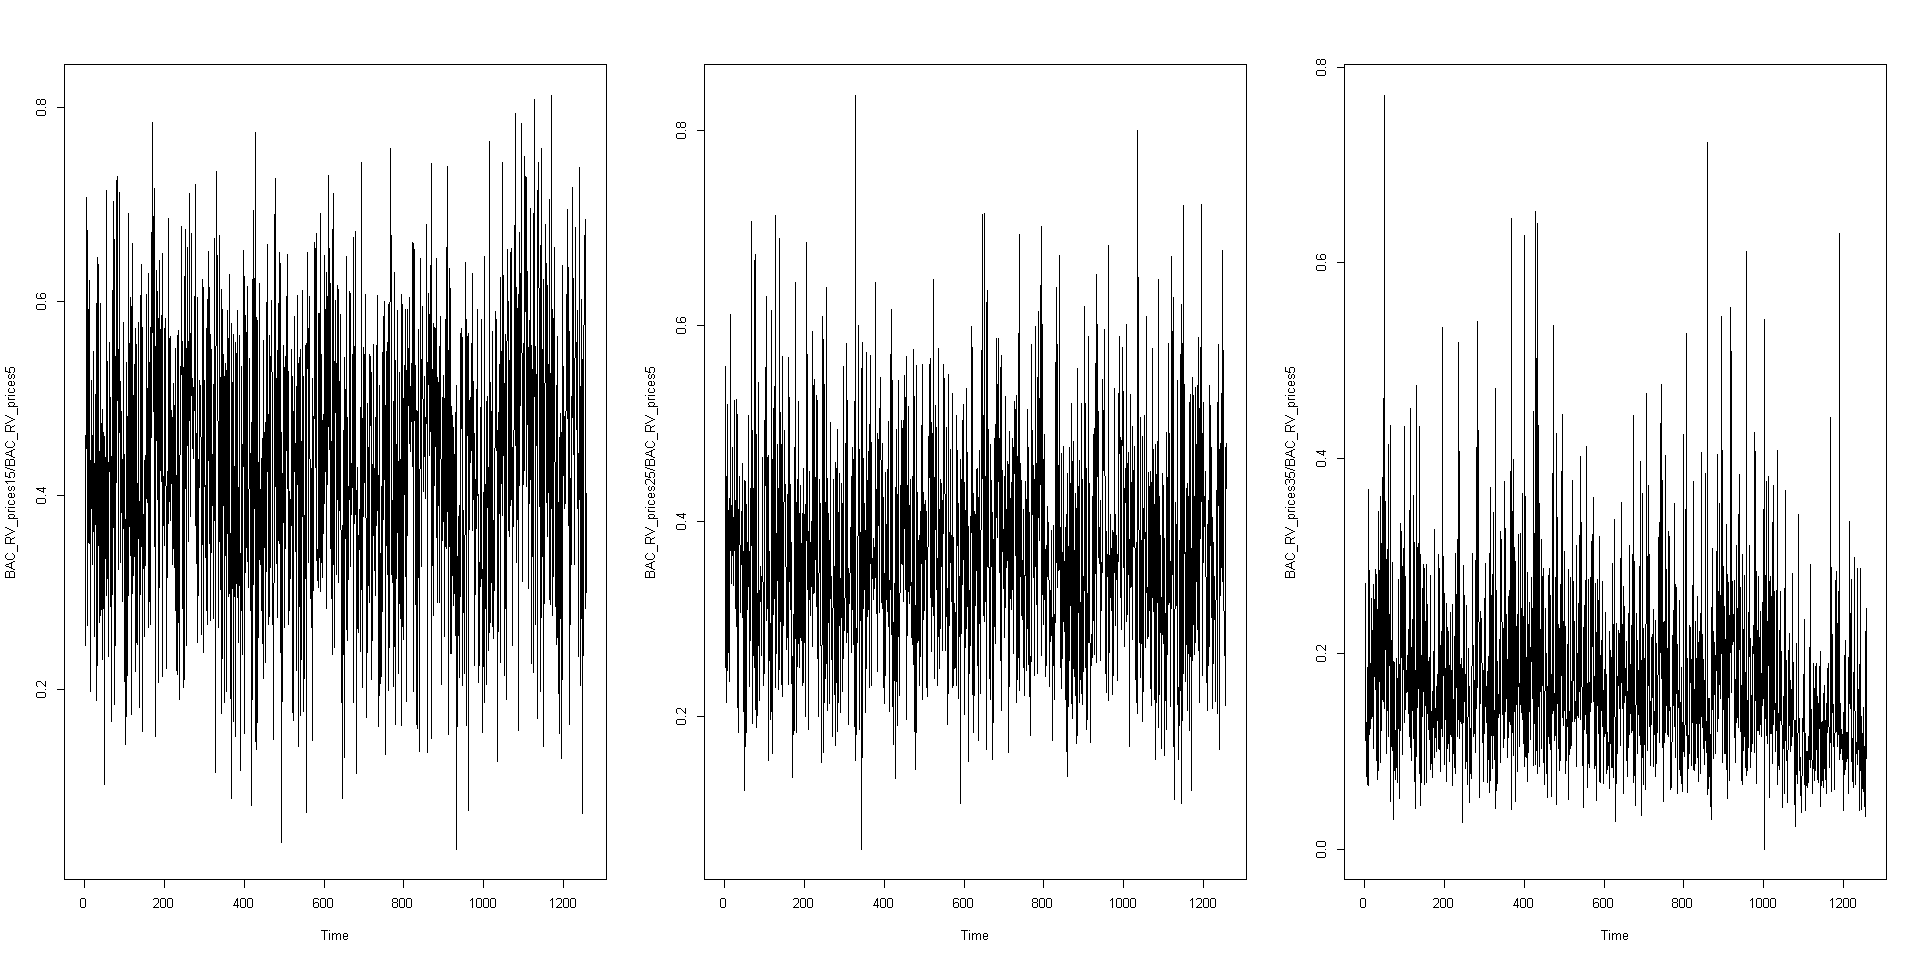

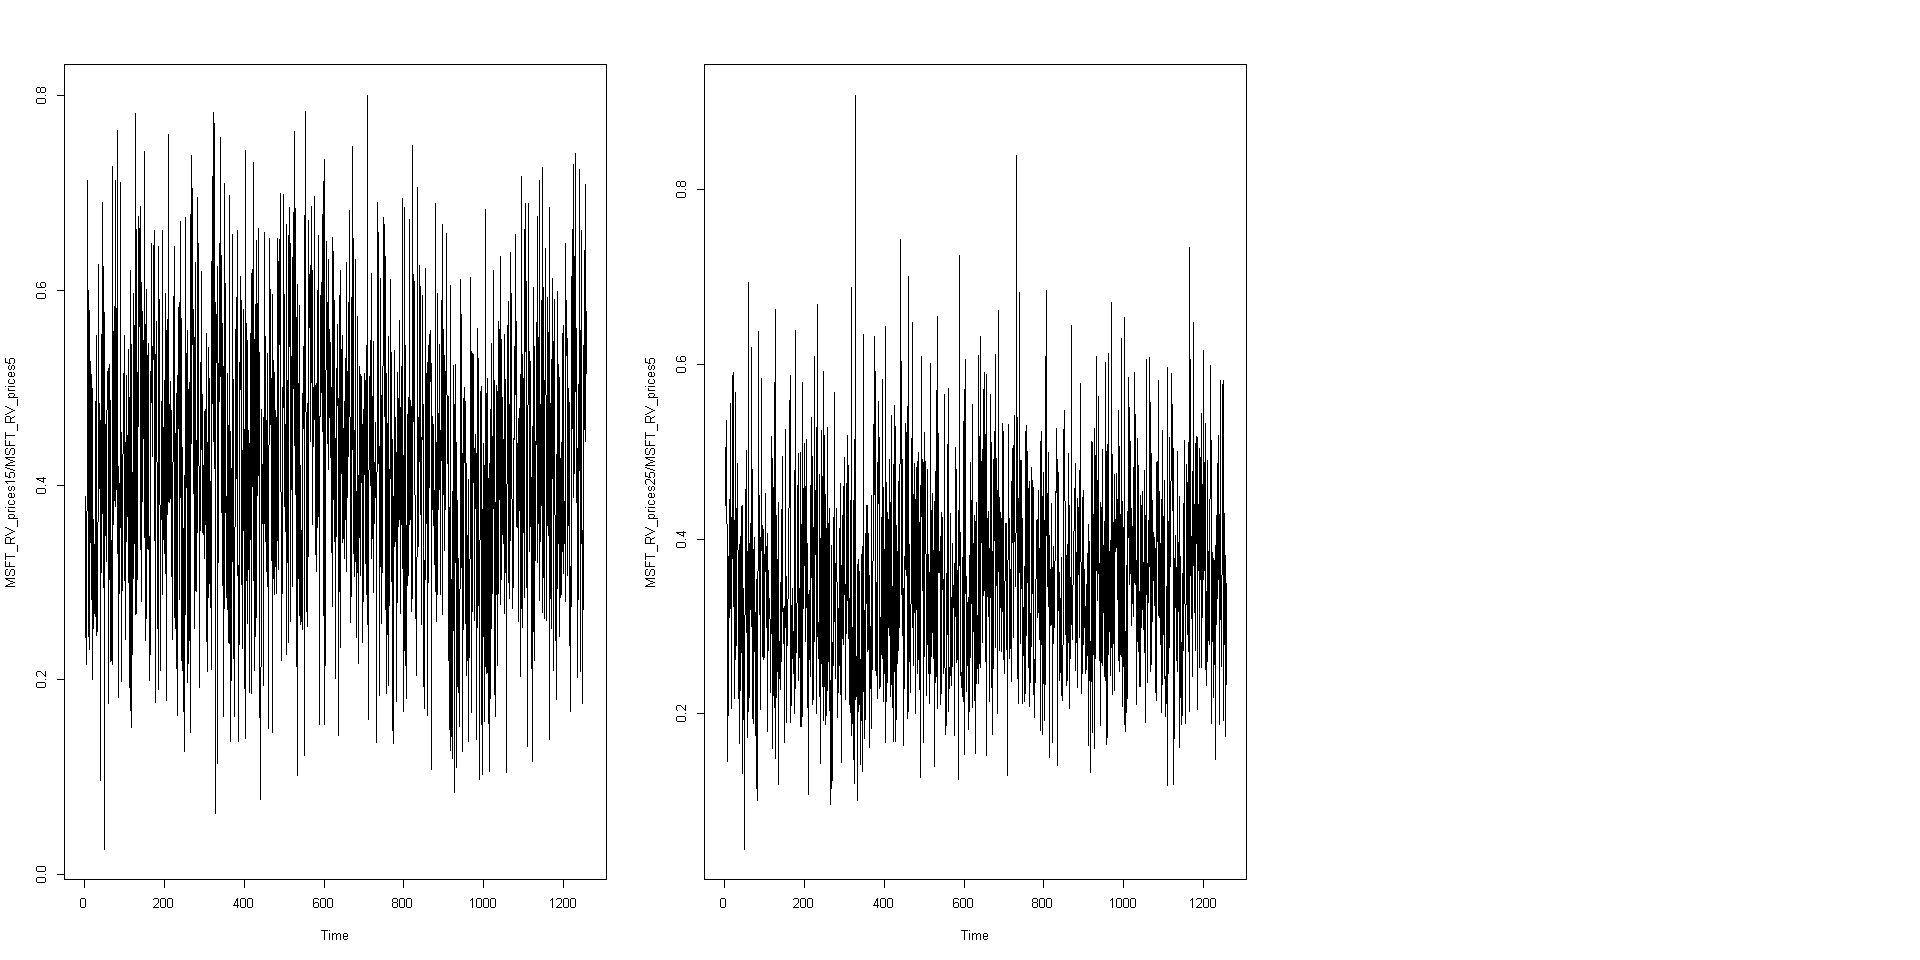

XOM: 
9:30-10:59:  0.3992246 
11:00-14:29:  0.3538374 
14:30-16:00:  0.2231547 


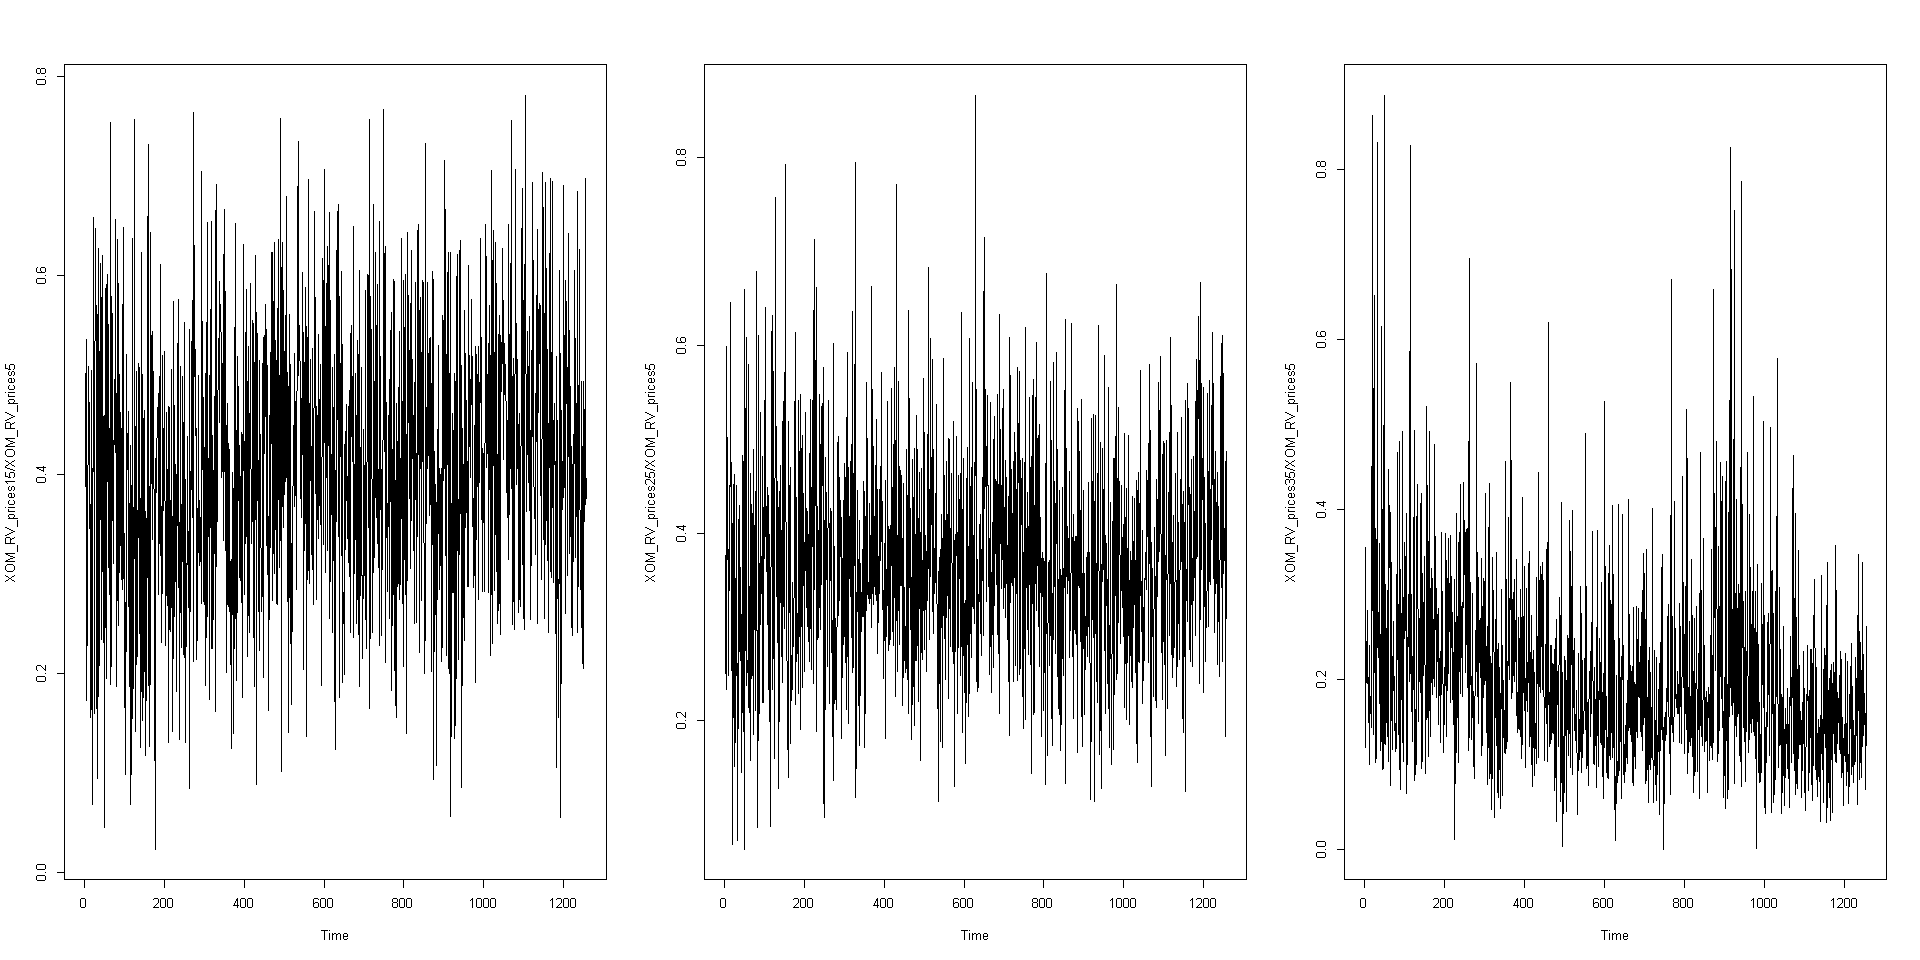

In [48]:
# Repeat part 5-7 using prices instead of returns
# Mostly we apply rCov function with argument makeReturns = TRUE on prices, instead of calculating returns setting argument makeReturns = FALSE

print("Part 8.5")
# 8.5
# Calculate intraday RV
# BAC
par(mfrow=c(1, 3))
BAC15 <- BAC_xts5["T09:30:00/T10:59:00" ]
index(BAC15)<-as.Date(index(BAC15))
BAC_RV_prices15 <- rCov(BAC15, makeReturns = T)
plot.ts(BAC_RV_prices15, xlab = NA,ylab = NA, main = "BAC RV 9:30 - 10:59 (5 min)")

BAC25 <- BAC_xts5["T11:00:00/T14:29:00"]
index(BAC25)<-as.Date(index(BAC25))
BAC_RV_prices25 <- rCov(BAC25, makeReturns = T)
plot.ts(BAC_RV_prices25, xlab = NA,ylab = NA, main = "BAC RV 11:00 - 14:29 (5 min)")

BAC35 <- BAC_xts5["T14:30:00/T16:00:00" ]
index(BAC35)<-as.Date(index(BAC35))
BAC_RV_prices35 <- rCov(BAC35, makeReturns = T)
plot.ts(BAC_RV_prices35, xlab = NA,ylab = NA, main = "BAC RV 14:30 - 16:00 (5 min)")

# MSFT
par(mfrow=c(1, 2))
MSFT15 <- MSFT_xts5["T09:30:00/T10:59:00" ]
index(MSFT15)<-as.Date(index(MSFT15))
MSFT_RV_prices15 <- rCov(MSFT15, makeReturns = T)
plot.ts(MSFT_RV_prices15, xlab = NA,ylab = NA, main = "MSFT RV 9:30 - 10:59 (5 min)")

MSFT25 <- MSFT_xts5["T11:00:00/T14:29:00"]
index(MSFT25)<-as.Date(index(MSFT25))
MSFT_RV_prices25 <- rCov(MSFT25, makeReturns = T)
plot.ts(MSFT_RV_prices25, xlab = NA,ylab = NA, main = "MSFT RV 11:00 - 14:29 (5 min)")

MSFT35 <- MSFT_xts5["T14:30:00/T16:00:00"]
index(MSFT35) <- as.Date(index(MSFT35))
#MSFT_RV_prices35 <- rCov(MSFT35, makeReturns = T)
#plot.ts(MSFT_RV_prices35, xlab = NA,ylab = NA, main = "MSFT RV 14:30 - 16:00 (5 min)")

# XOM
par(mfrow=c(1, 3))
XOM15 <- XOM_xts5["T09:30:00/T10:59:00" ]
index(XOM15)<-as.Date(index(XOM15))
XOM_RV_prices15 <- rCov(XOM15, makeReturns = T)
plot.ts(XOM_RV_prices15, xlab = NA,ylab = NA, main = "XOM RV 9:30 - 10:59 (5 min)")

XOM25 <- XOM_xts5["T11:00:00/T14:29:00"]
index(XOM25)<-as.Date(index(XOM25))
XOM_RV_prices25 <- rCov(XOM25, makeReturns = T)
plot.ts(XOM_RV_prices25, xlab = NA,ylab = NA, main = "XOM RV 11:00 - 14:29 (5 min)")

XOM35 <- XOM_xts5["T14:30:00/T16:00:00" ]
index(XOM35)<-as.Date(index(XOM35))
XOM_RV_prices35 <- rCov(XOM35, makeReturns = T)
plot.ts(XOM_RV_prices35, xlab = NA,ylab = NA, main = "XOM RV 14:30 - 16:00 (5 min)")


# 8.6
# Plot the difference between sum of intraday RV and daily RV
par(mfrow=c(1, 3))

# BAC3
index(BAC_RV_prices5) <- as.Date(index(BAC_RV_prices5))
BAC_RV_intraday_prices5 <- BAC_RV_prices15 + BAC_RV_prices25 + BAC_RV_prices35
BAC_RV_diff_prices5 <-   BAC_RV_prices5 - BAC_RV_intraday_prices5
plot.ts(BAC_RV_diff_prices5)

# MSFT
index(MSFT_RV_prices5) <- as.Date(index(MSFT_RV_prices5))
MSFT_RV_intraday_prices5 <- MSFT_RV_prices15 + MSFT_RV_prices25 #+ MSFT_RV_prices35
MSFT_RV_diff_prices5 <-   MSFT_RV_prices5 - MSFT_RV_intraday_prices5
plot.ts(MSFT_RV_diff_prices5)

# XOM
index(XOM_RV_prices5) <- as.Date(index(XOM_RV_prices5))
XOM_RV_intraday_prices5 <- XOM_RV_prices15 + XOM_RV_prices25 + XOM_RV_prices35
XOM_RV_diff_prices5 <-   XOM_RV_prices5 - XOM_RV_intraday_prices5
plot.ts(XOM_RV_diff_prices5)
print("Part 8.6")

# 8.7
# PLot and calculate proportion of intraday RV in daily R.Version
# BAC
par(mfrow=c(1, 3))
plot.ts(BAC_RV_prices15/BAC_RV_prices5)
plot.ts(BAC_RV_prices25/BAC_RV_prices5)
plot.ts(BAC_RV_prices35/BAC_RV_prices5)

cat("BAC:", "\n")
cat("9:30-10:59: ", sum(BAC_RV_prices15)/sum(BAC_RV_prices5), "\n")
cat("11:00-14:29: ", sum(BAC_RV_prices25)/sum(BAC_RV_prices5), "\n")
cat("14:30-16:00: ", sum(BAC_RV_prices35)/sum(BAC_RV_prices5), "\n")

print("Part 8.7")
# MSFT
par(mfrow=c(1, 3))
plot.ts(MSFT_RV_prices15/MSFT_RV_prices5)
plot.ts(MSFT_RV_prices25/MSFT_RV_prices5)
#plot.ts(MSFT_RV_prices35/MSFT_RV_prices5)

cat("MSFT:", "\n")
cat("9:30-10:59: ", sum(MSFT_RV_prices15)/sum(MSFT_RV_prices5), "\n")
cat("11:00-14:29: ", sum(MSFT_RV_prices25)/sum(MSFT_RV_prices5), "\n")
#cat("14:30-16:00: ", sum(MSFT_RV_prices35)/sum(MSFT_RV_prices5), "\n")

# XOM
par(mfrow=c(1, 3))
plot.ts(XOM_RV_prices15/XOM_RV_prices5)
plot.ts(XOM_RV_prices25/XOM_RV_prices5)
plot.ts(XOM_RV_prices35/XOM_RV_prices5)

cat("XOM:", "\n")
cat("9:30-10:59: ", sum(XOM_RV_prices15)/sum(XOM_RV_prices5), "\n")
cat("11:00-14:29: ", sum(XOM_RV_prices25)/sum(XOM_RV_prices5), "\n")
cat("14:30-16:00: ", sum(XOM_RV_prices35)/sum(XOM_RV_prices5), "\n")

### 9)

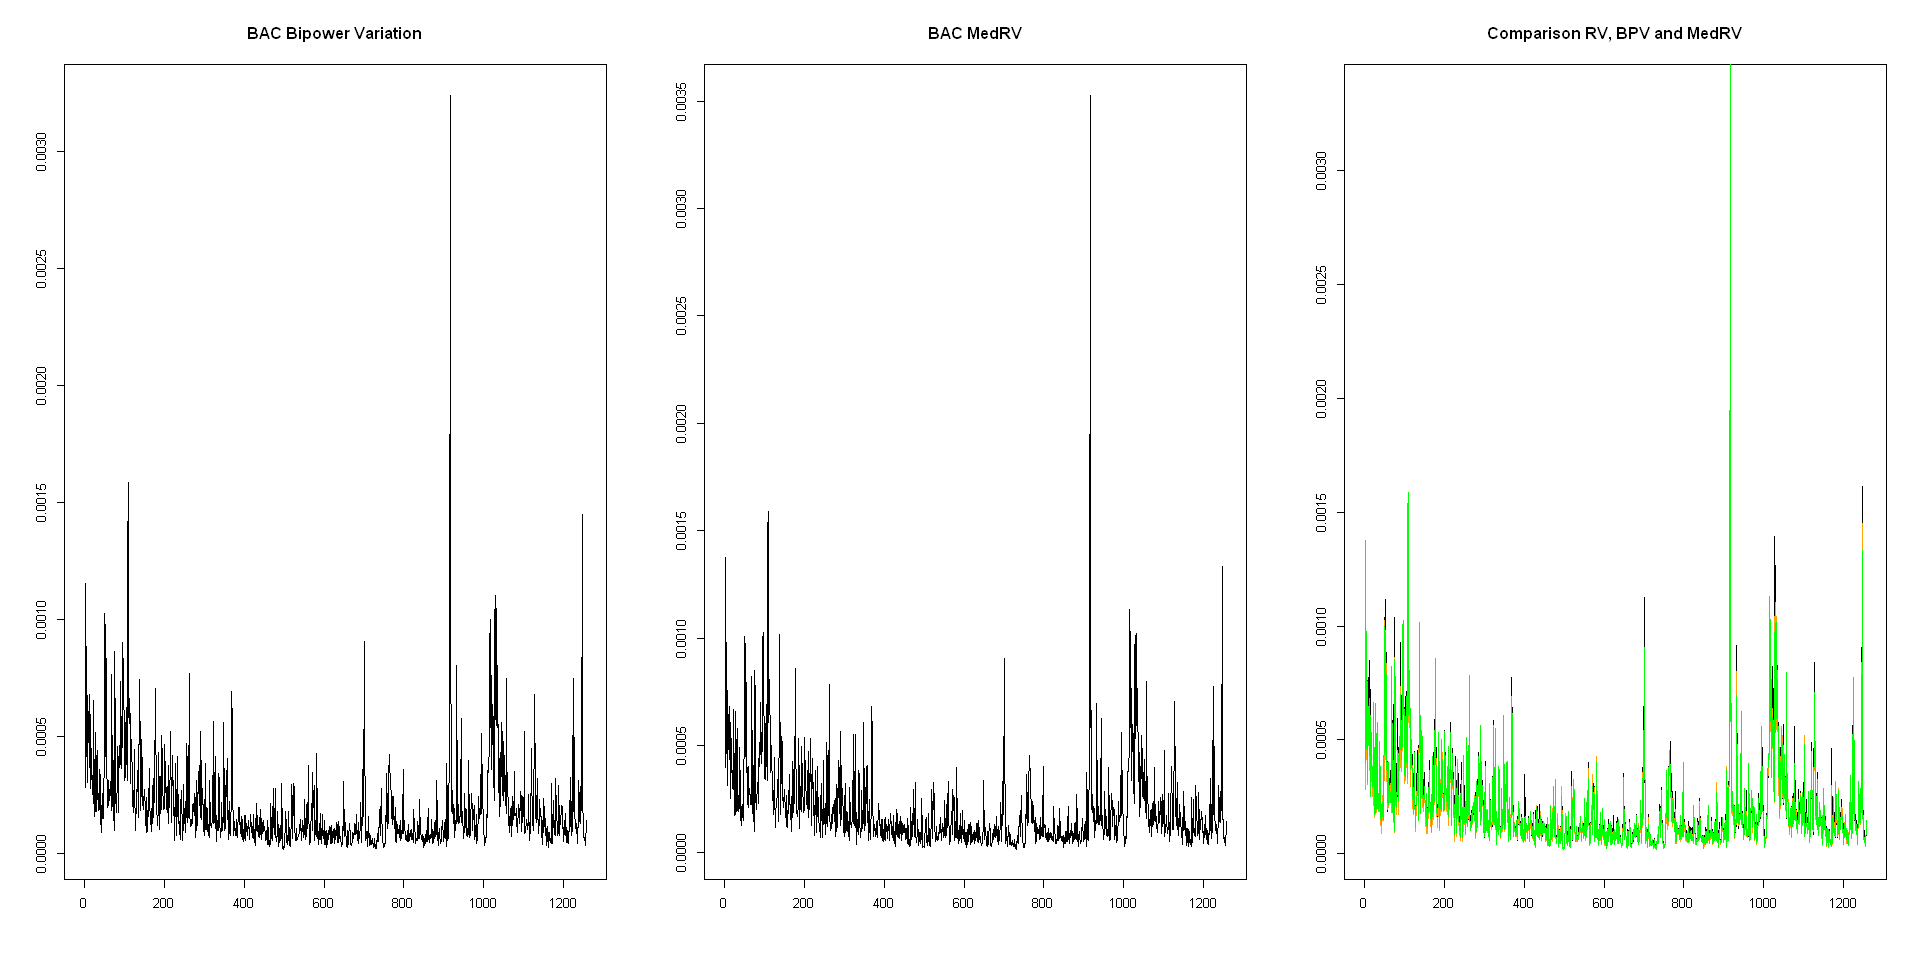

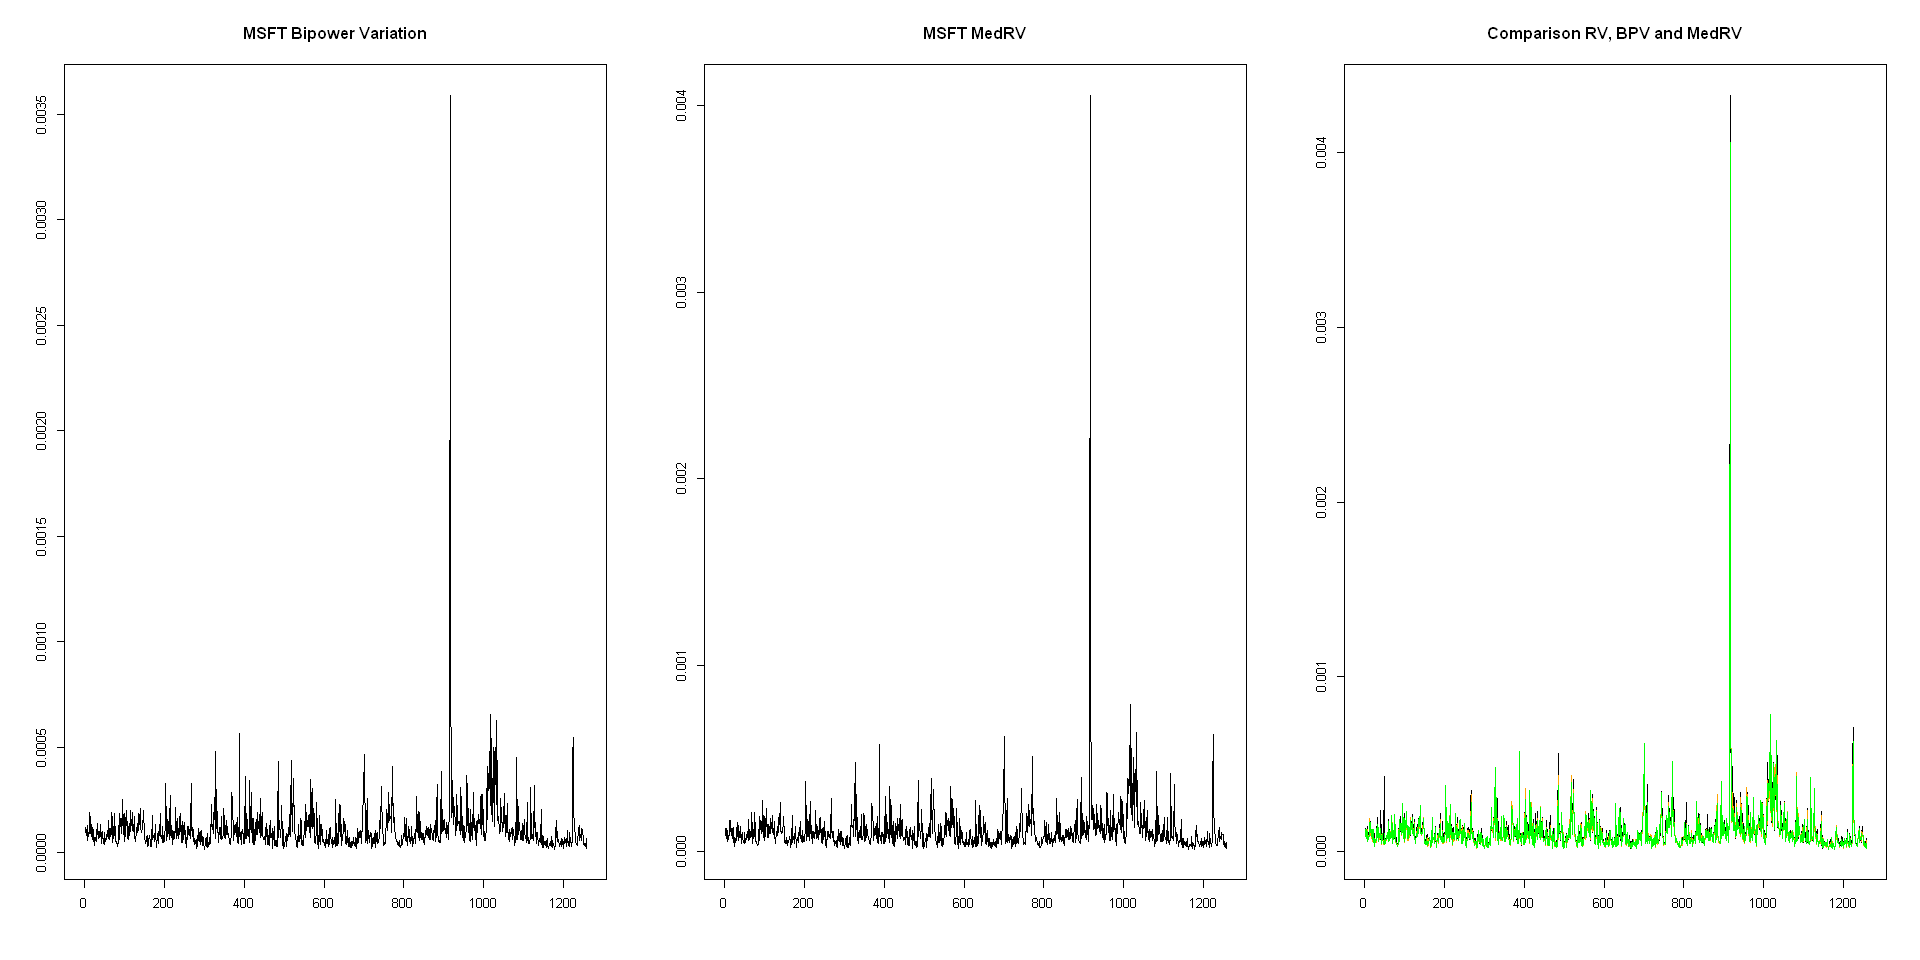

                          ztest     lower    upper      p.value
2012-01-03 16:00:00  2.72161251 -1.959964 1.959964 6.496427e-03
2012-01-04 16:00:00  3.89327148 -1.959964 1.959964 9.890137e-05
2012-01-05 16:00:00 -0.03508966 -1.959964 1.959964 9.720082e-01
2012-01-06 16:00:00  0.66710353 -1.959964 1.959964 5.047060e-01
2012-01-09 16:00:00  0.30344280 -1.959964 1.959964 7.615524e-01
2012-01-10 16:00:00  0.61821592 -1.959964 1.959964 5.364330e-01
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

                         ztest     lower    upper   p.value
2012-01-03 16:00:00 -0.5086355 -1.959964 1.959964 0.6110077
2012-01-04 16:00:00  1.1398761 -1.959964 1.959964 0.2543379
2012-01-05 16:00:00 -0.2925734 -1.959964 1.959964 0.7698483
2012-01-06 16:00:00  0.1501480 -1.959964 1.959964 0.8806478
2012-01-09 16:00:00 -0.5315264 -1.959964 1.959964 0.5950540
2012-01-10 16:00:00  1.4154386 -1.959964 1.959964 0.1569399
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

                        ztest     lower    upper     p.value
2012-01-03 16:00:00 0.3440685 -1.959964 1.959964 0.730794737
2012-01-04 16:00:00 2.7398291 -1.959964 1.959964 0.006147114
2012-01-05 16:00:00 0.7872725 -1.959964 1.959964 0.431122385
2012-01-06 16:00:00 1.5153377 -1.959964 1.959964 0.129686918
2012-01-09 16:00:00 0.1076634 -1.959964 1.959964 0.914262726
2012-01-10 16:00:00 0.6950358 -1.959964 1.959964 0.487032875
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

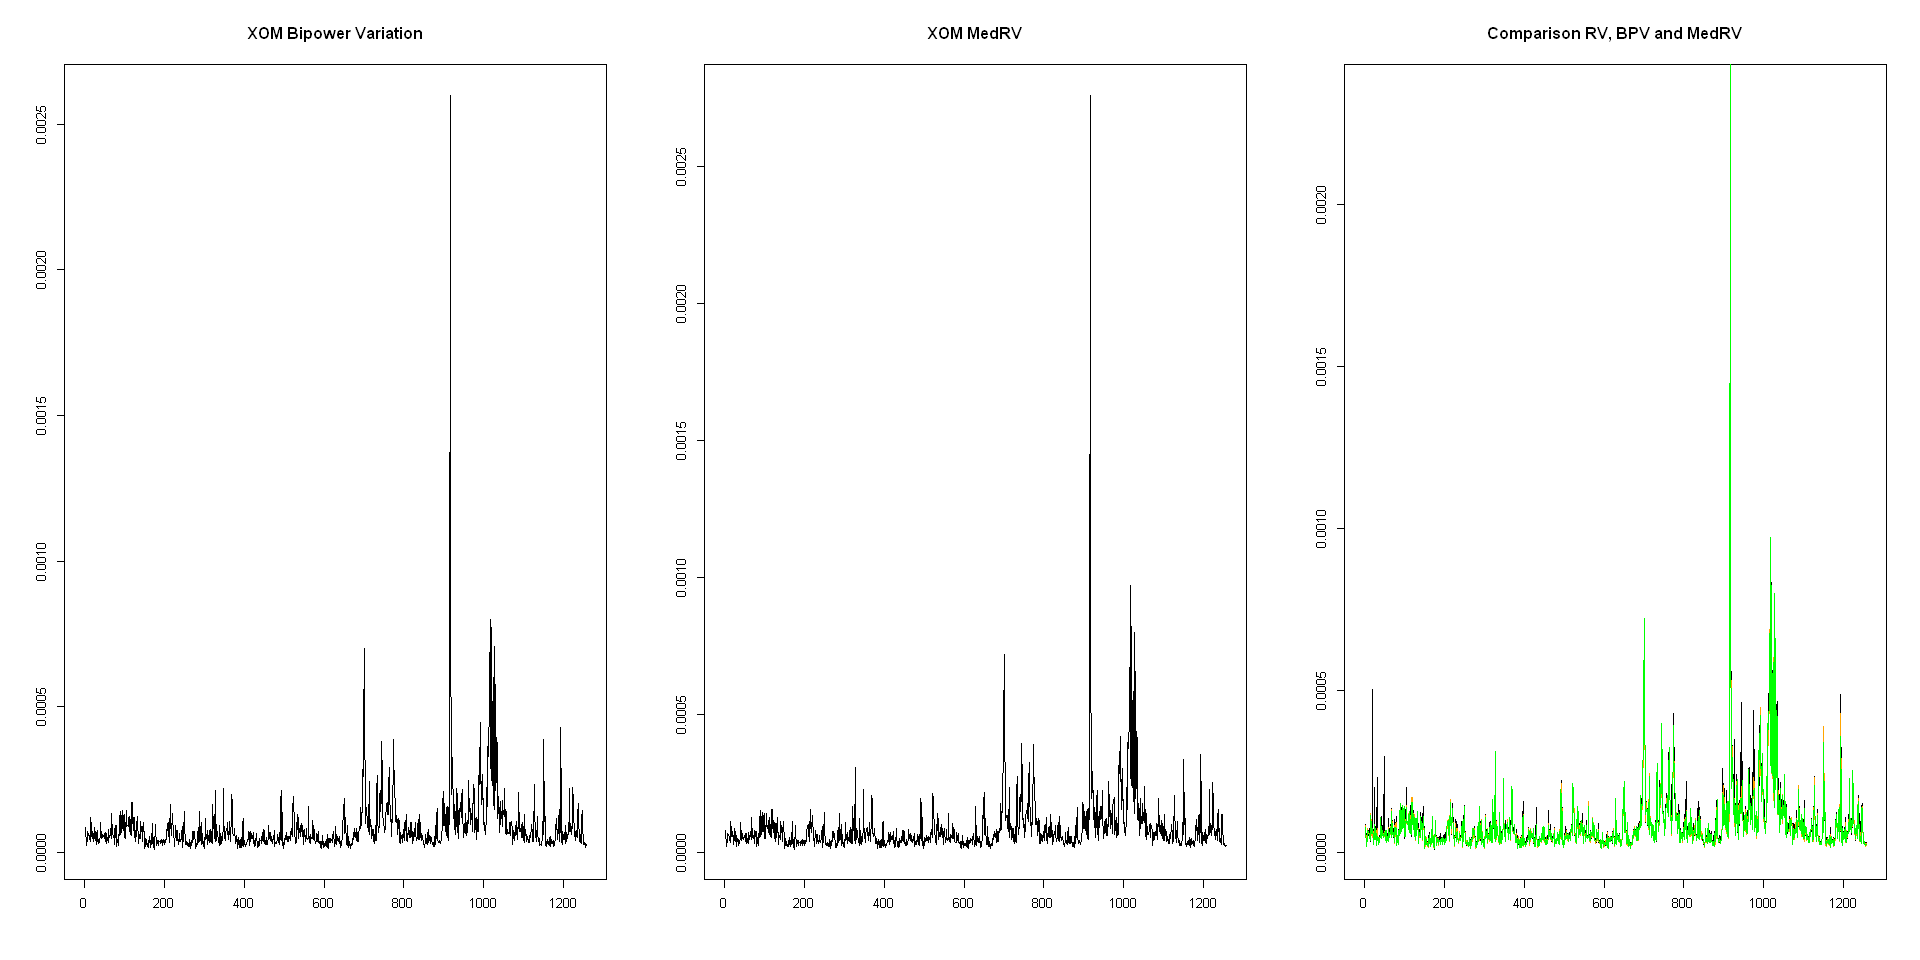

In [61]:
# Calculate Bipower variation and Median Realized Variation. Then test for jumps in each period
# Compare graphically realized variation, bipower variation and MedRV

#BAC
# BIPOWER VARIATION
par(mfrow=c(1, 3))
BAC_BPV5 <- rBPCov(BAC_no_time5, makeReturns = T)
plot.ts(BAC_BPV5, xlab=NA, ylab=NA, main="BAC Bipower Variation")
BAC_BP_jumps5 <- BNSjumpTest(BAC_xts5, IVestimator = "BV", IQestimator = "TP", makeReturns = T)

# MedRV estimator
BAC_MedRV5 <- rMedRVar(BAC_no_time5, makeReturns = T)
plot.ts(BAC_MedRV5, xlab=NA, ylab=NA,main="BAC MedRV")
BAC_MedRV_jumps5 <- BNSjumpTest(BAC_xts5, IVestimator = "rMedRVar", IQestimator = "TP", makeReturns = T)

plot.ts(BAC_RV_returns5, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(ts(BAC_BPV5),col="orange")
lines(ts(BAC_MedRV5),col="green")

# MSFT
# BIPOWER VARIATION
par(mfrow=c(1, 3))
MSFT_BPV5 <- rBPCov(MSFT_no_time5, makeReturns = T)
plot.ts(MSFT_BPV5,xlab=NA,ylab=NA, main="MSFT Bipower Variation")
MSFT_BP_jumps5 <- BNSjumpTest(MSFT_xts5,IVestimator = "BV",IQestimator = "TP", makeReturns = T)
# MedRV estimator
MSFT_MedRV5<-rMedRVar(MSFT_no_time5, makeReturns = T)
plot.ts(MSFT_MedRV5, xlab=NA, ylab=NA,main="MSFT MedRV")
MSFT_MedRV_jumps5<- BNSjumpTest(MSFT_xts5,IVestimator = "rMedRVar",IQestimator = "TP", makeReturns = T)

plot.ts(MSFT_RV_returns5, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(ts(MSFT_BPV5),col="orange")
lines(ts(MSFT_MedRV5),col="green")

# XOM
# BIPOWER VARIATION
par(mfrow=c(1, 3))
XOM_BPV5 <- rBPCov(XOM_no_time5, makeReturns = T)
plot.ts(XOM_BPV5, xlab=NA, ylab=NA, main="XOM Bipower Variation")
XOM_BP_jumps5 <- BNSjumpTest(XOM_xts5, IVestimator = "BV", IQestimator = "TP", makeReturns = T)
# MedRV estimator
XOM_MedRV5 <- rMedRVar(XOM_no_time5, makeReturns = T)
plot.ts(XOM_MedRV5, xlab=NA, ylab=NA, main="XOM MedRV")
XOM_MedRV_jumps5 <- BNSjumpTest(XOM_xts5, IVestimator = "rMedRVar", IQestimator = "TP", makeReturns = T)

plot.ts(XOM_RV_returns5, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(ts(XOM_BPV5),col="orange")
lines(ts(XOM_MedRV5),col="green")

# Jumps
head(BAC_BP_jumps5)
head(MSFT_BP_jumps5)
head(XOM_BP_jumps5)

### 10 )